# Data Preparation

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

import os

**Importing data**

The Lending Club Dataset is used for this project: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used the updated dataset (version 2), which is available on kaggle: https://www.kaggle.com/wendykan/lending-club-loan-data/

We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan = r'F:\Data Analysis\Springboard\Data Science Career Track\Projects\Capstone 2\lending club loan data_version 2\loan.csv'

loan_data_backup = pd.read_csv(loan)

loan_data = loan_data_backup.copy()

C:\Users\13134\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Explore Data**

In [3]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage settlement_term  
0               NaN                    NaN             NaN  
1               NaN                    NaN             NaN  
2               NaN                    NaN             NaN  
3               NaN                    NaN             NaN  
4               NaN                    NaN             NaN  

[5 rows x 145 columns]

In [4]:
loan_data.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
2260663 NaN        NaN      12000        12000          12000.0   60 months   
2260664 NaN        NaN      12000        12000          12000.0   60 months   
2260665 NaN        NaN      10000        10000          10000.0   36 months   
2260666 NaN        NaN      12000        12000          12000.0   60 months   
2260667 NaN        NaN      16550        16550          16550.0   60 months   

         int_rate  installment grade sub_grade  ...  \
2260663     14.08       279.72     C        C3  ...   
2260664     25.82       358.01     E        E4  ...   
2260665     11.99       332.10     B        B5  ...   
2260666     21.45       327.69     D        D5  ...   
2260667     21.45       451.94     D        D5  ...   

        hardship_payoff_balance_amount hardship_last_payment_amount  \
2260663                            NaN                          NaN   
2260664                            NaN                          NaN   
2260665                            NaN                          NaN   
2260666                            NaN                          NaN   
2260667                            NaN                          NaN   

        disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
2260663                Cash                     N                       NaN   
2260664                Cash                     N                       NaN   
2260665                Cash                     N                       NaN   
2260666                Cash                     N                       NaN   
2260667                Cash                     N                       NaN   

        settlement_status settlement_date settlement_amount  \
2260663               NaN             NaN               NaN   
2260664               NaN             NaN               NaN   
2260665               NaN             NaN               NaN   
2260666               NaN             NaN               NaN   
2260667               NaN             NaN               NaN   

         settlement_percentage settlement_term  
2260663                    NaN             NaN  
2260664                    NaN             NaN  
2260665                    NaN             NaN  
2260666                    NaN             NaN  
2260667                    NaN             NaN  

[5 rows x 145 columns]

In [5]:
#Display all columns
#pd.options.display.max_columns = None
#loan_data

In [6]:
#Display all rows
#pd.options.display.max_rows = None
#loan_data

In [7]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [8]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [9]:
loan_data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 145, dtype: object

In [10]:
loan_data.shape

(2260668, 145)

# DATA PREPROCESSING

**Pre-processing few continuous variables: `emp_length`, `earlist_cr_line`, `term`, `issue_d`**

In [11]:
# Display unique values of a column.
loan_data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

The `emp_length` has four things we have to remove to be able to convert it into an integer:
    1.`+ years`
    2.`< 1 year`
    3.`nan`
    4.` years` and `year`  (space years and space year)

In [12]:
#Coverting the employment lenght from object into integer. We will store the new variable as 'employment length int'

# 1.Assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')

# 2Replace the whole string ‘less than 1 year’ with the string ‘0’.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))

# 3.Replace the ‘n/a’ string with the string ‘0’.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))

# 4.Replace the string ‘space years’  and 'space year' with nothing.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [13]:
# Checks the datatype of a single element of a column.
type(loan_data['emp_length_int'][0])

str

Now we transform it into numeric

In [14]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [15]:
type(loan_data['emp_length_int'][0])

numpy.float64

Next is `earliest credit line`

In [16]:
# Next is 'earliest credit line'
#loan_data['earliest_cr_line']

In [17]:
type(loan_data['earliest_cr_line'][0])

str

In [18]:
# 'earliest credit line' is a date variable. We can extracts the date and the time from a string variable that is in a given format.
#loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format= '%b-%Y')

#loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line'].apply(pd.to_datetime)

loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], infer_datetime_format=True)


In [19]:
type(loan_data['earliest_cr_line'][0])

str

In [20]:
# Calculates the difference between two dates and times.
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0          6088 days
1         11141 days
2          2436 days
3          4321 days
4          6209 days
             ...    
2260663    5083 days
2260664    5389 days
2260665    8339 days
2260666    5267 days
2260667    1340 days
Name: earliest_cr_line_date, Length: 2260668, dtype: timedelta64[ns]

In [21]:
# Assume we are now in December 2017.We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))


In [22]:
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.
loan_data['mths_since_earliest_cr_line'].describe()

count    2.260639e+06
mean     2.156891e+02
std      9.416722e+01
min      2.500000e+01
25%      1.510000e+02
50%      2.000000e+02
75%      2.650000e+02
max      1.017000e+03
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
###
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

Empty DataFrame
Columns: [earliest_cr_line, earliest_cr_line_date, mths_since_earliest_cr_line]
Index: []

In [24]:
###
# We set the rows that had negative differences to the maximum value.
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Calculates and shows the minimum value of a column.
min(loan_data['mths_since_earliest_cr_line'])

25.0

Next variable to pre-process is `term`

In [26]:
loan_data['term']

0           36 months
1           60 months
2           36 months
3           36 months
4           60 months
              ...    
2260663     60 months
2260664     60 months
2260665     36 months
2260666     60 months
2260667     60 months
Name: term, Length: 2260668, dtype: object

In [27]:
# Shows some descriptive statisics for the values of a column.
loan_data['term'].describe()

count        2260668
unique             2
top        36 months
freq         1609754
Name: term, dtype: object

In [28]:
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [29]:
type(loan_data['term_int'][0])

str

In [30]:
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))

In [31]:
# Checks the datatype of a single element of a column.
type(loan_data['term_int'][0])

numpy.int64

Next variable to pre-process is `issue_d`

In [32]:
loan_data['issue_d']

0          Dec-2018
1          Dec-2018
2          Dec-2018
3          Dec-2018
4          Dec-2018
             ...   
2260663    Oct-2017
2260664    Oct-2017
2260665    Oct-2017
2260666    Oct-2017
2260667    Oct-2017
Name: issue_d, Length: 2260668, dtype: object

In [33]:
# Assume we are now in December 2017
# Extracts the date and the time from a string variable that is in a given format.
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], infer_datetime_format=True)

# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

# Shows some descriptive statisics for the values of a column.
loan_data['mths_since_issue_d'].describe()

count    2.260668e+06
mean     1.895439e+01
std      2.161178e+01
min     -1.200000e+01
25%      1.000000e+00
50%      1.700000e+01
75%      3.200000e+01
max      1.260000e+02
Name: mths_since_issue_d, dtype: float64

**Preprocessing few discrete/categorical variables**

**Variables: `grade`, `sub_grade`, `home_owenership`, `purpose`, `addr_state`, `initial_list_status`. We are not going to use `sub_grade`, as it overlaps with grade.**

In [34]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 151 entries, id to mths_since_issue_d
dtypes: datetime64[ns](2), float64(108), int64(5), object(36)
memory usage: 2.5+ GB


In [35]:
loan_data.dtypes

id                                    float64
member_id                             float64
loan_amnt                               int64
funded_amnt                             int64
funded_amnt_inv                       float64
                                    ...      
earliest_cr_line_date          datetime64[ns]
mths_since_earliest_cr_line           float64
term_int                                int64
issue_d_date                   datetime64[ns]
mths_since_issue_d                    float64
Length: 151, dtype: object

In [36]:
# We create dummy variables from all 8 original independent variables, and save them into a list.

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [37]:
# We concatenate the dummy variables and this turns them into a dataframe.
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [38]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [39]:
# We concatenate the original loan_data with the dataframe with dummy variables, along the columns. 
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [40]:
# Displays all column names.
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

# DATA CLEANING

**Checking and handling missing and NA values**

We will be using these variables in our analysis. Let's check for their missing values and fill them: `annual_inc`, `delinq_2yrs`, `inq_last_6mths`, `open_acc`, `pub_rec`, `total_acc`, `acc_now_delinq`, `total_rev_hi_lim`, `emp_length_int`, and `mths_since_earliest_cr_line`

In [41]:
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.
loan_data.isnull()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
0        True       True      False        False            False  False   
1        True       True      False        False            False  False   
2        True       True      False        False            False  False   
3        True       True      False        False            False  False   
4        True       True      False        False            False  False   
...       ...        ...        ...          ...              ...    ...   
2260663  True       True      False        False            False  False   
2260664  True       True      False        False            False  False   
2260665  True       True      False        False            False  False   
2260666  True       True      False        False            False  False   
2260667  True       True      False        False            False  False   

         int_rate  installment  grade  sub_grade  ...  addr_state:TX  \
0           False        False  False      False  ...          False   
1           False        False  False      False  ...          False   
2           False        False  False      False  ...          False   
3           False        False  False      False  ...          False   
4           False        False  False      False  ...          False   
...           ...          ...    ...        ...  ...            ...   
2260663     False        False  False      False  ...          False   
2260664     False        False  False      False  ...          False   
2260665     False        False  False      False  ...          False   
2260666     False        False  False      False  ...          False   
2260667     False        False  False      False  ...          False   

         addr_state:UT  addr_state:VA  addr_state:VT  addr_state:WA  \
0                False          False          False          False   
1                False          False          False          False   
2                False          False          False          False   
3                False          False          False          False   
4                False          False          False          False   
...                ...            ...            ...            ...   
2260663          False          False          False          False   
2260664          False          False          False          False   
2260665          False          False          False          False   
2260666          False          False          False          False   
2260667          False          False          False          False   

         addr_state:WI  addr_state:WV  addr_state:WY  initial_list_status:f  \
0                False          False          False                  False   
1                False          False          False                  False   
2                False          False          False                  False   
3                False          False          False                  False   
4                False          False          False                  False   
...                ...            ...            ...                    ...   
2260663          False          False          False                  False   
2260664          False          False          False                  False   
2260665          False          False          False                  False   
2260666          False          False          False                  False   
2260667          False          False          False                  False   

         initial_list_status:w  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
2260663                  False  
2260664                  False  
2260665                  False  
2260666                  False  
2260667                  False  

[2260668 rows x 278 columns]

In [42]:
# Sets the pandas dataframe options to display all columns/ rows.
#pd.options.display.max_rows = None
#loan_data.isnull().sum()

In [43]:
# Sets the pandas dataframe options to display all columns/ rows.
#pd.options.display.max_columns = None
#loan_data.isnull().sum()

**One way to deal with missing values is to remove all observations(rows) where we have missing values. Another way to deal with missing values is to impute them**

Let's start with `total_rev_hi_lim`

In [44]:
#'Total revolving high credit/ credit limit' will most likely be equal to 'funded_amnt'.
#So we replace the missing values in that with the values from funded_amnt
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [45]:
#Checking to see if there are still any missing values
loan_data['total_rev_hi_lim'].isnull().sum()

0

Let's do for `annual_inc`

In [46]:
# We will fill the missing values with the mean value of the non-missing values for 'annual_inc'.
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [47]:
loan_data['annual_inc'].isnull().sum()

0

For the others, we will fill them with zeros

In [48]:
# We fill the missing values with zeroes.
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# Probability of Default (PD) model

**Data Preparations**

The Dependent Variable will be Good/ Bad (Default) loan. The definition used here is that, accounts are considered as default (bad loan) if the borrower has been 90 days past due on the loan. Also, a borrower is considered default if the borrower commits fraud. The variable `loan_status` is used to determine if a customer has defaulted or not.

In [49]:
# Displays unique values of loan_status column
loan_data['loan_status'].unique()


array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [50]:
# Calculates the number of observations for each unique value of a variable
loan_data['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [51]:
#Total loans issued
loan_data['loan_status'].count()

2260668

In [52]:
#Loan proportion of each observation
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

In [53]:
# Good/ Bad loan.# We create a new variable that has the value of '0' if a condition is met (Default), and the value of '1' if it is not met (Non-default). 
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [54]:
loan_data['good_bad']

0          1
1          1
2          1
3          1
4          1
          ..
2260663    1
2260664    1
2260665    1
2260666    1
2260667    1
Name: good_bad, Length: 2260668, dtype: int32

# Splitting Data into Train/Test

In [55]:
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# We set the size of the test dataset to be 20% and the train dataset becomes 80%.
# We also set a specific random state.This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)


In [56]:
# Displaying the size of the dataframes
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(1808534, 278)
(1808534,)
(452134, 278)
(452134,)


# DATA PREPROCESSING: TRAINING DATASET

**Preprocessing More Discrete/ Categorical Variables**

*Creating variables*
1. `n_obs` is total number of observations
2. `WOE` is Weight of Evidence
3. `n_good` is number of good loans
4. `n_bad` is number od bad loans
5. `prop_good` is proportion of good borrowers
6. `prop_bad` is proportion of bad borrowers
7. `prop_n_obs` is proportion of observations
8. `prop_n_good` is proportion of the number of good borrowers
9. `prop_n_bad` is proportion of the nuber of bad borrowers
10. `IV` is information value
11. `diff_prop_good` is difference of the proportion of good borrowers


In [57]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train


In [58]:
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [59]:
#grade variable
#Executing the function and storing it in a dataframe
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    9691   0.603859    0.005358    5852.0   3839.0     0.003701   
1     F   33629   0.638615    0.018595   21476.0  12153.0     0.013582   
2     E  108133   0.721537    0.059790   78022.0  30111.0     0.049342   
3     D  259610   0.801394    0.143547  208050.0  51560.0     0.131573   
4     C  519884   0.859809    0.287462  447001.0  72883.0     0.282687   
5     B  531082   0.915842    0.293653  486387.0  44695.0     0.307596   
6     A  346505   0.965259    0.191594  334467.0  12038.0     0.211520   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.016891 -1.518224             NaN       NaN  0.482686  
1    0.053472 -1.370436        0.034756  0.147788  0.482686  
2    0.132485 -0.987695        0.082922  0.382740  0.482686  
3    0.226858 -0.544764        0.079857  0.442932  0.482686  
4    0.320676 -0.126090        0.058415  0.418673  0.482686  
5    0.196653  0.447347        0.056033  0.573438  0.482686  
6    0.052966  1.384674        0.049417  0.937327  0.482686

The Informaton Value(IV) falls within 0.3 and 0.5, indicating strong predictive power. That is, `0.3<IV<0.5` 

**Visualizing the Preprocessed variables**

In [60]:
#We define a function that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Selects a column with label 'WoE' and passes it to variable y.
    y = df_WoE['WoE']
    
    #Plotting the figure
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

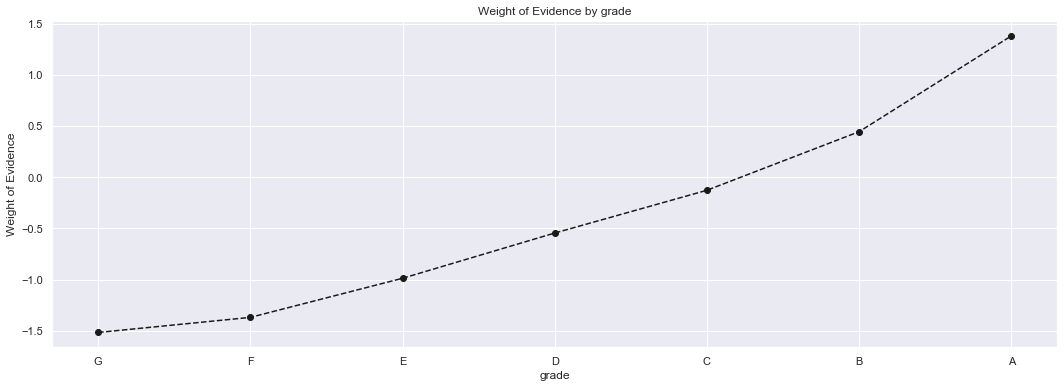

In [61]:
plot_by_woe(df_temp)

The greater the grade, the greater the weight of evidence. That means loans with greater external ratings are greater on avaerage

**Preprocessing Discrete Variables: Creating Dummy Variables**

In [62]:
#home_ownership variable
#Executing our previous WOE function
df_temp1 = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp1

home_ownership   n_obs  prop_good  prop_n_obs    n_good     n_bad  \
0          OTHER     142   0.809859    0.000079     115.0      27.0   
1           RENT  715761   0.853880    0.395769  611174.0  104587.0   
2           NONE      43   0.860465    0.000024      37.0       6.0   
3            OWN  202560   0.874358    0.112002  177110.0   25450.0   
4       MORTGAGE  889204   0.890740    0.491671  792050.0   97154.0   
5            ANY     824   0.933252    0.000456     769.0      55.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.000073    0.000119 -0.490701             NaN       NaN  0.024684  
1     0.386512    0.460170 -0.174433        0.044021  0.316267  0.024684  
2     0.000023    0.000026 -0.120637        0.006585  0.053796  0.024684  
3     0.112006    0.111977  0.000259        0.013893  0.120897  0.024684  
4     0.500900    0.427466  0.158531        0.016382  0.158272  0.024684  
5     0.000486    0.000242  0.697962        0.042512  0.539431  0.024684

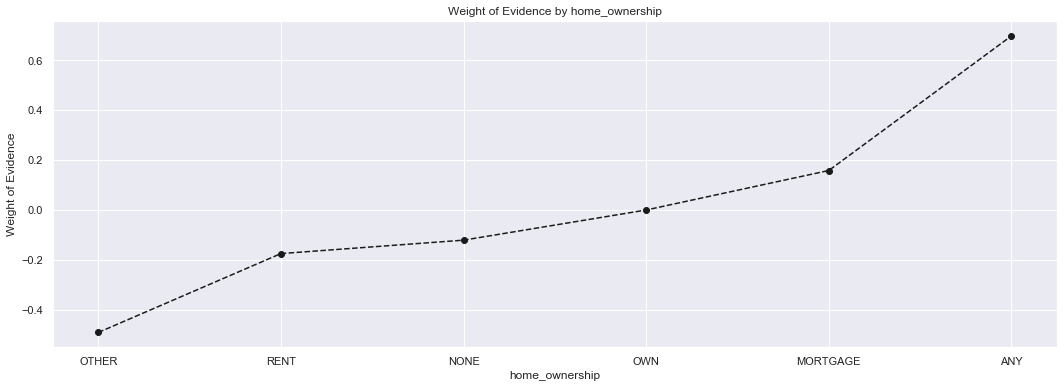

In [63]:
#Plotting the weight of evidence (woe) values by excuting the plot function we created previously.
plot_by_woe(df_temp1)


In [64]:
# There are many categories with home_ownership variable.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHER', 'ANY' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories for the 'home_onership': 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [65]:
#Unique caterogies in the addr_state variable
df_inputs_prepr['addr_state'].unique()

array(['CA', 'PA', 'MO', 'OH', 'GA', 'NY', 'TX', 'AZ', 'AR', 'IN', 'UT',
       'IL', 'VA', 'KY', 'MA', 'NC', 'CO', 'RI', 'MT', 'AL', 'NE', 'OK',
       'FL', 'WA', 'KS', 'NJ', 'MN', 'OR', 'SC', 'TN', 'NV', 'MS', 'DE',
       'WI', 'MI', 'CT', 'MD', 'WV', 'LA', 'NM', 'SD', 'HI', 'ID', 'VT',
       'DC', 'ME', 'NH', 'WY', 'AK', 'ND', 'IA'], dtype=object)

In [66]:
#addr_state variable
# We calculate weight of evidence.
df_temp2 = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp2

addr_state   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0          IA      12   0.750000    0.000007       9.0      3.0     0.000006   
1          AL   21792   0.847742    0.012050   18474.0   3318.0     0.011683   
2          AR   13572   0.850796    0.007504   11547.0   2025.0     0.007302   
3          MS   10065   0.851863    0.005565    8574.0   1491.0     0.005422   
4          OK   16515   0.853224    0.009132   14091.0   2424.0     0.008911   
5          LA   20517   0.853634    0.011345   17514.0   3003.0     0.011076   
6          NV   26116   0.857941    0.014440   22406.0   3710.0     0.014170   
7          NM    9623   0.860127    0.005321    8277.0   1346.0     0.005234   
8          HI    8558   0.861767    0.004732    7375.0   1183.0     0.004664   
9          NY  149066   0.862309    0.082424  128541.0  20525.0     0.081290   
10         SD    3654   0.862890    0.002020    3153.0    501.0     0.001994   
11         FL  129728   0.864771    0.071731  112185.0  17543.0     0.070947   
12         MO   28907   0.866053    0.015984   25035.0   3872.0     0.015832   
13         MD   43092   0.867005    0.023827   37361.0   5731.0     0.023627   
14         NC   50259   0.867904    0.027790   43620.0   6639.0     0.027586   
15         PA   61555   0.870360    0.034036   53575.0   7980.0     0.033881   
16         KY   17441   0.870363    0.009644   15180.0   2261.0     0.009600   
17         TN   28369   0.870528    0.015686   24696.0   3673.0     0.015618   
18         CA  251554   0.870851    0.139093  219066.0  32488.0     0.138539   
19         NJ   66339   0.871086    0.036681   57787.0   8552.0     0.036545   
20         MI   47058   0.871244    0.026020   40999.0   6059.0     0.025928   
21         IN   30120   0.871912    0.016654   26262.0   3858.0     0.016608   
22         VA   50271   0.872789    0.027797   43876.0   6395.0     0.027748   
23         MN   31559   0.872905    0.017450   27548.0   4011.0     0.017422   
24         AK    4187   0.873418    0.002315    3657.0    530.0     0.002313   
25         AZ   42948   0.874569    0.023747   37561.0   5387.0     0.023754   
26         NE    6281   0.875338    0.003473    5498.0    783.0     0.003477   
27         OH   60217   0.875716    0.033296   52733.0   7484.0     0.033349   
28         TX  149254   0.876010    0.082528  130748.0  18506.0     0.082686   
29         DE    5174   0.877078    0.002861    4538.0    636.0     0.002870   
30         MA   41532   0.878551    0.022964   36488.0   5044.0     0.023075   
31         UT   11909   0.880511    0.006585   10486.0   1423.0     0.006631   
32         WI   23895   0.884160    0.013212   21127.0   2768.0     0.013361   
33         GA   59335   0.887099    0.032808   52636.0   6699.0     0.033287   
34         RI    8024   0.887712    0.004437    7123.0    901.0     0.004505   
35         WY    3784   0.889271    0.002092    3365.0    419.0     0.002128   
36         IL   72910   0.890536    0.040314   64929.0   7981.0     0.041062   
37         MT    5056   0.892603    0.002796    4513.0    543.0     0.002854   
38         KS   15266   0.893358    0.008441   13638.0   1628.0     0.008625   
39         CT   28587   0.896491    0.015807   25628.0   2959.0     0.016207   
40         ND    2923   0.896681    0.001616    2621.0    302.0     0.001658   
41         WA   37787   0.897637    0.020894   33919.0   3868.0     0.021451   
42         CO   38525   0.898300    0.021302   34607.0   3918.0     0.021886   
43         SC   22432   0.900009    0.012403   20189.0   2243.0     0.012768   
44         WV    6687   0.905339    0.003697    6054.0    633.0     0.003829   
45         OR   21465   0.907011    0.011869   19469.0   1996.0     0.012312   
46         NH    8955   0.908766    0.004952    8138.0    817.0     0.005147   
47         DC    4292   0.909366    0.002373    3903.0    389.0     0.002468   
48         ID    3486   0.919392    0.001928    3205.0    281.0     0.002027   
49 

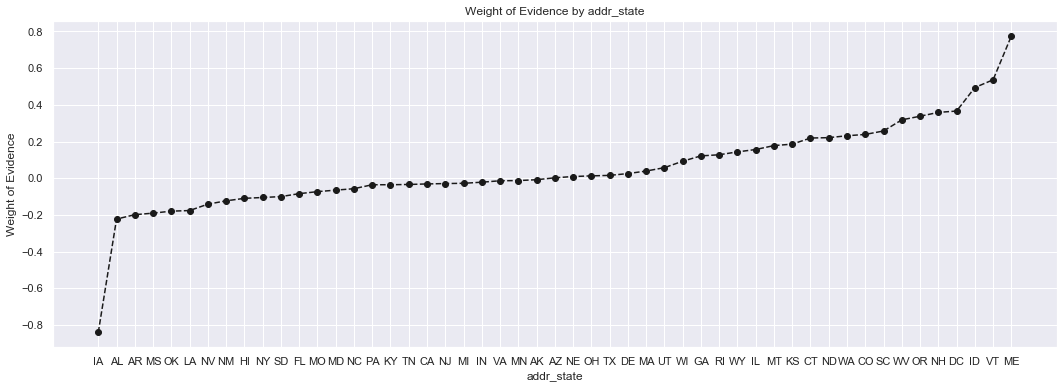

In [67]:
# We plot the weight of evidence values.
plot_by_woe(df_temp2)

In [68]:
#We want to get a normal curve
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

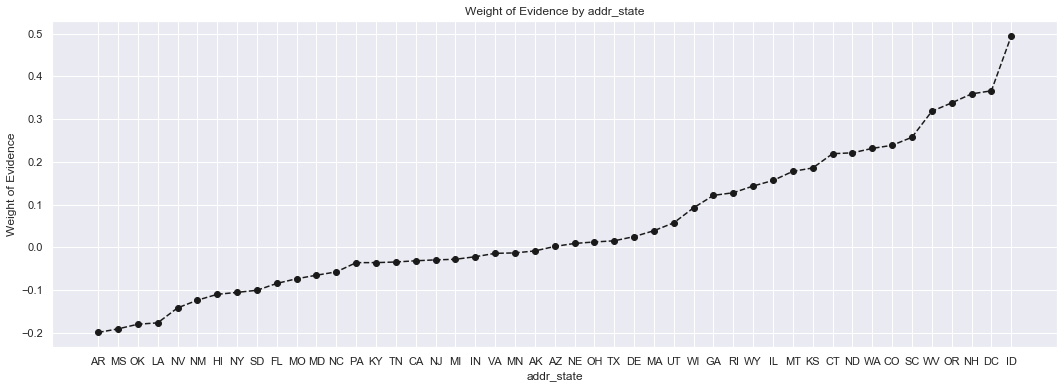

In [69]:
# We plot the weight of evidence values again for the 'addr_state' by removing the state IA and AL.
plot_by_woe(df_temp2.iloc[2: -2, : ])

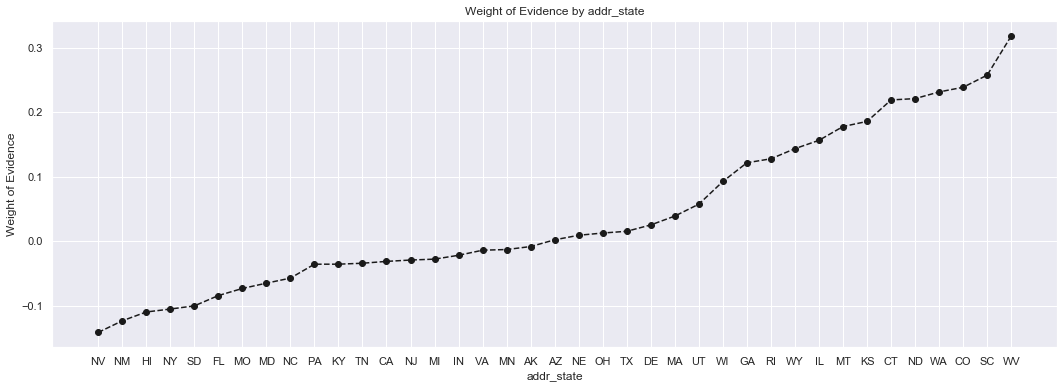

In [70]:
# We plot the weight of evidence values again by removing the upper states OR, NH, DC, ID, VT, ME.
plot_by_woe(df_temp2.iloc[6: -6, : ])

In [71]:
# Creating dummies for the 'addr_state' variable
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'ND_NE_IA_NV_FL_HI_AL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [72]:
# 'verification_status' variable'
# We calculate weight of evidence.

df_temp3 = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp3

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  503341   0.833606    0.278314  419588.0  83753.0   
1     Source Verified  708836   0.869610    0.391940  616411.0  92425.0   
2        Not Verified  596357   0.914311    0.329746  545256.0  51101.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.265351    0.368503 -0.328394             NaN       NaN  0.085899  
1     0.389824    0.406659 -0.042279        0.036004  0.286115  0.085899  
2     0.344825    0.224838  0.427656        0.044701  0.469935  0.085899

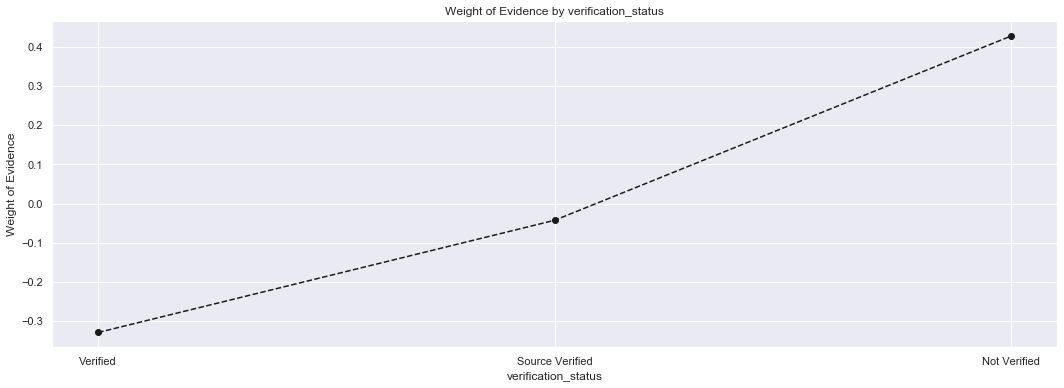

In [73]:
# We plot the weight of evidence values.
plot_by_woe(df_temp3)


In [74]:
# 'purpose' variable
# We calculate weight of evidence.

df_temp4 = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp4

purpose    n_obs  prop_good  prop_n_obs    n_good     n_bad  \
0          educational      344   0.787791    0.000190     271.0      73.0   
1       small_business    19765   0.801265    0.010929   15837.0    3928.0   
2     renewable_energy     1145   0.846288    0.000633     969.0     176.0   
3               moving    12419   0.848377    0.006867   10536.0    1883.0   
4   debt_consolidation  1022358   0.864036    0.565297  883354.0  139004.0   
5              medical    21975   0.867941    0.012151   19073.0    2902.0   
6              wedding     1886   0.872747    0.001043    1646.0     240.0   
7                other   111451   0.873568    0.061625   97360.0   14091.0   
8                house    11266   0.877508    0.006229    9886.0    1380.0   
9             vacation    12391   0.879751    0.006851   10901.0    1490.0   
10      major_purchase    40470   0.883099    0.022377   35739.0    4731.0   
11    home_improvement   120332   0.889439    0.066536  107028.0   13304.0   
12         credit_card   413521   0.897785    0.228650  371253.0   42268.0   
13                 car    19211   0.905835    0.010622   17402.0    1809.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000171    0.000321 -0.628136             NaN       NaN  0.023151  
1      0.010015    0.017283 -0.545577        0.013474  0.082559  0.023151  
2      0.000613    0.000774 -0.234015        0.045023  0.311562  0.023151  
3      0.006663    0.008285 -0.217864        0.002089  0.016151  0.023151  
4      0.558641    0.611601 -0.090572        0.015658  0.127292  0.023151  
5      0.012062    0.012768 -0.056922        0.003905  0.033650  0.023151  
6      0.001041    0.001056 -0.014331        0.004806  0.042591  0.023151  
7      0.061571    0.061999 -0.006917        0.000821  0.007415  0.023151  
8      0.006252    0.006072  0.029240        0.003940  0.036157  0.023151  
9      0.006894    0.006556  0.050283        0.002244  0.021042  0.023151  
10     0.022602    0.020816  0.082310        0.003347  0.032028  0.023151  
11     0.067685    0.058536  0.145230        0.006341  0.062920  0.023151  
12     0.234784    0.185974  0.233058        0.008346  0.087828  0.023151  
13     0.011005    0.007959  0.324015        0.008050  0.090957  0.023151

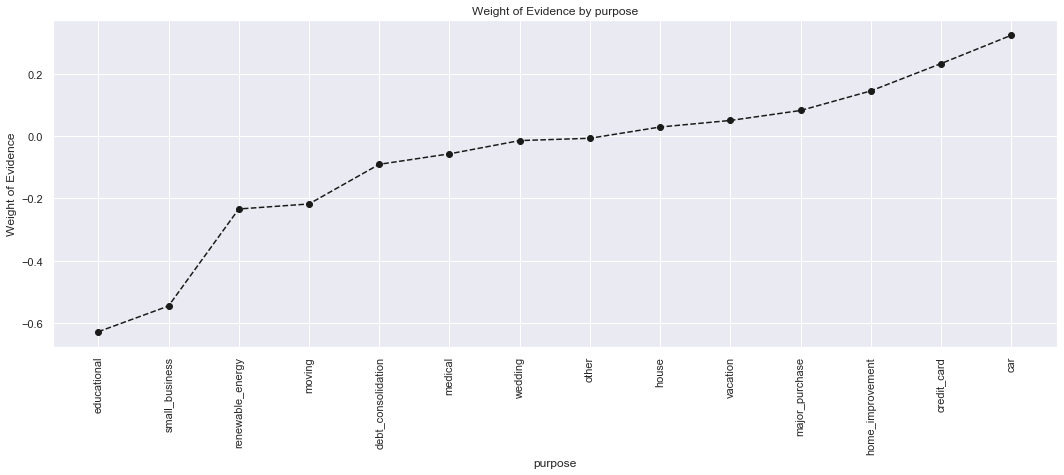

In [75]:
plot_by_woe(df_temp4, 90)
# We plot the weight of evidence values.

In [76]:
# We create dummy variables for the 'purpose' variable
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [77]:
# 'initial_list_status' variable
# We calculate weight of evidence.

df_temp5 = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp5

initial_list_status    n_obs  prop_good  prop_n_obs     n_good     n_bad  \
0                   f   580462   0.842541    0.320957   489063.0   91399.0   
1                   w  1228072   0.889355    0.679043  1092192.0  135880.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.309288    0.402145 -0.262539             NaN       NaN  0.037785  
1     0.690712    0.597855  0.144374        0.046814  0.406913  0.037785

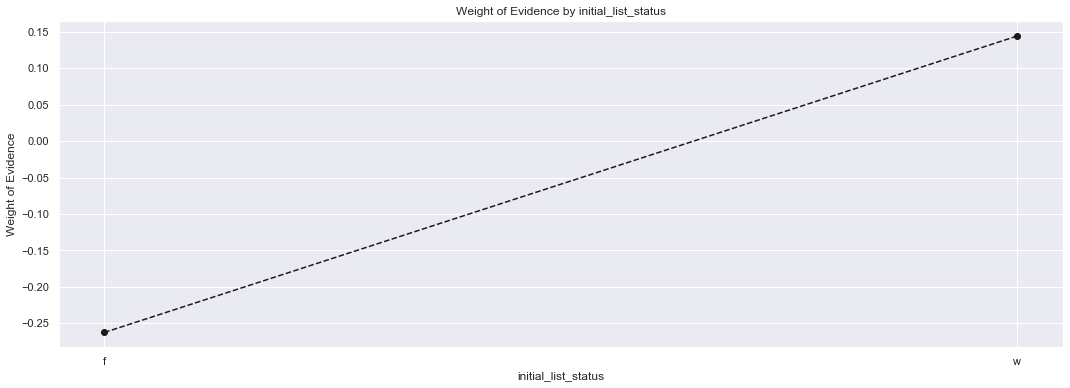

In [78]:
# We plot the weight of evidence values.
plot_by_woe(df_temp5)


**Preprocessing Continuous Variables: Creating dummy variables**

In [79]:
# WoE function for ordered discrete and continuous variables
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [80]:
# term variable
# There are only two unique values, 36 and 60.
df_inputs_prepr['term_int'].unique()

array([36, 60], dtype=int64)

In [81]:
# We calculate weight of evidence.
df_temp6 = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp6

term_int    n_obs  prop_good  prop_n_obs     n_good     n_bad  prop_n_good  \
0        36  1288079   0.892962    0.712223  1150206.0  137873.0     0.727401   
1        60   520455   0.828216    0.287777   431049.0   89406.0     0.272599   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.606624  0.181568             NaN       NaN  0.066225  
1    0.393376 -0.366762        0.064747  0.548329  0.066225

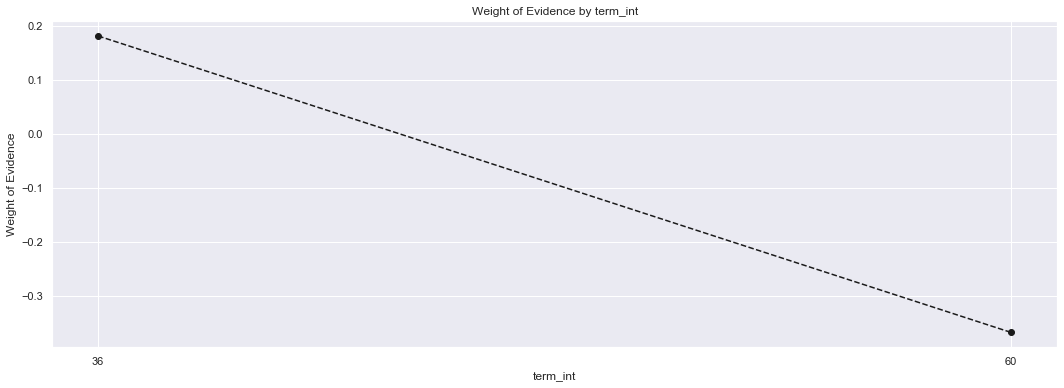

In [82]:
# We plot the weight of evidence values.
plot_by_woe(df_temp6)


It seems 60 months loans are much risky than 36 months loans

In [83]:
# We will keep both the 36 and 60 months category.
# However the '60' months will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [84]:
# emp_length_int variable
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  4.,  9.,  5.,  6.,  2.,  7.,  3.,  1.,  8.])

In [85]:
# We calculate weight of evidence.
df_temp7 = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp7

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  269712   0.863873    0.149133  232997.0  36715.0   
1              1.0  118648   0.869024    0.065605  103108.0  15540.0   
2              2.0  163041   0.874872    0.090151  142640.0  20401.0   
3              3.0  144605   0.873794    0.079957  126355.0  18250.0   
4              4.0  109209   0.876604    0.060385   95733.0  13476.0   
5              5.0  111790   0.874202    0.061812   97727.0  14063.0   
6              6.0   82062   0.874851    0.045375   71792.0  10270.0   
7              7.0   74021   0.868470    0.040929   64285.0   9736.0   
8              8.0   73442   0.861864    0.040609   63297.0  10145.0   
9              9.0   63573   0.866421    0.035152   55081.0   8492.0   
10            10.0  598431   0.882708    0.330893  528240.0  70191.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.147349    0.161542 -0.091956             NaN       NaN  0.004262  
1      0.065206    0.068374 -0.047436        0.005151  0.044519  0.004262  
2      0.090207    0.089762  0.004944        0.005848  0.052380  0.004262  
3      0.079908    0.080298 -0.004865        0.001078  0.009810  0.004262  
4      0.060542    0.059293  0.020857        0.002809  0.025722  0.004262  
5      0.061803    0.061875 -0.001165        0.002402  0.022022  0.004262  
6      0.045402    0.045187  0.004750        0.000649  0.005915  0.004262  
7      0.040654    0.042837 -0.052300        0.006381  0.057050  0.004262  
8      0.040030    0.044637 -0.108939        0.006606  0.056639  0.004262  
9      0.034834    0.037364 -0.070115        0.004557  0.038823  0.004262  
10     0.334064    0.308832  0.078535        0.016287  0.148650  0.004262

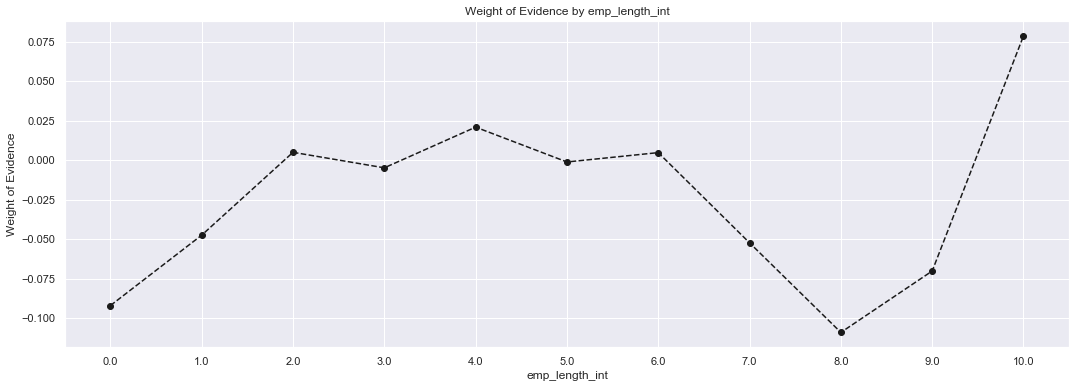

In [86]:
# We plot the weight of evidence values.
plot_by_woe(df_temp7)


In [87]:
# Employment length has several categories
# So we have to create the following new categories for emp_length_int: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [88]:
# Months since loan issue date (mths_since_issue_d) variable
df_inputs_prepr['mths_since_issue_d'].unique()

array([ -5., -11.,   7.,  14.,  22.,  17.,  74.,   5., -12.,  30.,   1.,
        43.,  -1.,  37.,  49.,  -8.,  -9.,  27.,  18.,  31.,   3.,  54.,
        -3.,  21.,  -4., -10.,   4.,  77.,  28.,  -6.,  34.,   0.,  13.,
        51.,  23.,  64.,  35.,  29.,  41.,   2.,  15.,  47.,  26.,   9.,
        40.,  46.,  -7.,  33.,  56.,  12.,  10.,  52.,  11.,  73.,  38.,
        24.,  16.,  45.,  79.,  59.,  20.,  58.,  39.,   6.,  48.,  19.,
         8.,  44.,  53.,  69.,  -2.,  61., 118.,  25.,  32.,  62.,  50.,
        66.,  42.,  84.,  72.,  67., 120.,  82.,  57.,  36.,  55.,  98.,
        70.,  63.,  81.,  65.,  95.,  60., 100.,  93.,  87.,  80.,  99.,
        92.,  97., 101.,  75.,  71.,  94.,  76., 113.,  90.,  86.,  68.,
        78.,  96., 110.,  83.,  85., 116.,  91., 108., 115.,  89., 119.,
       105., 107., 117., 102.,  88., 109., 122., 106., 112., 103., 104.,
       125., 126., 114., 121., 111., 123., 124.])

In [89]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [90]:
df_inputs_prepr['mths_since_issue_d_factor']

305053       (-6.48, -3.72]
50247      (-12.138, -9.24]
1630001        (4.56, 7.32]
927626        (12.84, 15.6]
758488       (21.12, 23.88]
                 ...       
732180       (18.36, 21.12]
110268     (-12.138, -9.24]
1692743      (48.72, 51.48]
2229084         (1.8, 4.56]
2219110        (-0.96, 1.8]
Name: mths_since_issue_d_factor, Length: 1808534, dtype: category
Categories (50, interval[float64]): [(-12.138, -9.24] < (-9.24, -6.48] < (-6.48, -3.72] < (-3.72, -0.96] ... (114.96, 117.72] < (117.72, 120.48] < (120.48, 123.24] < (123.24, 126.0]]

In [91]:
# mths_since_issue_d
# We calculate weight of evidence.
df_temp8 = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp8

mths_since_issue_d_factor   n_obs  prop_good  prop_n_obs    n_good  \
0           (-12.138, -9.24]  102884   0.995655    0.056888  102437.0   
1             (-9.24, -6.48]  102605   0.983724    0.056734  100935.0   
2             (-6.48, -3.72]  104563   0.961726    0.057816  100561.0   
3             (-3.72, -0.96]   86368   0.945686    0.047756   81677.0   
4               (-0.96, 1.8]   64324   0.928394    0.035567   59718.0   
5                (1.8, 4.56]   97239   0.908185    0.053767   88311.0   
6               (4.56, 7.32]   92057   0.890839    0.050901   82008.0   
7              (7.32, 10.08]   75549   0.881613    0.041774   66605.0   
8             (10.08, 12.84]   54361   0.863266    0.030058   46928.0   
9              (12.84, 15.6]   76286   0.854626    0.042181   65196.0   
10             (15.6, 18.36]   83263   0.832134    0.046039   69286.0   
11            (18.36, 21.12]  101511   0.823783    0.056129   83623.0   
12            (21.12, 23.88]   57539   0.824919    0.031815   47465.0   
13            (23.88, 26.64]  104290   0.821296    0.057665   85653.0   
14             (26.64, 29.4]   88476   0.817272    0.048921   72309.0   
15             (29.4, 32.16]   76718   0.814085    0.042420   62455.0   
16            (32.16, 34.92]   39238   0.816326    0.021696   32031.0   
17            (34.92, 37.68]   56446   0.820607    0.031211   46320.0   
18            (37.68, 40.44]   54583   0.818332    0.030181   44667.0   
19             (40.44, 43.2]   52597   0.821815    0.029083   43225.0   
20             (43.2, 45.96]   28423   0.829856    0.015716   23587.0   
21            (45.96, 48.72]   36683   0.839326    0.020283   30789.0   
22            (48.72, 51.48]   33454   0.843875    0.018498   28231.0   
23            (51.48, 54.24]   28427   0.843177    0.015718   23969.0   
24             (54.24, 57.0]   22433   0.842330    0.012404   18896.0   
25             (57.0, 59.76]   11481   0.846616    0.006348    9720.0   
26            (59.76, 62.52]   14926   0.844299    0.008253   12602.0   
27            (62.52, 65.28]   12892   0.834781    0.007128   10762.0   
28            (65.28, 68.04]    8431   0.829320    0.004662    6992.0   
29             (68.04, 70.8]    4415   0.841450    0.002441    3715.0   
30             (70.8, 73.56]    5634   0.828364    0.003115    4667.0   
31            (73.56, 76.32]    4879   0.852429    0.002698    4159.0   
32            (76.32, 79.08]    4326   0.844660    0.002392    3654.0   
33            (79.08, 81.84]    2423   0.858853    0.001340    2081.0   
34             (81.84, 84.6]    3232   0.870668    0.001787    2814.0   
35             (84.6, 87.36]    2931   0.843739    0.001621    2473.0   
36            (87.36, 90.12]    2777   0.848037    0.001535    2355.0   
37            (90.12, 92.88]    1522   0.875821    0.000842    1333.0   
38            (92.88, 95.64]    1724   0.883411    0.000953    1523.0   
39             (95.64, 98.4]    1530   0.854902    0.000846    1308.0   
40            (98.4, 101.16]    1078   0.874768    0.000596     943.0   
41          (101.16, 103.92]     600   0.855000    0.000332     513.0   
42          (103.92, 106.68]     780   0.865385    0.000431     675.0   
43          (106.68, 109.44]     581   0.853701    0.000321     496.0   
44           (109.44, 112.2]     227   0.850220    0.000126     193.0   
45           (112.2, 114.96]     215   0.809302    0.000119     174.0   
46          (114.96, 117.72]     645   0.775194    0.000357     500.0   
47          (117.72, 120.48]     633   0.747235    0.000350     473.0   
48          (120.48, 123.24]     212   0.698113    0.000117     148.0   
49           (123.24, 126.0]     123   0.813008    0.000068     100.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0     447.0     0.064782    0.001967  3.494649             NaN       NaN   
1    1670.0     0.063832    0.007348  2.161857        0.011931  1.332792   
2    4002.0     0.063596    0.017608  1.284174     

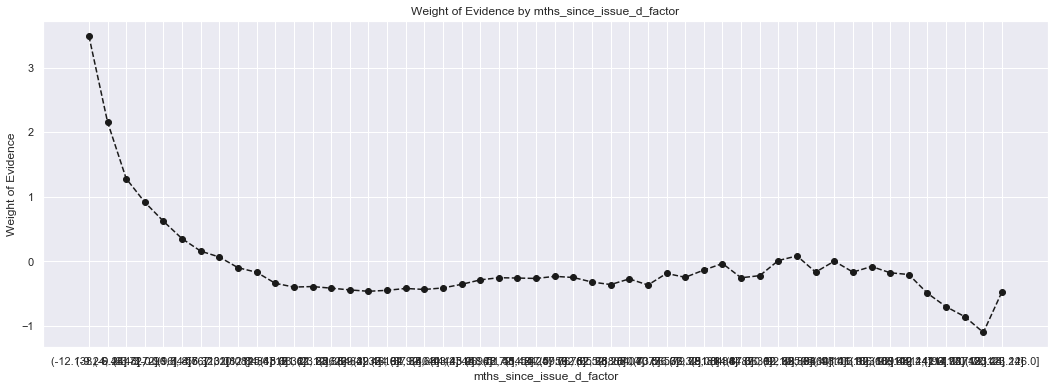

In [92]:
# We plot the weight of evidence values.
plot_by_woe(df_temp8)

We have to rotate the labels because we cannot read them otherwise.


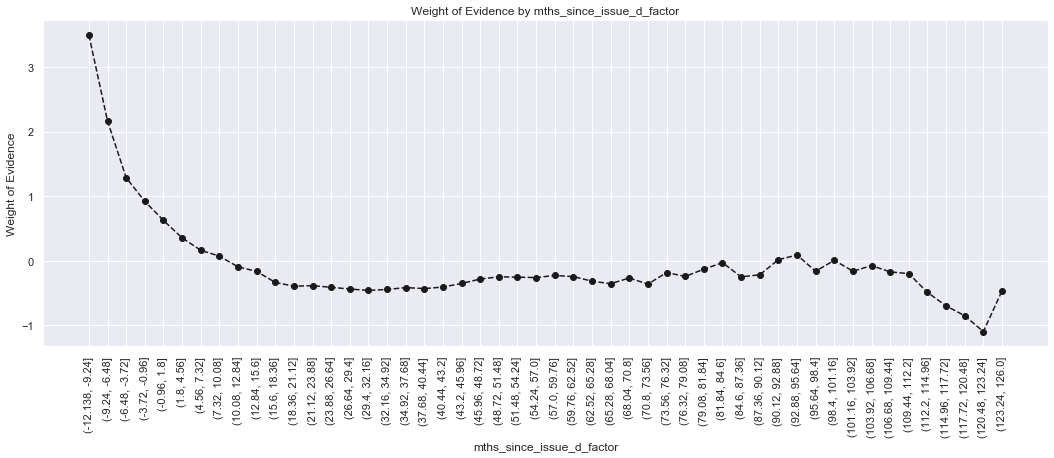

In [93]:
# We plot the weight of evidence values, rotating the labels 90 degrees.
plot_by_woe(df_temp8, 90)


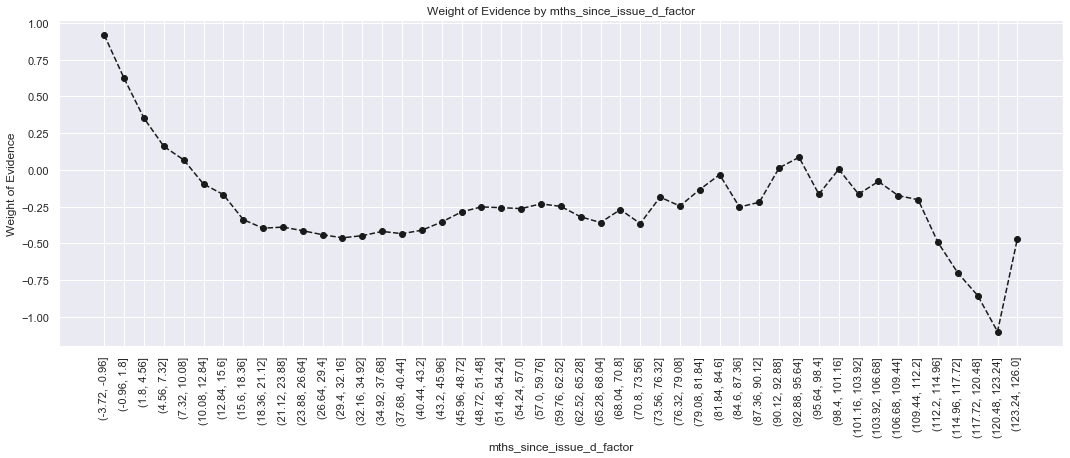

In [94]:
# We plot the weight of evidence values.
plot_by_woe(df_temp8.iloc[3: , : ], 90)

In [95]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [96]:
# int_rate variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [97]:
# We calculate weight of evidence.
df_temp9 = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp9

int_rate_factor   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0     (5.284, 5.824]   45407   0.979519    0.025107   44477.0    930.0   
1     (5.824, 6.337]   39268   0.982785    0.021713   38592.0    676.0   
2     (6.337, 6.851]   41392   0.975478    0.022887   40377.0   1015.0   
3     (6.851, 7.364]   76394   0.965442    0.042241   73754.0   2640.0   
4     (7.364, 7.878]   43531   0.962096    0.024070   41881.0   1650.0   
5     (7.878, 8.392]  110343   0.936670    0.061012  103355.0   6988.0   
6     (8.392, 8.905]   29804   0.951315    0.016480   28353.0   1451.0   
7     (8.905, 9.419]   37307   0.900582    0.020628   33598.0   3709.0   
8     (9.419, 9.932]   79775   0.938439    0.044110   74864.0   4911.0   
9    (9.932, 10.446]   63096   0.933736    0.034888   58915.0   4181.0   
10   (10.446, 10.96]   70223   0.925324    0.038829   64979.0   5244.0   
11   (10.96, 11.473]   88961   0.900867    0.049190   80142.0   8819.0   
12  (11.473, 11.987]   69239   0.902613    0.038285   62496.0   6743.0   
13    (11.987, 12.5]   85534   0.875243    0.047295   74863.0  10671.0   
14    (12.5, 13.014]  105578   0.877029    0.058378   92595.0  12983.0   
15  (13.014, 13.528]   57377   0.841661    0.031726   48292.0   9085.0   
16  (13.528, 14.041]  101364   0.862436    0.056048   87420.0  13944.0   
17  (14.041, 14.555]   77573   0.869246    0.042893   67430.0  10143.0   
18  (14.555, 15.068]   71379   0.862397    0.039468   61557.0   9822.0   
19  (15.068, 15.582]   22810   0.817887    0.012612   18656.0   4154.0   
20  (15.582, 16.096]   74031   0.822345    0.040934   60879.0  13152.0   
21  (16.096, 16.609]   42836   0.814945    0.023685   34909.0   7927.0   
22  (16.609, 17.123]   44730   0.825553    0.024733   36927.0   7803.0   
23  (17.123, 17.636]   31403   0.765277    0.017364   24032.0   7371.0   
24   (17.636, 18.15]   39552   0.811590    0.021870   32100.0   7452.0   
25   (18.15, 18.664]   30961   0.739995    0.017119   22911.0   8050.0   
26  (18.664, 19.177]   38597   0.800969    0.021342   30915.0   7682.0   
27  (19.177, 19.691]   19125   0.741124    0.010575   14174.0   4951.0   
28  (19.691, 20.204]   31432   0.781274    0.017380   24557.0   6875.0   
29  (20.204, 20.718]    8431   0.794805    0.004662    6701.0   1730.0   
30  (20.718, 21.232]   16530   0.759891    0.009140   12561.0   3969.0   
31  (21.232, 21.745]   14332   0.769118    0.007925   11023.0   3309.0   
32  (21.745, 22.259]   10293   0.732537    0.005691    7540.0   2753.0   
33  (22.259, 22.772]   12953   0.783139    0.007162   10144.0   2809.0   
34  (22.772, 23.286]    7328   0.670442    0.004052    4913.0   2415.0   
35    (23.286, 23.8]    5871   0.782320    0.003246    4593.0   1278.0   
36    (23.8, 24.313]   10634   0.699925    0.005880    7443.0   3191.0   
37  (24.313, 24.827]    6018   0.735460    0.003328    4426.0   1592.0   
38   (24.827, 25.34]   10573   0.729121    0.005846    7709.0   2864.0   
39   (25.34, 25.854]    8463   0.698807    0.004679    5914.0   2549.0   
40  (25.854, 26.368]    7768   0.739444    0.004295    5744.0   2024.0   
41  (26.368, 26.881]    2660   0.719173    0.001471    1913.0    747.0   
42  (26.881, 27.395]    3085   0.819125    0.001706    2527.0    558.0   
43  (27.395, 27.908]     864   0.537037    0.000478     464.0    400.0   
44  (27.908, 28.422]     641   0.547582    0.000354     351.0    290.0   
45  (28.422, 28.936]    3351   0.746046    0.001853    2500.0    851.0   
46  (28.936, 29.449]     235   0.455319    0.000130     107.0    128.0   
47  (29.449, 29.963]    1895   0.710290    0.001048    1346.0    549.0   
48  (29.963, 30.476]    1506   0.741700    0.000833    1117.0    389.0   
49   (30.476, 30.99]    6081   0.693800    0.003362    4219.0   1862.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.028128    0.004092  1.927747             NaN       NaN  0.472031  
1      0.024406    0.002974  2.104811        0.003266  0.177064  0.472031  
2 

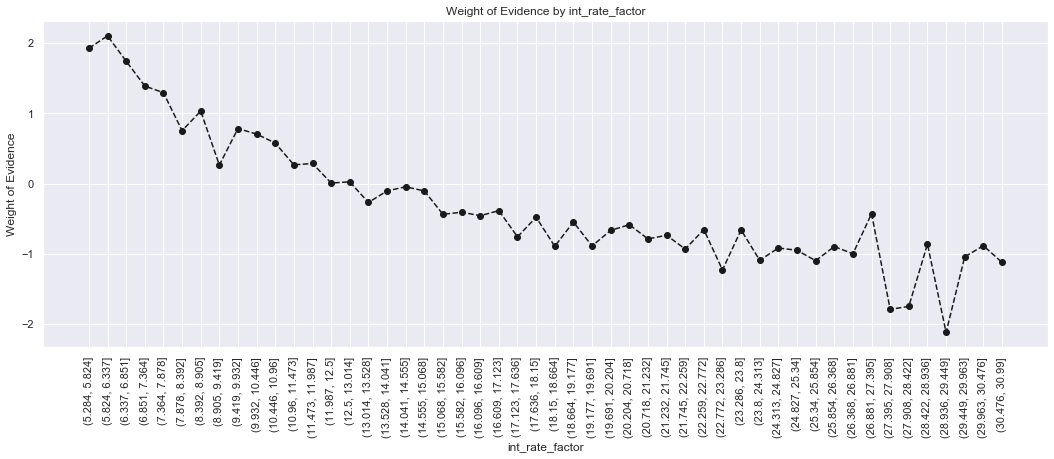

In [98]:
# We plot the weight of evidence values.
plot_by_woe(df_temp9, 90)


In [99]:
# We create the following categories:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [100]:
# funded_amnt variable
df_inputs_prepr['funded_amnt'].unique()

array([14600, 10000, 20000, ..., 35675,   900,   725], dtype=int64)

In [101]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)


In [102]:
# We calculate weight of evidence.
df_temp10 = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp10

funded_amnt_factor   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0      (460.5, 1290.0]   11369   0.920134    0.006286   10461.0    908.0   
1     (1290.0, 2080.0]   25449   0.909702    0.014072   23151.0   2298.0   
2     (2080.0, 2870.0]   22367   0.897349    0.012367   20071.0   2296.0   
3     (2870.0, 3660.0]   50818   0.899681    0.028099   45720.0   5098.0   
4     (3660.0, 4450.0]   39876   0.893369    0.022049   35624.0   4252.0   
5     (4450.0, 5240.0]   93838   0.892560    0.051886   83756.0  10082.0   
6     (5240.0, 6030.0]   84340   0.895684    0.046634   75542.0   8798.0   
7     (6030.0, 6820.0]   27430   0.879803    0.015167   24133.0   3297.0   
8     (6820.0, 7610.0]   63276   0.885960    0.034987   56060.0   7216.0   
9     (7610.0, 8400.0]   81667   0.881409    0.045156   71982.0   9685.0   
10    (8400.0, 9190.0]   39128   0.879600    0.021635   34417.0   4711.0   
11    (9190.0, 9980.0]   29707   0.860976    0.016426   25577.0   4130.0   
12   (9980.0, 10770.0]  168848   0.886199    0.093362  149633.0  19215.0   
13  (10770.0, 11560.0]   42051   0.855628    0.023251   35980.0   6071.0   
14  (11560.0, 12350.0]  108184   0.872467    0.059819   94387.0  13797.0   
15  (12350.0, 13140.0]   34513   0.872773    0.019083   30122.0   4391.0   
16  (13140.0, 13930.0]   16061   0.823921    0.008881   13233.0   2828.0   
17  (13930.0, 14720.0]   48165   0.857801    0.026632   41316.0   6849.0   
18  (14720.0, 15510.0]  110097   0.875228    0.060876   96360.0  13737.0   
19  (15510.0, 16300.0]   63634   0.862479    0.035185   54883.0   8751.0   
20  (16300.0, 17090.0]   25923   0.856691    0.014334   22208.0   3715.0   
21  (17090.0, 17880.0]   12097   0.805820    0.006689    9748.0   2349.0   
22  (17880.0, 18670.0]   49942   0.853190    0.027615   42610.0   7332.0   
23  (18670.0, 19460.0]   19278   0.833074    0.010659   16060.0   3218.0   
24  (19460.0, 20250.0]  113820   0.871903    0.062935   99240.0  14580.0   
25  (20250.0, 21040.0]   29582   0.847711    0.016357   25077.0   4505.0   
26  (21040.0, 21830.0]    9246   0.805970    0.005112    7452.0   1794.0   
27  (21830.0, 22620.0]   18330   0.860011    0.010135   15764.0   2566.0   
28  (22620.0, 23410.0]   11536   0.840673    0.006379    9698.0   1838.0   
29  (23410.0, 24200.0]   50894   0.858195    0.028141   43677.0   7217.0   
30  (24200.0, 24990.0]    6150   0.807317    0.003401    4965.0   1185.0   
31  (24990.0, 25780.0]   58738   0.881252    0.032478   51763.0   6975.0   
32  (25780.0, 26570.0]    9249   0.849281    0.005114    7855.0   1394.0   
33  (26570.0, 27360.0]    7933   0.851254    0.004386    6753.0   1180.0   
34  (27360.0, 28150.0]   28671   0.866032    0.015853   24830.0   3841.0   
35  (28150.0, 28940.0]    4425   0.825537    0.002447    3653.0    772.0   
36  (28940.0, 29730.0]    5303   0.837262    0.002932    4440.0    863.0   
37  (29730.0, 30520.0]   51742   0.874454    0.028610   45246.0   6496.0   
38  (30520.0, 31310.0]    4118   0.833900    0.002277    3434.0    684.0   
39  (31310.0, 32100.0]   13583   0.871089    0.007511   11832.0   1751.0   
40  (32100.0, 32890.0]    3009   0.817215    0.001664    2459.0    550.0   
41  (32890.0, 33680.0]    4925   0.847107    0.002723    4172.0    753.0   
42  (33680.0, 34470.0]    2874   0.849339    0.001589    2441.0    433.0   
43  (34470.0, 35260.0]   70713   0.844625    0.039100   59726.0  10987.0   
44  (35260.0, 36050.0]    5095   0.945240    0.002817    4816.0    279.0   
45  (36050.0, 36840.0]     541   0.944547    0.000299     511.0     30.0   
46  (36840.0, 37630.0]     973   0.948613    0.000538     923.0     50.0   
47  (37630.0, 38420.0]    1225   0.960000    0.000677    1176.0     49.0   
48  (38420.0, 39210.0]     696   0.954023    0.000385     664.0     32.0   
49  (39210.0, 40000.0]   27105   0.946467    0.014987   25654.0   1451.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.006616    0.003995  0.504369             N

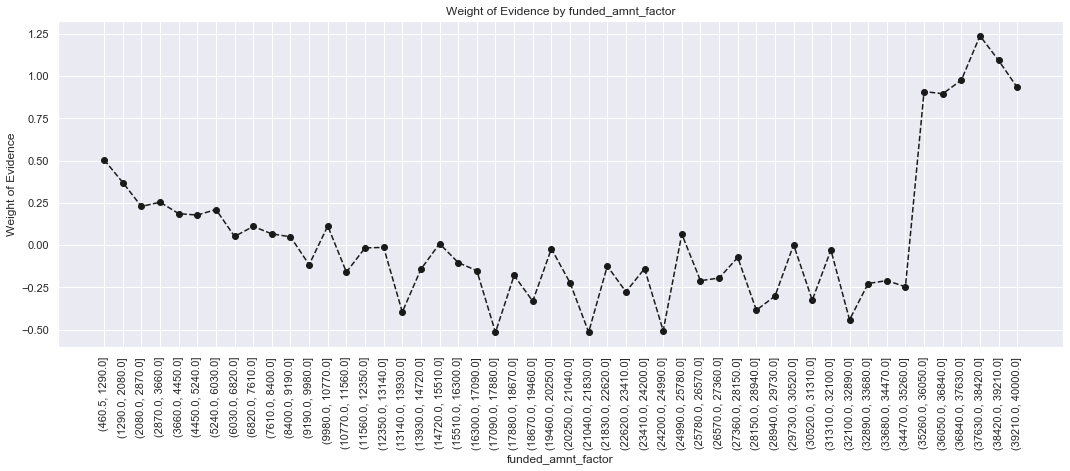

In [103]:
# We plot the weight of evidence values.
plot_by_woe(df_temp10, 90)

In [104]:
# mths_since_earliest_cr_line variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

In [105]:
# We calculate weight of evidence.
df_temp11 = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp11

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_earliest_cr_line_factor   n_obs  prop_good    prop_n_obs  \
0                     (-1.017, 20.34]      21   0.904762  1.161161e-05   
1                      (20.34, 40.68]    8391   0.962102  4.639669e-03   
2                      (40.68, 61.02]   29026   0.917970  1.604946e-02   
3                      (61.02, 81.36]   46940   0.886877  2.595472e-02   
4                      (81.36, 101.7]   53631   0.880890  2.965441e-02   
5                     (101.7, 122.04]   79711   0.878085  4.407492e-02   
6                    (122.04, 142.38]  153998   0.879011  8.515074e-02   
7                    (142.38, 162.72]  190558   0.870717  1.053660e-01   
8                    (162.72, 183.06]  195847   0.865477  1.082905e-01   
9                     (183.06, 203.4]  177918   0.864061  9.837692e-02   
10                    (203.4, 223.74]  170213   0.866097  9.411656e-02   
11                   (223.74, 244.08]  138853   0.869423  7.677655e-02   
12                   (244.08, 264.42]  105998   0.870564  5.860990e-02   
13                   (264.42, 284.76]  100688   0.874106  5.567382e-02   
14                    (284.76, 305.1]   76392   0.879569  4.223974e-02   
15                    (305.1, 325.44]   49642   0.881028  2.744875e-02   
16                   (325.44, 345.78]   52443   0.882387  2.899752e-02   
17                   (345.78, 366.12]   42671   0.882590  2.359425e-02   
18                   (366.12, 386.46]   32651   0.886711  1.805385e-02   
19                    (386.46, 406.8]   27235   0.888342  1.505916e-02   
20                    (406.8, 427.14]   20438   0.887611  1.130087e-02   
21                   (427.14, 447.48]   12563   0.883786  6.946510e-03   
22                   (447.48, 467.82]    9723   0.890877  5.376178e-03   
23                   (467.82, 488.16]    9894   0.881544  5.470729e-03   
24                    (488.16, 508.5]    6405   0.883528  3.541542e-03   
25                    (508.5, 528.84]    4454   0.881455  2.462768e-03   
26                   (528.84, 549.18]    3893   0.877986  2.152572e-03   
27                   (549.18, 569.52]    2361   0.875476  1.305477e-03   
28                   (569.52, 589.86]    2077   0.866635  1.148444e-03   
29                    (589.86, 610.2]    1445   0.826298  7.989897e-04   
30                    (610.2, 630.54]     969   0.825593  5.357931e-04   
31                   (630.54, 650.88]     645   0.804651  3.566425e-04   
32                   (650.88, 671.22]     345   0.771014  1.907622e-04   
33                   (671.22, 691.56]     150   0.840000  8.294011e-05   
34                    (691.56, 711.9]     177   0.847458  9.786932e-05   
35                    (711.9, 732.24]      70   0.800000  3.870538e-05   
36                   (732.24, 752.58]      30   0.866667  1.658802e-05   
37                   (752.58, 772.92]      18   0.777778  9.952813e-06   
38                   (772.92, 793.26]      12   0.583333  6.635208e-06   
39                    (793.26, 813.6]      16   0.687500  8.846945e-06   
40                    (813.6, 833.94]      10   1.000000  5.529340e-06   
41                   (833.94, 854.28]       3   1.000000  1.658802e-06   
42                   (854.28, 874.62]       3   1.000000  1.658802e-06   
43                   (874.62, 894.96]       2   0.500000  1.105868e-06   
44                    (894.96, 915.3]       0        NaN  0.000000e+00   
45                    (915.3, 935.64]       1   1.000000  5.529340e-07   
46                   (935.64, 955.98]       0        NaN  0.000000e+00   
47                   (955.98, 976.32]       0        NaN  0.000000e+00   
48                   (976.32, 996.66]       0        NaN  0.000000e+00   
49                   (996.66, 1017.0]       3   1.000000  1.658802e-06   

      n_good    n_bad   prop_n_good  prop_n_bad       WoE  diff_prop_good  \
0       19.0      2.0  1.201577e-05    0.000009  0.311496             NaN   
1     8073.0    318.0  5.105438e-03    0.001399  1.294433        0.057340 

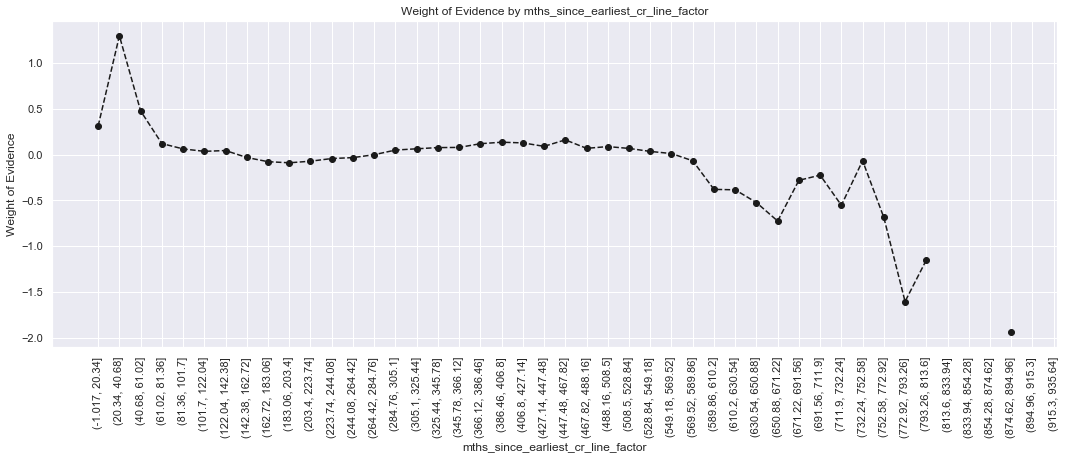

In [106]:
# We plot the weight of evidence values.
plot_by_woe(df_temp11, 90)

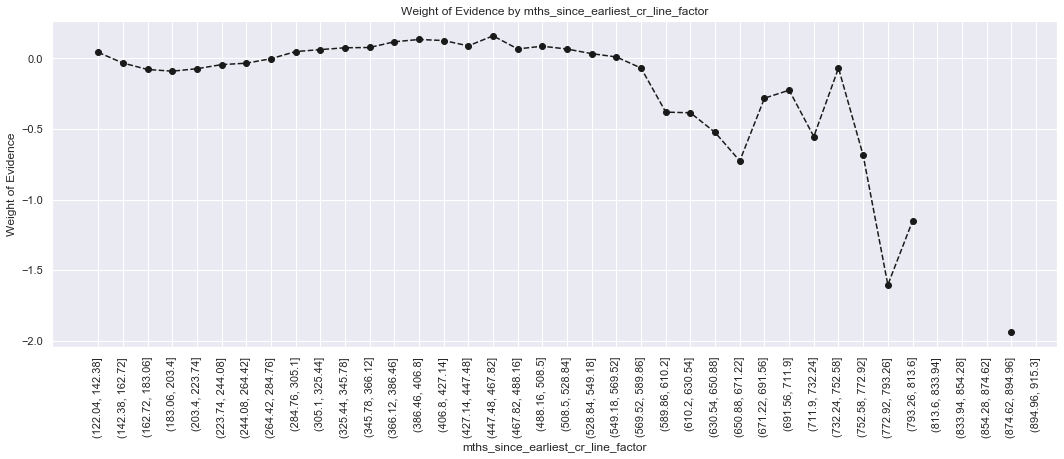

In [107]:
# We plot the weight of evidence values
plot_by_woe(df_temp11.iloc[6: , : ], 90)

In [108]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [109]:
# delinq_2yrs variable
# We calculate weight of evidence
df_temp12 = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp12

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs    n_obs  prop_good    prop_n_obs     n_good     n_bad  \
0           0.0  1471443   0.877602  8.136109e-01  1291342.0  180101.0   
1           1.0   224968   0.864514  1.243925e-01   194488.0   30480.0   
2           2.0    65018   0.854056  3.595067e-02    55529.0    9489.0   
3           3.0    23720   0.848820  1.311560e-02    20134.0    3586.0   
4           4.0    10476   0.847079  5.792537e-03     8874.0    1602.0   
5           5.0     5261   0.838814  2.908986e-03     4413.0     848.0   
6           6.0     2938   0.852621  1.624520e-03     2505.0     433.0   
7           7.0     1657   0.839469  9.162117e-04     1391.0     266.0   
8           8.0      985   0.847716  5.446400e-04      835.0     150.0   
9           9.0      647   0.833076  3.577483e-04      539.0     108.0   
10         10.0      458   0.864629  2.532438e-04      396.0      62.0   
11         11.0      291   0.831615  1.609038e-04      242.0      49.0   
12         12.0      219   0.844749  1.210926e-04      185.0      34.0   
13         13.0      132   0.840909  7.298729e-05      111.0      21.0   
14         14.0       98   0.836735  5.418754e-05       82.0      16.0   
15         15.0       66   0.878788  3.649365e-05       58.0       8.0   
16         16.0       43   0.860465  2.377616e-05       37.0       6.0   
17         17.0       21   0.761905  1.161161e-05       16.0       5.0   
18         18.0       26   0.846154  1.437628e-05       22.0       4.0   
19         19.0       20   0.850000  1.105868e-05       17.0       3.0   
20         20.0       15   0.800000  8.294011e-06       12.0       3.0   
21         21.0        8   0.750000  4.423472e-06        6.0       2.0   
22         22.0        5   1.000000  2.764670e-06        5.0       0.0   
23         23.0        2   1.000000  1.105868e-06        2.0       0.0   
24         24.0        3   1.000000  1.658802e-06        3.0       0.0   
25         25.0        2   0.500000  1.105868e-06        1.0       1.0   
26         26.0        3   1.000000  1.658802e-06        3.0       0.0   
27         27.0        1   0.000000  5.529340e-07        0.0       1.0   
28         28.0        1   1.000000  5.529340e-07        1.0       0.0   
29         29.0        2   1.000000  1.105868e-06        2.0       0.0   
30         30.0        1   1.000000  5.529340e-07        1.0       0.0   
31         32.0        1   1.000000  5.529340e-07        1.0       0.0   
32         36.0        1   0.000000  5.529340e-07        0.0       1.0   
33         39.0        1   1.000000  5.529340e-07        1.0       0.0   
34         42.0        1   1.000000  5.529340e-07        1.0       0.0   

     prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   8.166564e-01    0.792423  0.030124             NaN       NaN  inf  
1   1.229960e-01    0.134108 -0.086496        0.013088  0.116620  inf  
2   3.511704e-02    0.041750 -0.173024        0.010458  0.086528  inf  
3   1.273292e-02    0.015778 -0.214423        0.005236  0.041400  inf  
4   5.611998e-03    0.007049 -0.227923        0.001741  0.013500  inf  
5   2.790821e-03    0.003731 -0.290366        0.008265  0.062443  inf  
6   1.584185e-03    0.001905 -0.184489        0.013807  0.105877  inf  
7   8.796810e-04    0.001170 -0.285514        0.013152  0.101024  inf  
8   5.280616e-04    0.000660 -0.222999        0.008247  0.062515  inf  
9   3.408685e-04    0.000475 -0.332211        0.014640  0.109212  inf  
10  2.504340e-04    0.000273 -0.085516        0.031553  0.246695  inf  
11  1.530430e-04    0.000216 -0.342678        0.033014  0.257162  inf  
12  1.169957e-04    0.000150 -0.245800        0.013134  0.096878  inf  
13  7.019741e-05    0.000092 -0.274788        0.003840  0.028988  inf  
14  5.185754e-05    0.000070 -0.305665        0.004174  0.030877  inf  
15  3.667973e-05    0.000035  0.041206        0.042053  0.346871  inf  
16  2.339914e-05    0.000026 -0.120637        0.018323  0.161843  inf  
17  1.011855e-05    0.000022 -0.776645     

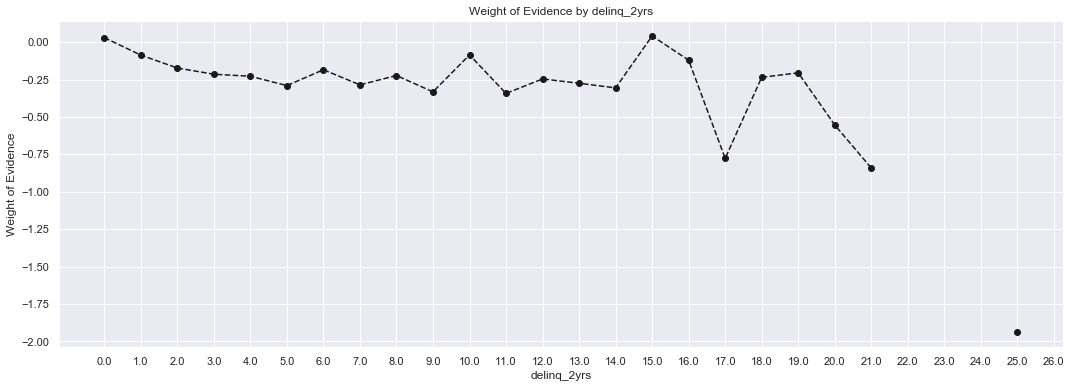

In [110]:
# We plot the weight of evidence values
plot_by_woe(df_temp12)


In [111]:
# We create the following Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [112]:
# inq_last_6mths variable
# We calculate weight of evidence.
df_temp13 = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp13

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


inq_last_6mths    n_obs  prop_good    prop_n_obs    n_good     n_bad  \
0              0.0  1105491   0.893913  6.112636e-01  988213.0  117278.0   
1              1.0   467442   0.858017  2.584646e-01  401073.0   66369.0   
2              2.0   160218   0.828827  8.858999e-02  132793.0   27425.0   
3              3.0    55170   0.795668  3.050537e-02   43897.0   11273.0   
4              4.0    13879   0.762735  7.674171e-03   10586.0    3293.0   
5              5.0     4978   0.746083  2.752506e-03    3714.0    1264.0   
6              6.0      993   0.746224  5.490635e-04     741.0     252.0   
7              7.0      149   0.671141  8.238717e-05     100.0      49.0   
8              8.0       98   0.632653  5.418754e-05      62.0      36.0   
9              9.0       42   0.642857  2.322323e-05      27.0      15.0   
10            10.0       15   0.933333  8.294011e-06      14.0       1.0   
11            11.0       14   0.785714  7.741076e-06      11.0       3.0   
12            12.0       11   0.545455  6.082274e-06       6.0       5.0   
13            13.0        5   0.600000  2.764670e-06       3.0       2.0   
14            14.0        4   0.250000  2.211736e-06       1.0       3.0   
15            15.0        7   0.428571  3.870538e-06       3.0       4.0   
16            16.0        3   1.000000  1.658802e-06       3.0       0.0   
17            17.0        2   0.500000  1.105868e-06       1.0       1.0   
18            18.0        4   0.500000  2.211736e-06       2.0       2.0   
19            19.0        1   1.000000  5.529340e-07       1.0       0.0   
20            20.0        1   0.000000  5.529340e-07       0.0       1.0   
21            24.0        1   1.000000  5.529340e-07       1.0       0.0   
22            25.0        1   0.000000  5.529340e-07       0.0       1.0   
23            27.0        1   1.000000  5.529340e-07       1.0       0.0   
24            28.0        1   1.000000  5.529340e-07       1.0       0.0   
25            31.0        1   1.000000  5.529340e-07       1.0       0.0   
26            32.0        1   0.000000  5.529340e-07       0.0       1.0   
27            33.0        1   0.000000  5.529340e-07       0.0       1.0   

     prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   6.249549e-01    0.516009  0.191555             NaN       NaN  inf  
1   2.536422e-01    0.292016 -0.140882        0.035897  0.332438  inf  
2   8.397950e-02    0.120667 -0.362459        0.029190  0.221577  inf  
3   2.776086e-02    0.049600 -0.580360        0.033159  0.217901  inf  
4   6.694682e-03    0.014489 -0.772062        0.032933  0.191702  inf  
5   2.348767e-03    0.005561 -0.861968        0.016652  0.089905  inf  
6   4.686151e-04    0.001109 -0.861224        0.000141  0.000743  inf  
7   6.324091e-05    0.000216 -1.226446        0.075083  0.365222  inf  
8   3.920936e-05    0.000158 -1.396180        0.038488  0.169734  inf  
9   1.707504e-05    0.000066 -1.352009        0.010204  0.044171  inf  
10  8.853727e-06    0.000004  0.699262        0.290476  2.051271  inf  
11  6.956500e-06    0.000013 -0.640513        0.147619  1.339774  inf  
12  3.794454e-06    0.000022 -1.757474        0.240260  1.116961  inf  
13  1.897227e-06    0.000009 -1.534331        0.054545  0.223144  inf  
14  6.324091e-07    0.000013 -3.038408        0.350000  1.504077  inf  
15  1.897227e-06    0.000018 -2.227478        0.178571  0.810930  inf  
16  1.897227e-06    0.000000       inf        0.571429       inf  inf  
17  6.324091e-07    0.000004 -1.939796        0.500000       inf  inf  
18  1.264818e-06    0.000009 -1.939796        0.000000  0.000000  inf  
19  6.324091e-07    0.000000       inf        0.500000       inf  inf  
20  0.000000e+00    0.000004      -inf        1.000000       inf  inf  
21  6.324091e-07    0.000000       inf        1.000000       inf  inf  
22  0.000000e+00    0.000004      -inf        1.000000       inf  inf  
23  6.324091e-07    0.000000       inf        1.000000       inf  inf  

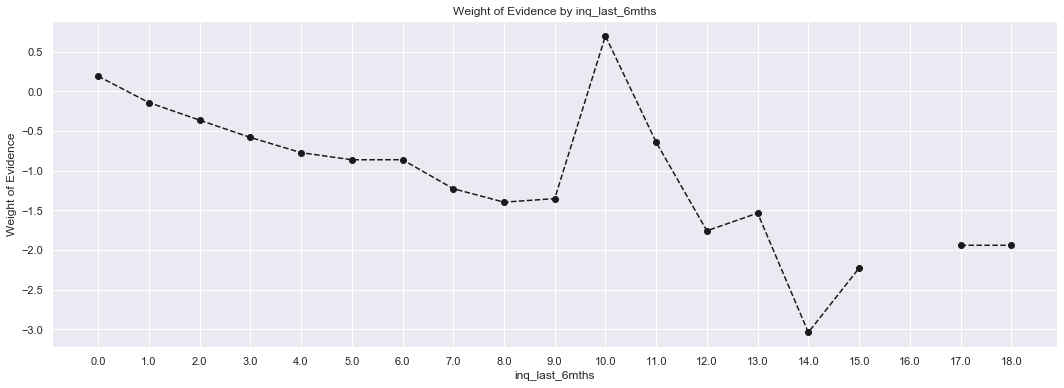

In [113]:
# We plot the weight of evidence values
plot_by_woe(df_temp13)

In [114]:
# We create the following Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [115]:
# open_acc variable
# We calculate weight of evidence.
df_temp14 = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp14

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


open_acc  n_obs  prop_good    prop_n_obs   n_good   n_bad   prop_n_good  \
0        0.0     67   0.895522  3.704658e-05     60.0     7.0  3.794454e-05   
1        1.0   1303   0.901765  7.204730e-04   1175.0   128.0  7.430807e-04   
2        2.0   8758   0.896095  4.842596e-03   7848.0   910.0  4.963146e-03   
3        3.0  26099   0.897927  1.443103e-02  23435.0  2664.0  1.482051e-02   
4        4.0  54293   0.891091  3.002045e-02  48380.0  5913.0  3.059595e-02   
..       ...    ...        ...           ...      ...     ...           ...   
82      88.0      1   1.000000  5.529340e-07      1.0     0.0  6.324091e-07   
83      91.0      1   1.000000  5.529340e-07      1.0     0.0  6.324091e-07   
84      93.0      1   1.000000  5.529340e-07      1.0     0.0  6.324091e-07   
85      97.0      1   1.000000  5.529340e-07      1.0     0.0  6.324091e-07   
86     101.0      1   1.000000  5.529340e-07      1.0     0.0  6.324091e-07   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000031  0.208639             NaN       NaN  inf  
1     0.000563  0.277197        0.006243  0.068559  inf  
2     0.004004  0.214774        0.005670  0.062424  inf  
3     0.011721  0.234606        0.001832  0.019832  inf  
4     0.026016  0.162137        0.006836  0.072469  inf  
..         ...       ...             ...       ...  ...  
82    0.000000       inf        0.000000       NaN  inf  
83    0.000000       inf        0.000000       NaN  inf  
84    0.000000       inf        0.000000       NaN  inf  
85    0.000000       inf        0.000000       NaN  inf  
86    0.000000       inf        0.000000       NaN  inf  

[87 rows x 12 columns]

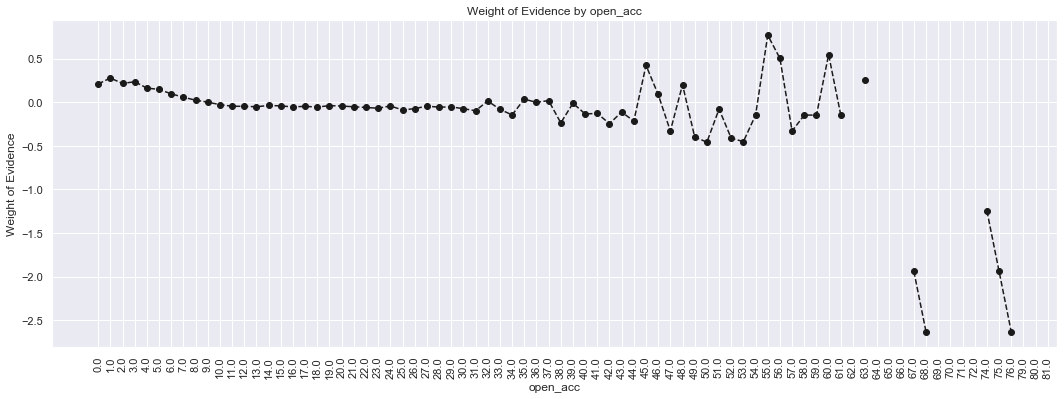

In [116]:
# We plot the weight of evidence values
plot_by_woe(df_temp14, 90)

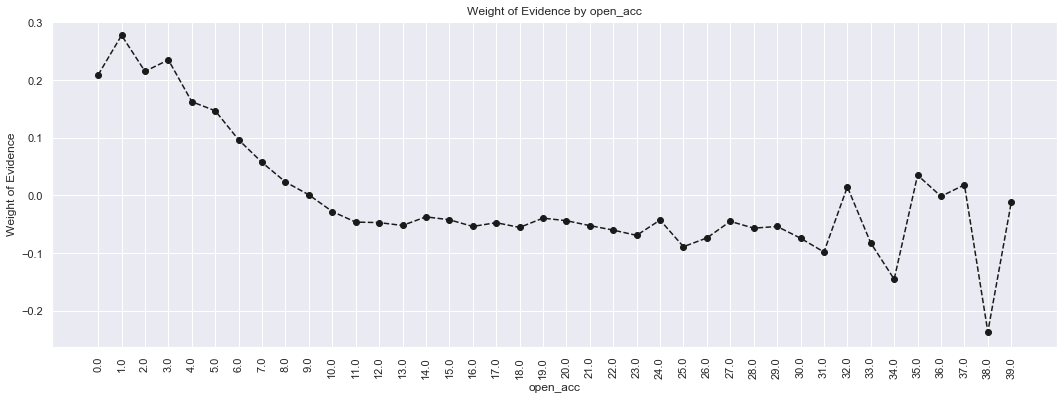

In [117]:
# We plot the weight of evidence values
plot_by_woe(df_temp14.iloc[ : 40, :], 90)


In [118]:
# We create the following Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [119]:
# pub_rec variable
# We calculate weight of evidence
df_temp15 = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp15

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


pub_rec    n_obs  prop_good    prop_n_obs     n_good     n_bad  \
0       0.0  1522737   0.879409  8.419731e-01  1339109.0  183628.0   
1       1.0   243927   0.850914  1.348755e-01   207561.0   36366.0   
2       2.0    27258   0.824162  1.507188e-02    22465.0    4793.0   
3       3.0     8404   0.827939  4.646858e-03     6958.0    1446.0   
4       4.0     3123   0.825488  1.726813e-03     2578.0     545.0   
5       5.0     1465   0.836860  8.100484e-04     1226.0     239.0   
6       6.0      753   0.826029  4.163593e-04      622.0     131.0   
7       7.0      346   0.858382  1.913152e-04      297.0      49.0   
8       8.0      179   0.860335  9.897519e-05      154.0      25.0   
9       9.0      111   0.873874  6.137568e-05       97.0      14.0   
10     10.0       64   0.875000  3.538778e-05       56.0       8.0   
11     11.0       48   0.854167  2.654083e-05       41.0       7.0   
12     12.0       32   0.687500  1.769389e-05       22.0      10.0   
13     13.0       21   0.904762  1.161161e-05       19.0       2.0   
14     14.0        8   0.875000  4.423472e-06        7.0       1.0   
15     15.0        5   0.600000  2.764670e-06        3.0       2.0   
16     16.0        8   0.750000  4.423472e-06        6.0       2.0   
17     17.0        2   0.500000  1.105868e-06        1.0       1.0   
18     18.0        3   0.666667  1.658802e-06        2.0       1.0   
19     19.0        6   0.500000  3.317604e-06        3.0       3.0   
20     20.0        3   1.000000  1.658802e-06        3.0       0.0   
21     21.0        4   1.000000  2.211736e-06        4.0       0.0   
22     22.0        3   0.666667  1.658802e-06        2.0       1.0   
23     24.0        3   1.000000  1.658802e-06        3.0       0.0   
24     25.0        1   0.000000  5.529340e-07        0.0       1.0   
25     26.0        1   1.000000  5.529340e-07        1.0       0.0   
26     28.0        4   1.000000  2.211736e-06        4.0       0.0   
27     31.0        1   1.000000  5.529340e-07        1.0       0.0   
28     34.0        1   1.000000  5.529340e-07        1.0       0.0   
29     40.0        1   0.000000  5.529340e-07        0.0       1.0   
30     44.0        1   1.000000  5.529340e-07        1.0       0.0   
31     45.0        1   0.000000  5.529340e-07        0.0       1.0   
32     46.0        1   1.000000  5.529340e-07        1.0       0.0   
33     47.0        1   1.000000  5.529340e-07        1.0       0.0   
34     49.0        2   1.000000  1.105868e-06        2.0       0.0   
35     52.0        1   1.000000  5.529340e-07        1.0       0.0   
36     54.0        1   1.000000  5.529340e-07        1.0       0.0   
37     61.0        2   0.500000  1.105868e-06        1.0       1.0   
38     63.0        1   1.000000  5.529340e-07        1.0       0.0   
39     86.0        1   0.000000  5.529340e-07        0.0       1.0   

     prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   8.468647e-01    0.807941  0.047052             NaN       NaN  inf  
1   1.312635e-01    0.160006 -0.198005        0.028495  0.245057  inf  
2   1.420707e-02    0.021089 -0.394994        0.026753  0.196989  inf  
3   4.400302e-03    0.006362 -0.368705        0.003777  0.026289  inf  
4   1.630351e-03    0.002398 -0.385812        0.002451  0.017108  inf  
5   7.753335e-04    0.001052 -0.304747        0.011372  0.081065  inf  
6   3.933584e-04    0.000576 -0.382053        0.010831  0.077306  inf  
7   1.878255e-04    0.000216 -0.137884        0.032352  0.244169  inf  
8   9.739100e-05    0.000110 -0.121719        0.001954  0.016165  inf  
9   6.134368e-05    0.000062 -0.004142        0.013539  0.117577  inf  
10  3.541491e-05    0.000035  0.006114        0.001126  0.010257  inf  
11  2.592877e-05    0.000031 -0.172134        0.020833  0.178248  inf  
12  1.391300e-05    0.000044 -1.151338        0.166667  0.979205  inf  
13  1.201577e-05    0.000009  0.311496        0.217262  1.462834  inf  
14  4.426863e-06    0.000004  0.006114        0.02976

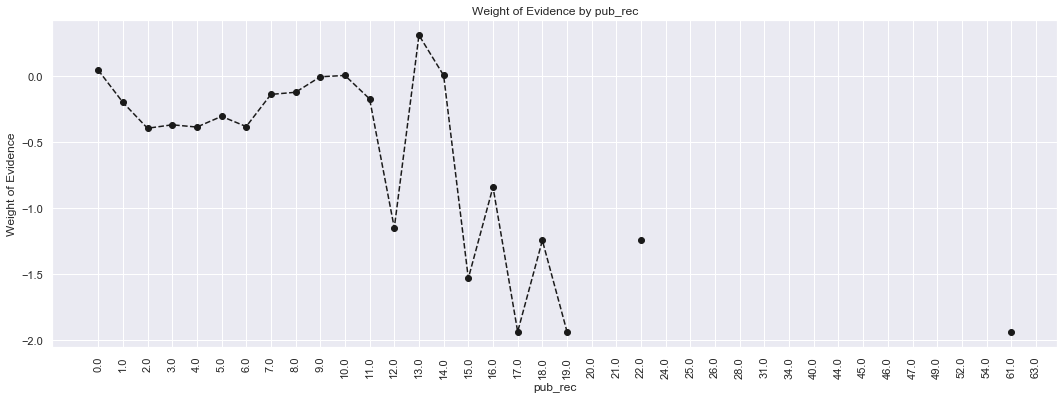

In [120]:
# We plot the weight of evidence values.
plot_by_woe(df_temp15, 90)

In [121]:
# We create the following Categories: '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [122]:
# total_acc variable
df_inputs_prepr['total_acc'].unique()

array([ 12.,  18.,  26.,  20.,  14.,  30.,   8.,  23.,  40.,  11.,   9.,
        21.,  17.,  25.,  28.,  33.,  24.,  13.,  16.,  78.,  64.,  38.,
        29.,  34.,  45.,  19.,  49.,  15.,  27.,  22.,  31.,  39.,  35.,
        44.,   6.,  36.,  57.,   7.,  61.,  10.,  42.,  47.,  51.,  37.,
        67.,   4.,  63.,   5.,  55.,  87.,  41.,  48.,  46.,  32.,  43.,
        52.,  50.,  58.,  65.,  54.,  56.,   2., 110.,  60.,  53.,  80.,
        77.,  72.,  59.,  71.,   3.,  62., 102.,  90.,  75.,  66.,  76.,
        93.,  95.,  74., 100.,  70.,  69.,  73.,  68.,  86.,  94.,  92.,
        82.,  83.,  81.,  85.,  79.,  88.,   0.,  84.,  96.,  89.,   1.,
       111.,  91., 112., 105.,  99., 113., 106., 101., 109., 103., 108.,
       118.,  97.,  98., 104., 140., 119., 115., 116., 136., 122., 137.,
       107., 133., 114., 117., 141., 127., 146., 129., 144., 151., 176.,
       123., 121., 124., 162., 120., 156., 135., 126., 128., 138., 153.,
       173., 148., 165., 150., 125., 160.])

In [123]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [124]:
# We calculate weight of evidence
df_temp16 = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp16

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor   n_obs  prop_good    prop_n_obs    n_good    n_bad  \
0     (-0.176, 3.52]    4507   0.906812  2.492074e-03    4087.0    420.0   
1       (3.52, 7.04]   65972   0.887604  3.647816e-02   58557.0   7415.0   
2      (7.04, 10.56]  111356   0.882108  6.157252e-02   98228.0  13128.0   
3     (10.56, 14.08]  215860   0.877740  1.193563e-01  189469.0  26391.0   
4      (14.08, 17.6]  190482   0.875500  1.053240e-01  166767.0  23715.0   
5      (17.6, 21.12]  261853   0.874949  1.447874e-01  229108.0  32745.0   
6     (21.12, 24.64]  185683   0.873812  1.026705e-01  162252.0  23431.0   
7     (24.64, 28.16]  214624   0.873476  1.186729e-01  187469.0  27155.0   
8     (28.16, 31.68]  131815   0.872405  7.288500e-02  114996.0  16819.0   
9      (31.68, 35.2]  136760   0.871410  7.561926e-02  119174.0  17586.0   
10     (35.2, 38.72]   76305   0.869838  4.219163e-02   66373.0   9932.0   
11    (38.72, 42.24]   74242   0.868780  4.105093e-02   64500.0   9742.0   
12    (42.24, 45.76]   39439   0.866249  2.180717e-02   34164.0   5275.0   
13    (45.76, 49.28]   36549   0.867876  2.020919e-02   31720.0   4829.0   
14     (49.28, 52.8]   18478   0.861349  1.021712e-02   15916.0   2562.0   
15     (52.8, 56.32]   16560   0.866787  9.156588e-03   14354.0   2206.0   
16    (56.32, 59.84]    8268   0.856313  4.571659e-03    7080.0   1188.0   
17    (59.84, 63.36]    8530   0.857210  4.716527e-03    7312.0   1218.0   
18    (63.36, 66.88]    3293   0.860006  1.820812e-03    2832.0    461.0   
19     (66.88, 70.4]    2889   0.867082  1.597426e-03    2505.0    384.0   
20     (70.4, 73.92]    1366   0.871157  7.553079e-04    1190.0    176.0   
21    (73.92, 77.44]    1284   0.862150  7.099673e-04    1107.0    177.0   
22    (77.44, 80.96]     629   0.853736  3.477955e-04     537.0     92.0   
23    (80.96, 84.48]     568   0.862676  3.140665e-04     490.0     78.0   
24     (84.48, 88.0]     401   0.895262  2.217265e-04     359.0     42.0   
25     (88.0, 91.52]     233   0.871245  1.288336e-04     203.0     30.0   
26    (91.52, 95.04]     214   0.850467  1.183279e-04     182.0     32.0   
27    (95.04, 98.56]      96   0.843750  5.308167e-05      81.0     15.0   
28   (98.56, 102.08]      84   0.857143  4.644646e-05      72.0     12.0   
29   (102.08, 105.6]      41   0.951220  2.267030e-05      39.0      2.0   
30   (105.6, 109.12]      43   0.860465  2.377616e-05      37.0      6.0   
31  (109.12, 112.64]      23   0.782609  1.271748e-05      18.0      5.0   
32  (112.64, 116.16]      25   0.880000  1.382335e-05      22.0      3.0   
33  (116.16, 119.68]      14   0.857143  7.741076e-06      12.0      2.0   
34   (119.68, 123.2]      11   1.000000  6.082274e-06      11.0      0.0   
35   (123.2, 126.72]       5   1.000000  2.764670e-06       5.0      0.0   
36  (126.72, 130.24]       4   1.000000  2.211736e-06       4.0      0.0   
37  (130.24, 133.76]       2   1.000000  1.105868e-06       2.0      0.0   
38  (133.76, 137.28]       5   0.800000  2.764670e-06       4.0      1.0   
39   (137.28, 140.8]       4   1.000000  2.211736e-06       4.0      0.0   
40   (140.8, 144.32]       3   0.666667  1.658802e-06       2.0      1.0   
41  (144.32, 147.84]       2   1.000000  1.105868e-06       2.0      0.0   
42  (147.84, 151.36]       5   0.800000  2.764670e-06       4.0      1.0   
43  (151.36, 154.88]       1   1.000000  5.529340e-07       1.0      0.0   
44   (154.88, 158.4]       1   1.000000  5.529340e-07       1.0      0.0   
45   (158.4, 161.92]       1   1.000000  5.529340e-07       1.0      0.0   
46  (161.92, 165.44]       2   1.000000  1.105868e-06       2.0      0.0   
47  (165.44, 168.96]       0        NaN  0.000000e+00       NaN      NaN   
48  (168.96, 172.48]       0        NaN  0.000000e+00       NaN      NaN   
49   (172.48, 176.0]       2   0.000000  1.105868e-06       0.0      2.0   

     prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   2.584656e-03    0.001848  0.335516             NaN 

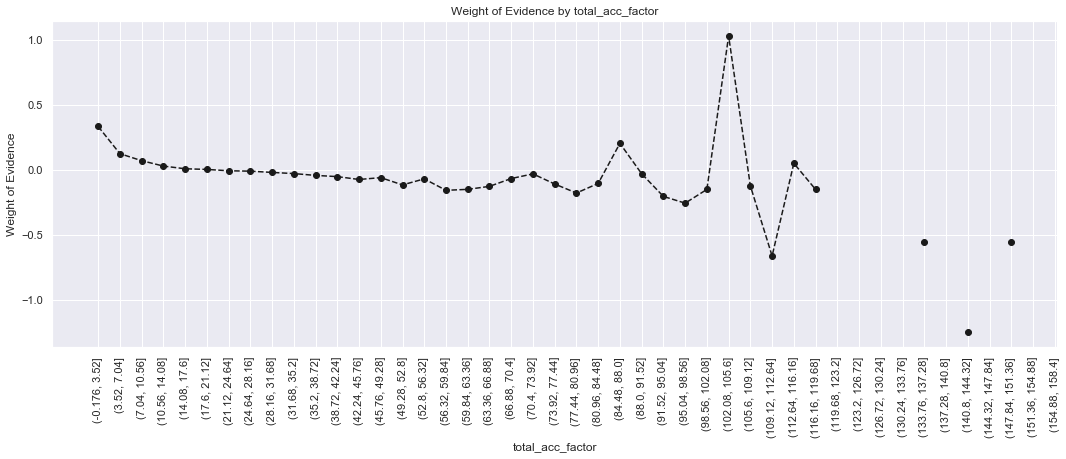

In [125]:
# We plot the weight of evidence values
plot_by_woe(df_temp16, 90)

In [126]:
# We create the following Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [127]:
# acc_now_delinq variable
# We calculate weight of evidence.
df_temp17 = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp17

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


acc_now_delinq    n_obs  prop_good    prop_n_obs     n_good     n_bad  \
0             0.0  1801431   0.874509  9.960725e-01  1575367.0  226064.0   
1             1.0     6712   0.829857  3.711293e-03     5570.0    1142.0   
2             2.0      336   0.827381  1.857858e-04      278.0      58.0   
3             3.0       40   0.725000  2.211736e-05       29.0      11.0   
4             4.0       10   0.800000  5.529340e-06        8.0       2.0   
5             5.0        3   0.666667  1.658802e-06        2.0       1.0   
6             6.0        1   0.000000  5.529340e-07        0.0       1.0   
7            14.0        1   1.000000  5.529340e-07        1.0       0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0  9.962764e-01    0.994654  0.001630             NaN       NaN  inf  
1  3.522519e-03    0.005025 -0.355182        0.044652  0.356811  inf  
2  1.758097e-04    0.000255 -0.372618        0.002476  0.017436  inf  
3  1.833986e-05    0.000048 -0.970395        0.102381  0.597778  inf  
4  5.059273e-06    0.000009 -0.553501        0.075000  0.416894  inf  
5  1.264818e-06    0.000004 -1.246649        0.133333  0.693147  inf  
6  0.000000e+00    0.000004      -inf        0.666667       inf  inf  
7  6.324091e-07    0.000000       inf        1.000000       inf  inf

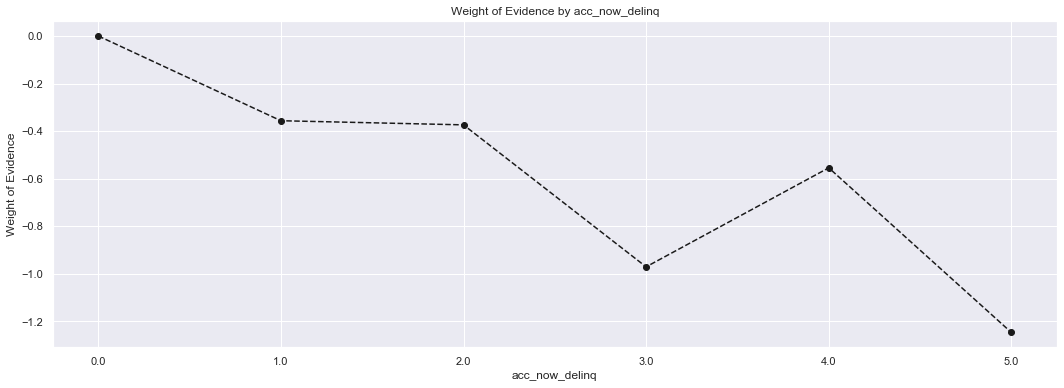

In [128]:
# We plot the weight of evidence values
plot_by_woe(df_temp17)

In [129]:
# We create the following Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [130]:
# total_rev_hi_lim variable
df_inputs_prepr['total_rev_hi_lim'].unique()

array([ 5800., 16200., 49300., ..., 12582., 38926., 26905.])

In [131]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

In [132]:
# We calculate weight of evidence.
df_temp18 = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp18

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_rev_hi_lim_factor   n_obs  prop_good  prop_n_obs    n_good  \
0            (-9999.999, 5000.0]   68506   0.849283    0.037879   58181.0   
1             (5000.0, 9999.999]  188739   0.851615    0.104360  160733.0   
2          (9999.999, 14999.998]  233171   0.853940    0.128928  199114.0   
3         (14999.998, 19999.998]  225149   0.856948    0.124493  192941.0   
4         (19999.998, 24999.997]  195168   0.862964    0.107915  168423.0   
...                          ...     ...        ...         ...       ...   
1995  (9974999.002, 9979999.002]       0        NaN    0.000000       NaN   
1996  (9979999.002, 9984999.002]       0        NaN    0.000000       NaN   
1997  (9984999.002, 9989999.001]       0        NaN    0.000000       NaN   
1998    (9989999.001, 9994999.0]       0        NaN    0.000000       NaN   
1999      (9994999.0, 9999999.0]       2   1.000000    0.000001       2.0   

        n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0     10325.0     0.036794    0.045429 -0.210805             NaN       NaN   
1     28006.0     0.101649    0.123223 -0.192470        0.002332  0.018335   
2     34057.0     0.125921    0.149847 -0.173954        0.002325  0.018516   
3     32208.0     0.122018    0.141711 -0.149626        0.003008  0.024328   
4     26745.0     0.106512    0.117675 -0.099665        0.006016  0.049962   
...       ...          ...         ...       ...             ...       ...   
1995      NaN          NaN         NaN       NaN             NaN       NaN   
1996      NaN          NaN         NaN       NaN             NaN       NaN   
1997      NaN          NaN         NaN       NaN             NaN       NaN   
1998      NaN          NaN         NaN       NaN             NaN       NaN   
1999      0.0     0.000001    0.000000       inf             NaN       NaN   

       IV  
0     inf  
1     inf  
2     inf  
3     inf  
4     inf  
...   ...  
1995  inf  
1996  inf  
1997  inf  
1998  inf  
1999  inf  

[2000 rows x 12 columns]

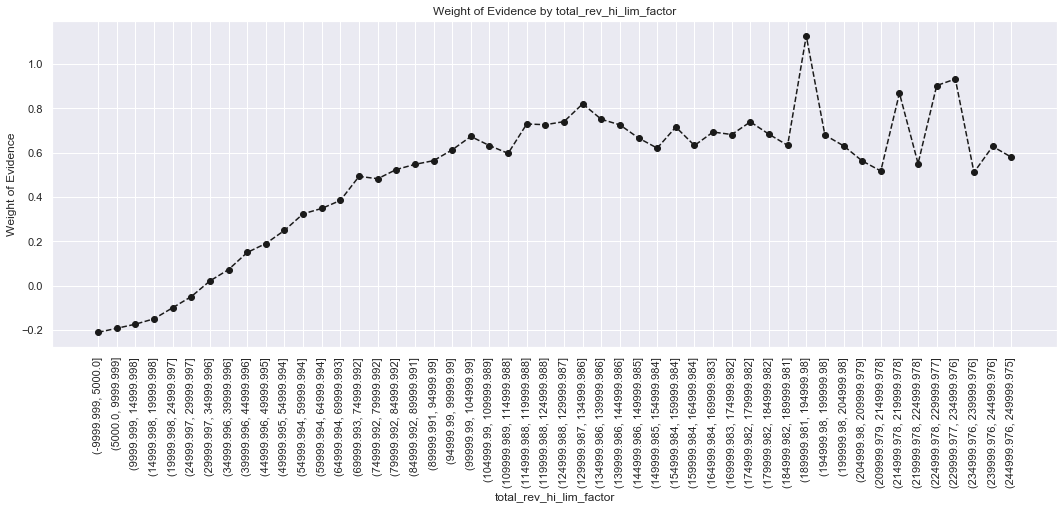

In [133]:
# We plot the weight of evidence values.
plot_by_woe(df_temp18.iloc[: 50, : ], 90)

In [134]:
# We create the following Categories:'<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [135]:
# installment variable
df_inputs_prepr['installment'].unique()

array([ 556.45,  230.41,  671.38, ..., 1211.55,  915.63,  834.52])

In [136]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

In [137]:
# We calculate weight of evidence.
df_temp19 = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp19

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


installment_factor   n_obs  prop_good    prop_n_obs    n_good    n_bad  \
0        (3.215, 39.228]    8514   0.920249  4.707680e-03    7835.0    679.0   
1       (39.228, 73.526]   29197   0.912388  1.614401e-02   26639.0   2558.0   
2      (73.526, 107.824]   48541   0.904823  2.683997e-02   43921.0   4620.0   
3     (107.824, 142.122]   56043   0.900130  3.098808e-02   50446.0   5597.0   
4      (142.122, 176.42]   96018   0.896394  5.309162e-02   86070.0   9948.0   
5      (176.42, 210.718]   94512   0.896553  5.225890e-02   84735.0   9777.0   
6     (210.718, 245.016]   95293   0.891923  5.269074e-02   84994.0  10299.0   
7     (245.016, 279.314]  123283   0.875798  6.816737e-02  107971.0  15312.0   
8     (279.314, 313.612]  116998   0.879083  6.469218e-02  102851.0  14147.0   
9      (313.612, 347.91]  142388   0.872721  7.873117e-02  124265.0  18123.0   
10     (347.91, 382.208]  104955   0.865018  5.803319e-02   90788.0  14167.0   
11    (382.208, 416.506]   88041   0.858748  4.868087e-02   75605.0  12436.0   
12    (416.506, 450.804]   61458   0.855251  3.398222e-02   52562.0   8896.0   
13    (450.804, 485.102]   86765   0.875353  4.797532e-02   75950.0  10815.0   
14      (485.102, 519.4]   81737   0.860577  4.519517e-02   70341.0  11396.0   
15      (519.4, 553.698]   62166   0.848261  3.437370e-02   52733.0   9433.0   
16    (553.698, 587.996]   54321   0.851660  3.003593e-02   46263.0   8058.0   
17    (587.996, 622.294]   50921   0.873647  2.815595e-02   44487.0   6434.0   
18    (622.294, 656.592]   52653   0.875088  2.911364e-02   46076.0   6577.0   
19     (656.592, 690.89]   49249   0.854271  2.723145e-02   42072.0   7177.0   
20     (690.89, 725.188]   31586   0.853384  1.746497e-02   26955.0   4631.0   
21    (725.188, 759.486]   30672   0.875293  1.695959e-02   26847.0   3825.0   
22    (759.486, 793.784]   36987   0.884203  2.045137e-02   32704.0   4283.0   
23    (793.784, 828.082]   26141   0.863433  1.445425e-02   22571.0   3570.0   
24     (828.082, 862.38]   25681   0.866944  1.419990e-02   22264.0   3417.0   
25     (862.38, 896.678]   22770   0.849627  1.259031e-02   19346.0   3424.0   
26    (896.678, 930.976]   17325   0.859452  9.579582e-03   14890.0   2435.0   
27    (930.976, 965.274]   15644   0.864868  8.650100e-03   13530.0   2114.0   
28    (965.274, 999.572]   14295   0.851836  7.904192e-03   12177.0   2118.0   
29    (999.572, 1033.87]    9474   0.845050  5.238497e-03    8006.0   1468.0   
30   (1033.87, 1068.168]    8764   0.851552  4.845914e-03    7463.0   1301.0   
31  (1068.168, 1102.466]   12163   0.896078  6.725337e-03   10899.0   1264.0   
32  (1102.466, 1136.764]    8212   0.891013  4.540694e-03    7317.0    895.0   
33  (1136.764, 1171.062]    8638   0.871614  4.776244e-03    7529.0   1109.0   
34   (1171.062, 1205.36]   10692   0.870277  5.911971e-03    9305.0   1387.0   
35   (1205.36, 1239.658]    8946   0.901297  4.946548e-03    8063.0    883.0   
36  (1239.658, 1273.956]    6857   0.858685  3.791469e-03    5888.0    969.0   
37  (1273.956, 1308.254]    5180   0.859846  2.864198e-03    4454.0    726.0   
38  (1308.254, 1342.552]    2246   0.856634  1.241890e-03    1924.0    322.0   
39   (1342.552, 1376.85]    1518   0.797760  8.393539e-04    1211.0    307.0   
40   (1376.85, 1411.148]     813   0.793358  4.495354e-04     645.0    168.0   
41  (1411.148, 1445.446]     280   0.764286  1.548215e-04     214.0     66.0   
42  (1445.446, 1479.744]     230   0.804348  1.271748e-04     185.0     45.0   
43  (1479.744, 1514.042]     240   0.666667  1.327042e-04     160.0     80.0   
44   (1514.042, 1548.34]      52   0.826923  2.875257e-05      43.0      9.0   
45   (1548.34, 1582.638]      28   0.678571  1.548215e-05      19.0      9.0   
46  (1582.638, 1616.936]      25   0.880000  1.382335e-05      22.0      3.0   
47  (1616.936, 1651.234]       9   1.000000  4.976406e-06       9.0      0.0   
48  (1651.234, 1685.532]       1   1.000000  5.529340e-07       1.0      0.0   
49   (

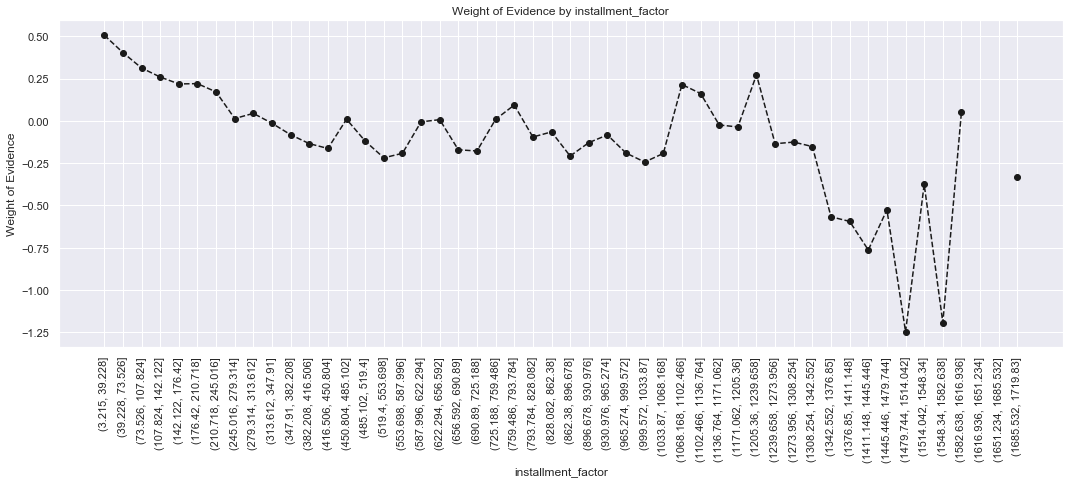

In [138]:
# We plot the weight of evidence values.
plot_by_woe(df_temp19, 90)

In [139]:
# annual_inc variable
df_inputs_prepr['annual_inc'].unique()

array([ 16000.,  26000., 120000., ...,  77582., 104919., 180360.])

In [140]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp20

annual_inc_factor    n_obs  prop_good    prop_n_obs     n_good  \
0       (-110000.0, 2200000.0]  1808379   0.874327  9.999143e-01  1581115.0   
1       (2200000.0, 4400000.0]       61   0.901639  3.372898e-05       55.0   
2       (4400000.0, 6600000.0]       49   0.897959  2.709377e-05       44.0   
3       (6600000.0, 8800000.0]       31   0.967742  1.714096e-05       30.0   
4      (8800000.0, 11000000.0]       12   0.750000  6.635208e-06        9.0   
5     (11000000.0, 13200000.0]        0        NaN  0.000000e+00        NaN   
6     (13200000.0, 15400000.0]        0        NaN  0.000000e+00        NaN   
7     (15400000.0, 17600000.0]        0        NaN  0.000000e+00        NaN   
8     (17600000.0, 19800000.0]        0        NaN  0.000000e+00        NaN   
9     (19800000.0, 22000000.0]        0        NaN  0.000000e+00        NaN   
10    (22000000.0, 24200000.0]        0        NaN  0.000000e+00        NaN   
11    (24200000.0, 26400000.0]        0        NaN  0.000000e+00        NaN   
12    (26400000.0, 28600000.0]        0        NaN  0.000000e+00        NaN   
13    (28600000.0, 30800000.0]        0        NaN  0.000000e+00        NaN   
14    (30800000.0, 33000000.0]        0        NaN  0.000000e+00        NaN   
15    (33000000.0, 35200000.0]        0        NaN  0.000000e+00        NaN   
16    (35200000.0, 37400000.0]        0        NaN  0.000000e+00        NaN   
17    (37400000.0, 39600000.0]        0        NaN  0.000000e+00        NaN   
18    (39600000.0, 41800000.0]        0        NaN  0.000000e+00        NaN   
19    (41800000.0, 44000000.0]        0        NaN  0.000000e+00        NaN   
20    (44000000.0, 46200000.0]        0        NaN  0.000000e+00        NaN   
21    (46200000.0, 48400000.0]        0        NaN  0.000000e+00        NaN   
22    (48400000.0, 50600000.0]        0        NaN  0.000000e+00        NaN   
23    (50600000.0, 52800000.0]        0        NaN  0.000000e+00        NaN   
24    (52800000.0, 55000000.0]        0        NaN  0.000000e+00        NaN   
25    (55000000.0, 57200000.0]        0        NaN  0.000000e+00        NaN   
26    (57200000.0, 59400000.0]        0        NaN  0.000000e+00        NaN   
27    (59400000.0, 61600000.0]        1   1.000000  5.529340e-07        1.0   
28    (61600000.0, 63800000.0]        0        NaN  0.000000e+00        NaN   
29    (63800000.0, 66000000.0]        0        NaN  0.000000e+00        NaN   
30    (66000000.0, 68200000.0]        0        NaN  0.000000e+00        NaN   
31    (68200000.0, 70400000.0]        0        NaN  0.000000e+00        NaN   
32    (70400000.0, 72600000.0]        0        NaN  0.000000e+00        NaN   
33    (72600000.0, 74800000.0]        0        NaN  0.000000e+00        NaN   
34    (74800000.0, 77000000.0]        0        NaN  0.000000e+00        NaN   
35    (77000000.0, 79200000.0]        0        NaN  0.000000e+00        NaN   
36    (79200000.0, 81400000.0]        0        NaN  0.000000e+00        NaN   
37    (81400000.0, 83600000.0]        0        NaN  0.000000e+00        NaN   
38    (83600000.0, 85800000.0]        0        NaN  0.000000e+00        NaN   
39    (85800000.0, 88000000.0]        0        NaN  0.000000e+00        NaN   
40    (88000000.0, 90200000.0]        0        NaN  0.000000e+00        NaN   
41    (90200000.0, 92400000.0]        0        NaN  0.000000e+00        NaN   
42    (92400000.0, 94600000.0]        0        NaN  0.000000e+00        NaN   
43    (94600000.0, 96800000.0]        0        NaN  0.000000e+00        NaN   
44    (96800000.0, 99000000.0]        0        NaN  0.000000e+00        NaN   
45   (99000000.0, 101200000.0]        0        NaN  0.000000e+00        NaN   
46  (101200000.0, 103400000.0]        0        NaN  0.000000e+00        NaN   
47  (103400000.0, 105600000.0]        0        NaN  0.000000e+00        NaN   
48  (105600000.0, 107800000.0]        0        NaN  0.000000e+00        NaN   
49  (107800000.0, 110000000.0]        1   1.000000  5.529340e-0

In [141]:
# Splitting the initial ‘annual income’ variable into 50 categories doesn't work well for fine classing because there are a lot of people with low income and very few people with high income.
# Thus, we do fine-classing using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp20

annual_inc_factor    n_obs  prop_good    prop_n_obs     n_good  \
0       (-110000.0, 1100000.0]  1808139   0.874318  9.997816e-01  1580888.0   
1       (1100000.0, 2200000.0]      240   0.945833  1.327042e-04      227.0   
2       (2200000.0, 3300000.0]       31   0.903226  1.714096e-05       28.0   
3       (3300000.0, 4400000.0]       30   0.900000  1.658802e-05       27.0   
4       (4400000.0, 5500000.0]       22   0.909091  1.216455e-05       20.0   
..                         ...      ...        ...           ...        ...   
95  (104500000.0, 105600000.0]        0        NaN  0.000000e+00        NaN   
96  (105600000.0, 106700000.0]        0        NaN  0.000000e+00        NaN   
97  (106700000.0, 107800000.0]        0        NaN  0.000000e+00        NaN   
98  (107800000.0, 108900000.0]        0        NaN  0.000000e+00        NaN   
99  (108900000.0, 110000000.0]        1   1.000000  5.529340e-07        1.0   

       n_bad   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0   227251.0  9.997679e-01    0.999877 -0.000109             NaN       NaN   
1       13.0  1.435569e-04    0.000057  0.920205        0.071516  0.920314   
2        3.0  1.770745e-05    0.000013  0.293796        0.042608  0.626408   
3        3.0  1.707504e-05    0.000013  0.257429        0.003226  0.036368   
4        2.0  1.264818e-05    0.000009  0.362789        0.009091  0.105361   
..       ...           ...         ...       ...             ...       ...   
95       NaN           NaN         NaN       NaN             NaN       NaN   
96       NaN           NaN         NaN       NaN             NaN       NaN   
97       NaN           NaN         NaN       NaN             NaN       NaN   
98       NaN           NaN         NaN       NaN             NaN       NaN   
99       0.0  6.324091e-07    0.000000       inf             NaN       NaN   

     IV  
0   inf  
1   inf  
2   inf  
3   inf  
4   inf  
..  ...  
95  inf  
96  inf  
97  inf  
98  inf  
99  inf  

[100 rows x 12 columns]

In [142]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [143]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp20

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


annual_inc_factor   n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0       (-140.0, 2800.0]    1662   0.947653    0.000996   1575.0     87.0   
1       (2800.0, 5600.0]     426   0.941315    0.000255    401.0     25.0   
2       (5600.0, 8400.0]     726   0.899449    0.000435    653.0     73.0   
3      (8400.0, 11200.0]    2923   0.864523    0.001752   2527.0    396.0   
4     (11200.0, 14000.0]    5134   0.857421    0.003078   4402.0    732.0   
5     (14000.0, 16800.0]    7455   0.856606    0.004469   6386.0   1069.0   
6     (16800.0, 19600.0]    8874   0.847532    0.005320   7521.0   1353.0   
7     (19600.0, 22400.0]   17694   0.850458    0.010608  15048.0   2646.0   
8     (22400.0, 25200.0]   29221   0.849834    0.017518  24833.0   4388.0   
9     (25200.0, 28000.0]   24572   0.843684    0.014731  20731.0   3841.0   
10    (28000.0, 30800.0]   40011   0.844418    0.023987  33786.0   6225.0   
11    (30800.0, 33600.0]   36476   0.848997    0.021868  30968.0   5508.0   
12    (33600.0, 36400.0]   61592   0.848698    0.036925  52273.0   9319.0   
13    (36400.0, 39200.0]   40779   0.852105    0.024447  34748.0   6031.0   
14    (39200.0, 42000.0]   88790   0.855186    0.053230  75932.0  12858.0   
15    (42000.0, 44800.0]   31013   0.852675    0.018593  26444.0   4569.0   
16    (44800.0, 47600.0]   74573   0.858072    0.044707  63989.0  10584.0   
17    (47600.0, 50400.0]  101957   0.860019    0.061124  87685.0  14272.0   
18    (50400.0, 53200.0]   52393   0.863341    0.031410  45233.0   7160.0   
19    (53200.0, 56000.0]   76876   0.862597    0.046088  66313.0  10563.0   
20    (56000.0, 58800.0]   33002   0.870584    0.019785  28731.0   4271.0   
21    (58800.0, 61600.0]   88750   0.865082    0.053206  76776.0  11974.0   
22    (61600.0, 64400.0]   41857   0.871539    0.025094  36480.0   5377.0   
23    (64400.0, 67200.0]   74889   0.871063    0.044896  65233.0   9656.0   
24    (67200.0, 70000.0]   76338   0.872632    0.045765  66615.0   9723.0   
25    (70000.0, 72800.0]   32480   0.876108    0.019472  28456.0   4024.0   
26    (72800.0, 75600.0]   65908   0.878027    0.039512  57869.0   8039.0   
27    (75600.0, 78400.0]   28412   0.879734    0.017033  24995.0   3417.0   
28    (78400.0, 81200.0]   61983   0.879144    0.037159  54492.0   7491.0   
29    (81200.0, 84000.0]   28291   0.883744    0.016961  25002.0   3289.0   
30    (84000.0, 86800.0]   44127   0.880481    0.026454  38853.0   5274.0   
31    (86800.0, 89600.0]   21222   0.887805    0.012723  18841.0   2381.0   
32    (89600.0, 92400.0]   51435   0.890503    0.030836  45803.0   5632.0   
33    (92400.0, 95200.0]   32942   0.888410    0.019749  29266.0   3676.0   
34    (95200.0, 98000.0]   22731   0.886059    0.013627  20141.0   2590.0   
35   (98000.0, 100800.0]   44695   0.890256    0.026795  39790.0   4905.0   
36  (100800.0, 103600.0]   14945   0.894881    0.008960  13374.0   1571.0   
37  (103600.0, 106400.0]   23363   0.897744    0.014006  20974.0   2389.0   
38  (106400.0, 109200.0]   11714   0.898412    0.007023  10524.0   1190.0   
39  (109200.0, 112000.0]   30681   0.896092    0.018393  27493.0   3188.0   
40  (112000.0, 114800.0]    5753   0.911177    0.003449   5242.0    511.0   
41  (114800.0, 117600.0]   16567   0.904207    0.009932  14980.0   1587.0   
42  (117600.0, 120400.0]   34985   0.894126    0.020974  31281.0   3704.0   
43  (120400.0, 123200.0]    5397   0.905318    0.003236   4886.0    511.0   
44  (123200.0, 126000.0]   20344   0.896628    0.012196  18241.0   2103.0   
45  (126000.0, 128800.0]    4324   0.911887    0.002592   3943.0    381.0   
46  (128800.0, 131600.0]   17564   0.903894    0.010530  15876.0   1688.0   
47  (131600.0, 134400.0]    4443   0.910871    0.002664   4047.0    396.0   
48  (134400.0, 137200.0]   10805   0.910042    0.006478   9833.0    972.0   
49  (137200.0, 140000.0]   14944   0.906986    0.008959  13554.0   1390.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0  

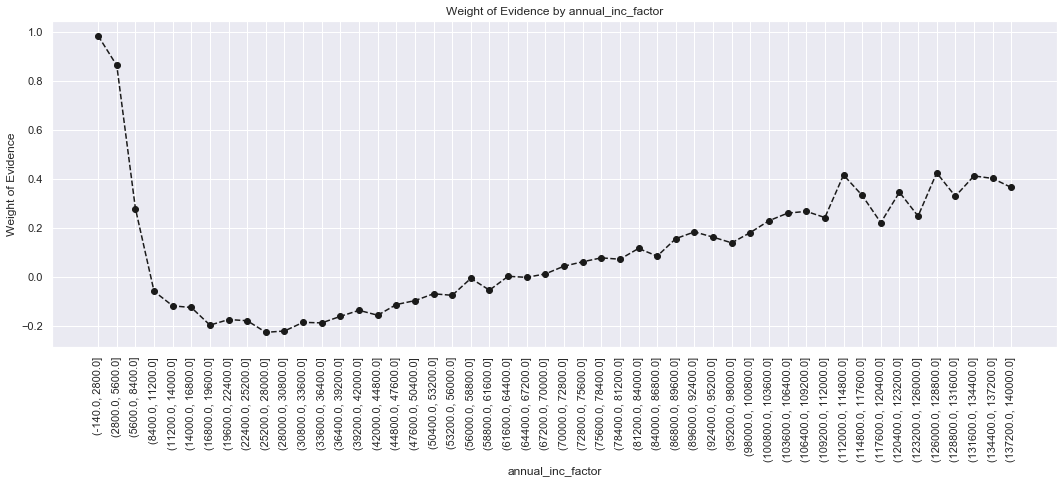

In [144]:
# We plot the weight of evidence values.
plot_by_woe(df_temp20, 90)

In [145]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [146]:
# mths_since_last_delinq variable
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


# We calculate weight of evidence.
df_temp21 = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp21

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                  (-0.195, 3.9]  26204   0.847619    0.029734  22211.0   
1                     (3.9, 7.8]  58907   0.856027    0.066842  50426.0   
2                    (7.8, 11.7]  62507   0.860032    0.070927  53758.0   
3                   (11.7, 15.6]  64902   0.858957    0.073644  55748.0   
4                   (15.6, 19.5]  60274   0.865697    0.068393  52179.0   
5                   (19.5, 23.4]  58195   0.869628    0.066034  50608.0   
6                   (23.4, 27.3]  57506   0.868083    0.065252  49920.0   
7                   (27.3, 31.2]  54412   0.866868    0.061741  47168.0   
8                   (31.2, 35.1]  51456   0.872707    0.058387  44906.0   
9                   (35.1, 39.0]  49172   0.871167    0.055796  42837.0   
10                  (39.0, 42.9]  35384   0.874237    0.040150  30934.0   
11                  (42.9, 46.8]  45946   0.873286    0.052135  40124.0   
12                  (46.8, 50.7]  38875   0.872823    0.044112  33931.0   
13                  (50.7, 54.6]  30583   0.867410    0.034703  26528.0   
14                  (54.6, 58.5]  30312   0.872592    0.034395  26450.0   
15                  (58.5, 62.4]  29639   0.868923    0.033631  25754.0   
16                  (62.4, 66.3]  28908   0.868825    0.032802  25116.0   
17                  (66.3, 70.2]  28540   0.871128    0.032384  24862.0   
18                  (70.2, 74.1]  26429   0.871543    0.029989  23034.0   
19                  (74.1, 78.0]  23629   0.874561    0.026812  20665.0   
20                  (78.0, 81.9]  15025   0.873278    0.017049  13121.0   
21                  (81.9, 85.8]   2548   0.864207    0.002891   2202.0   
22                  (85.8, 89.7]    427   0.857143    0.000485    366.0   
23                  (89.7, 93.6]    328   0.875000    0.000372    287.0   
24                  (93.6, 97.5]    247   0.878543    0.000280    217.0   
25                 (97.5, 101.4]    216   0.912037    0.000245    197.0   
26                (101.4, 105.3]    172   0.936047    0.000195    161.0   
27                (105.3, 109.2]    125   0.928000    0.000142    116.0   
28                (109.2, 113.1]    117   0.897436    0.000133    105.0   
29                (113.1, 117.0]     73   0.890411    0.000083     65.0   
30                (117.0, 120.9]     45   0.911111    0.000051     41.0   
31                (120.9, 124.8]     38   0.868421    0.000043     33.0   
32                (124.8, 128.7]     21   0.857143    0.000024     18.0   
33                (128.7, 132.6]     28   0.928571    0.000032     26.0   
34                (132.6, 136.5]     31   0.870968    0.000035     27.0   
35                (136.5, 140.4]      7   1.000000    0.000008      7.0   
36                (140.4, 144.3]      7   1.000000    0.000008      7.0   
37                (144.3, 148.2]     14   1.000000    0.000016     14.0   
38                (148.2, 152.1]     10   0.800000    0.000011      8.0   
39                (152.1, 156.0]      4   1.000000    0.000005      4.0   
40                (156.0, 159.9]      5   0.600000    0.000006      3.0   
41                (159.9, 163.8]      8   1.000000    0.000009      8.0   
42                (163.8, 167.7]      0        NaN    0.000000      NaN   
43                (167.7, 171.6]      5   0.600000    0.000006      3.0   
44                (171.6, 175.5]      0        NaN    0.000000      NaN   
45                (175.5, 179.4]      3   1.000000    0.000003      3.0   
46                (179.4, 183.3]      1   0.000000    0.000001      0.0   
47                (183.3, 187.2]      0        NaN    0.000000      NaN   
48                (187.2, 191.1]      1   1.000000    0.000001      1.0   
49                (191.1, 195.0]      2   1.000000    0.000002      2.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   3993.0     0.029064    0.034103 -0.159869             NaN       NaN  inf  
1   8481.0     0.06

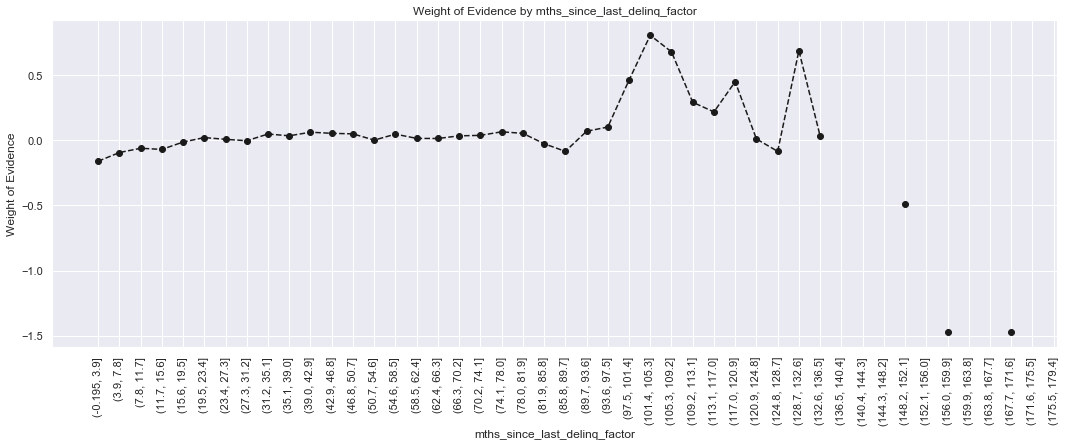

In [147]:
# We plot the weight of evidence values.
plot_by_woe(df_temp21, 90)

In [148]:
# We create the following Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [149]:
# dti variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

# We calculate weight of evidence.
df_temp22 = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp22

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


dti_factor   n_obs  prop_good    prop_n_obs    n_good    n_bad  \
0      (-2.0, 9.0]  268406   0.904372  1.485226e-01  242739.0  25667.0   
1      (9.0, 19.0]  723619   0.887561  4.004149e-01  642256.0  81363.0   
2     (19.0, 29.0]  580640   0.857891  3.212974e-01  498126.0  82514.0   
3     (29.0, 39.0]  206556   0.831895  1.142979e-01  171833.0  34723.0   
4     (39.0, 49.0]   16249   0.870330  8.991392e-03   14142.0   2107.0   
..             ...     ...        ...           ...       ...      ...   
95  (949.0, 959.0]       0        NaN  0.000000e+00       NaN      NaN   
96  (959.0, 969.0]       1   1.000000  5.533505e-07       1.0      0.0   
97  (969.0, 979.0]       1   1.000000  5.533505e-07       1.0      0.0   
98  (979.0, 989.0]       0        NaN  0.000000e+00       NaN      NaN   
99  (989.0, 999.0]     107   0.943925  5.920850e-05     101.0      6.0   

     prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   1.536362e-01    0.112964  0.307514             NaN       NaN  inf  
1   4.065014e-01    0.358091  0.126799        0.016811  0.180714  inf  
2   3.152776e-01    0.363157 -0.141382        0.029670  0.268181  inf  
3   1.087578e-01    0.152821 -0.340146        0.025996  0.198764  inf  
4   8.950860e-03    0.009273 -0.035383        0.038435  0.304763  inf  
..           ...         ...       ...             ...       ...  ...  
95           NaN         NaN       NaN             NaN       NaN  inf  
96  6.329274e-07    0.000000       inf             NaN       NaN  inf  
97  6.329274e-07    0.000000       inf        0.000000       NaN  inf  
98           NaN         NaN       NaN             NaN       NaN  inf  
99  6.392567e-05    0.000026  0.884094             NaN       NaN  inf  

[100 rows x 12 columns]

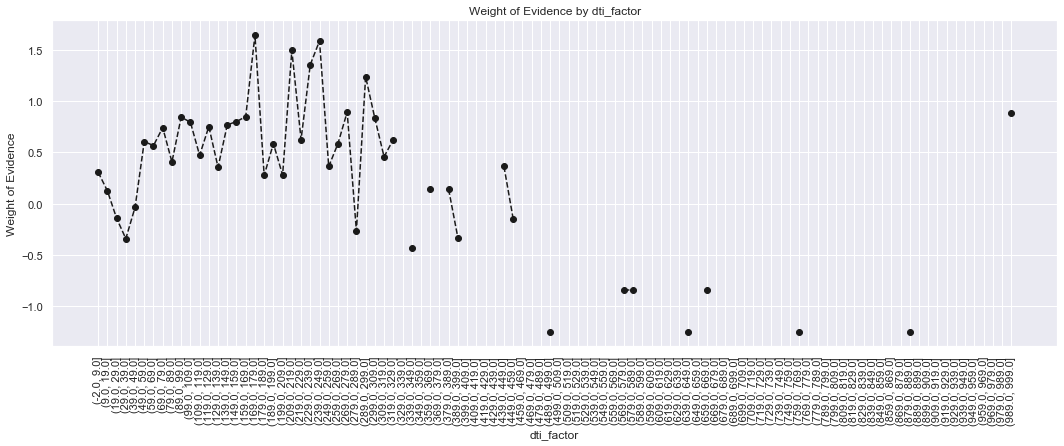

In [150]:
# We plot the weight of evidence values.
plot_by_woe(df_temp22, 90)

In [151]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [152]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


# We calculate weight of evidence.
df_temp22 = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp22

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dti_factor  n_obs  prop_good    prop_n_obs   n_good   n_bad  \
0   (-1.036, -0.28]      1   1.000000  5.743340e-07      1.0     0.0   
1     (-0.28, 0.44]   3455   0.893488  1.984324e-03   3087.0   368.0   
2      (0.44, 1.16]   7483   0.900441  4.297742e-03   6738.0   745.0   
3      (1.16, 1.88]   9522   0.897816  5.468809e-03   8549.0   973.0   
4       (1.88, 2.6]  11613   0.905020  6.669741e-03  10510.0  1103.0   
5       (2.6, 3.32]  14970   0.910154  8.597781e-03  13625.0  1345.0   
6      (3.32, 4.04]  17627   0.906507  1.012379e-02  15979.0  1648.0   
7      (4.04, 4.76]  20364   0.907042  1.169574e-02  18471.0  1893.0   
8      (4.76, 5.48]  23126   0.904091  1.328205e-02  20908.0  2218.0   
9       (5.48, 6.2]  26553   0.903212  1.525029e-02  23983.0  2570.0   
10      (6.2, 6.92]  30174   0.906907  1.732996e-02  27365.0  2809.0   
11     (6.92, 7.64]  32951   0.905891  1.892488e-02  29850.0  3101.0   
12     (7.64, 8.36]  36078   0.903099  2.072082e-02  32582.0  3496.0   
13     (8.36, 9.08]  38989   0.900433  2.239271e-02  35107.0  3882.0   
14      (9.08, 9.8]  41534   0.901310  2.385439e-02  37435.0  4099.0   
15     (9.8, 10.52]  45096   0.898483  2.590017e-02  40518.0  4578.0   
16   (10.52, 11.24]  47948   0.894844  2.753817e-02  42906.0  5042.0   
17   (11.24, 11.96]  49138   0.895804  2.822163e-02  44018.0  5120.0   
18   (11.96, 12.68]  52682   0.893797  3.025707e-02  47087.0  5595.0   
19    (12.68, 13.4]  52371   0.890340  3.007845e-02  46628.0  5743.0   
20    (13.4, 14.12]  55234   0.888818  3.172277e-02  49093.0  6141.0   
21   (14.12, 14.84]  55665   0.888098  3.197030e-02  49436.0  6229.0   
22   (14.84, 15.56]  55246   0.884607  3.172966e-02  48871.0  6375.0   
23   (15.56, 16.28]  56515   0.881837  3.245849e-02  49837.0  6678.0   
24    (16.28, 17.0]  55700   0.881724  3.199041e-02  49112.0  6588.0   
25    (17.0, 17.72]  55606   0.877747  3.193642e-02  48808.0  6798.0   
26   (17.72, 18.44]  53519   0.877632  3.073778e-02  46970.0  6549.0   
27   (18.44, 19.16]  54847   0.875162  3.150050e-02  48000.0  6847.0   
28   (19.16, 19.88]  52751   0.870751  3.029670e-02  45933.0  6818.0   
29    (19.88, 20.6]  50441   0.869332  2.896998e-02  43850.0  6591.0   
30    (20.6, 21.32]  50291   0.866119  2.888383e-02  43558.0  6733.0   
31   (21.32, 22.04]  48225   0.863079  2.769726e-02  41622.0  6603.0   
32   (22.04, 22.76]  45564   0.860460  2.616896e-02  39206.0  6358.0   
33   (22.76, 23.48]  45367   0.859281  2.605581e-02  38983.0  6384.0   
34    (23.48, 24.2]  42647   0.858114  2.449362e-02  36596.0  6051.0   
35    (24.2, 24.92]  40366   0.852995  2.318357e-02  34432.0  5934.0   
36   (24.92, 25.64]  38936   0.853606  2.236227e-02  33236.0  5700.0   
37   (25.64, 26.36]  36388   0.850555  2.089887e-02  30950.0  5438.0   
38   (26.36, 27.08]  34487   0.846261  1.980706e-02  29185.0  5302.0   
39    (27.08, 27.8]  32212   0.843723  1.850045e-02  27178.0  5034.0   
40    (27.8, 28.52]  31455   0.842251  1.806568e-02  26493.0  4962.0   
41   (28.52, 29.24]  29134   0.842040  1.673265e-02  24532.0  4602.0   
42   (29.24, 29.96]  27210   0.838221  1.562763e-02  22808.0  4402.0   
43   (29.96, 30.68]  22958   0.836266  1.318556e-02  19199.0  3759.0   
44    (30.68, 31.4]  21133   0.828136  1.213740e-02  17501.0  3632.0   
45    (31.4, 32.12]  20170   0.832276  1.158432e-02  16787.0  3383.0   
46   (32.12, 32.84]  18257   0.828121  1.048562e-02  15119.0  3138.0   
47   (32.84, 33.56]  17592   0.826057  1.010368e-02  14532.0  3060.0   
48   (33.56, 34.28]  16490   0.828745  9.470768e-03  13666.0  2824.0   
49    (34.28, 35.0]  15066   0.815678  8.652917e-03  12289.0  2777.0   

     prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   6.565432e-07    0.000000       inf             NaN       NaN  inf  
1   2.026749e-03    0.001688  0.182928        0.106512       inf  inf  
2   4.423788e-03    0.003417  0.258190        0.006953  0.075262  inf  
3   5.612788e-03    0.004463  0.229241        0.

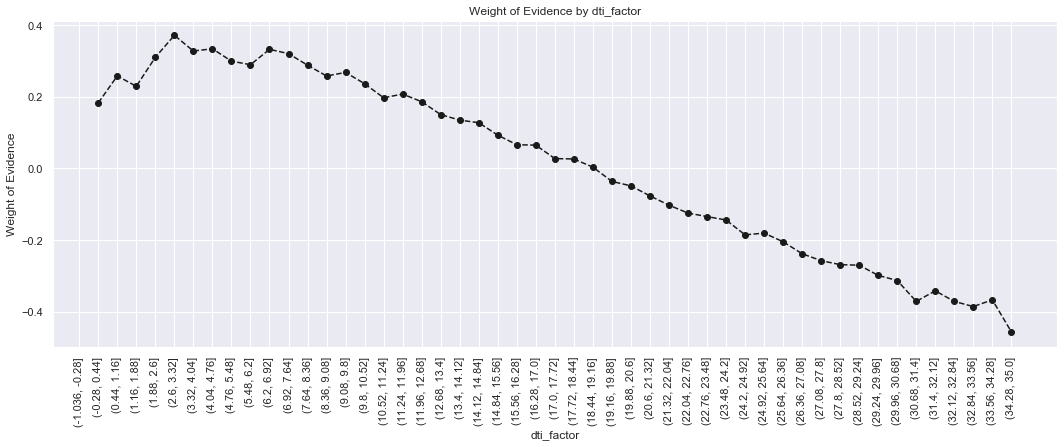

In [153]:
# We plot the weight of evidence values.
plot_by_woe(df_temp22, 90)


In [154]:
# We create the following Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [155]:
# mths_since_last_record variable
# We have to create one category for missing values and do fine and coarse classing for the rest.
#sum(loan_data_temp['mths_since_last_record'].isnull())

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# We calculate weight of evidence.
df_temp23 = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp23

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.129, 2.58]   1315   0.758935    0.004585    998.0   
1                   (2.58, 5.16]    902   0.828160    0.003145    747.0   
2                   (5.16, 7.74]    844   0.835308    0.002943    705.0   
3                  (7.74, 10.32]   1576   0.829315    0.005495   1307.0   
4                  (10.32, 12.9]   1201   0.820150    0.004187    985.0   
5                  (12.9, 15.48]   1879   0.840873    0.006551   1580.0   
6                 (15.48, 18.06]   1994   0.847041    0.006952   1689.0   
7                 (18.06, 20.64]   1525   0.849180    0.005317   1295.0   
8                 (20.64, 23.22]   2440   0.834426    0.008507   2036.0   
9                  (23.22, 25.8]   1886   0.827678    0.006576   1561.0   
10                 (25.8, 28.38]   3095   0.833603    0.010791   2580.0   
11                (28.38, 30.96]   2382   0.835013    0.008305   1989.0   
12                (30.96, 33.54]   4043   0.834281    0.014096   3373.0   
13                (33.54, 36.12]   4491   0.840570    0.015658   3775.0   
14                 (36.12, 38.7]   3448   0.837007    0.012021   2886.0   
15                 (38.7, 41.28]   5481   0.836344    0.019109   4584.0   
16                (41.28, 43.86]   4082   0.838070    0.014232   3421.0   
17                (43.86, 46.44]   6655   0.844027    0.023203   5617.0   
18                (46.44, 49.02]   7354   0.846342    0.025640   6224.0   
19                 (49.02, 51.6]   5289   0.843260    0.018440   4460.0   
20                 (51.6, 54.18]   8883   0.846899    0.030971   7523.0   
21                (54.18, 56.76]   6408   0.844725    0.022341   5413.0   
22                (56.76, 59.34]   9952   0.839530    0.034698   8355.0   
23                (59.34, 61.92]   7105   0.836031    0.024772   5940.0   
24                 (61.92, 64.5]  11075   0.845959    0.038613   9369.0   
25                 (64.5, 67.08]  11657   0.843184    0.040642   9829.0   
26                (67.08, 69.66]   7930   0.837957    0.027648   6645.0   
27                (69.66, 72.24]  12319   0.839841    0.042950  10346.0   
28                (72.24, 74.82]   8073   0.842809    0.028146   6804.0   
29                 (74.82, 77.4]  12716   0.846729    0.044334  10767.0   
30                 (77.4, 79.98]   8580   0.840793    0.029914   7214.0   
31                (79.98, 82.56]  12836   0.840059    0.044753  10783.0   
32                (82.56, 85.14]  11522   0.849419    0.040171   9787.0   
33                (85.14, 87.72]   7369   0.839870    0.025692   6189.0   
34                 (87.72, 90.3]  10365   0.853642    0.036138   8848.0   
35                 (90.3, 92.88]   6544   0.850244    0.022816   5564.0   
36                (92.88, 95.46]   9468   0.862379    0.033010   8165.0   
37                (95.46, 98.04]   9151   0.858813    0.031905   7859.0   
38               (98.04, 100.62]   5889   0.863814    0.020532   5087.0   
39               (100.62, 103.2]   8755   0.862593    0.030524   7552.0   
40               (103.2, 105.78]   5587   0.863612    0.019479   4825.0   
41              (105.78, 108.36]   7891   0.869218    0.027512   6859.0   
42              (108.36, 110.94]   5144   0.874028    0.017935   4496.0   
43              (110.94, 113.52]   7413   0.863888    0.025845   6404.0   
44               (113.52, 116.1]   6997   0.852222    0.024395   5963.0   
45               (116.1, 118.68]   4247   0.855663    0.014807   3634.0   
46              (118.68, 121.26]   1021   0.824682    0.003560    842.0   
47              (121.26, 123.84]     21   0.952381    0.000073     20.0   
48              (123.84, 126.42]     19   0.947368    0.000066     18.0   
49               (126.42, 129.0]      2   0.500000    0.000007      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0    317.0     0.004108    0.007220 -0.563755             NaN       NaN   
1    155.0     0.003075    

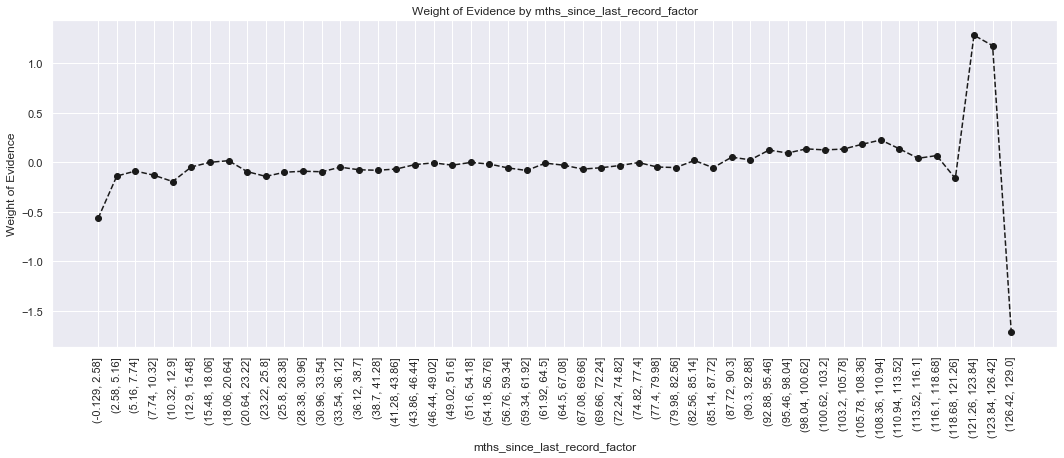

In [156]:
# We plot the weight of evidence values.
plot_by_woe(df_temp23, 90)


In [157]:
# We create the following Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# DATA PREPROCESSING: TEST DATASET

**We will do the same like we did for the train dataset above**

In [158]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [159]:
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [160]:
#grade variable
#Executing the function and storing it in a dataframe
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2477   0.607994    0.005478    1506.0    971.0     0.003812   
1     F    8171   0.642271    0.018072    5248.0   2923.0     0.013284   
2     E   27506   0.722206    0.060836   19865.0   7641.0     0.050282   
3     D   64814   0.798331    0.143351   51743.0  13071.0     0.130972   
4     C  130169   0.860366    0.287899  111993.0  18176.0     0.283477   
5     B  132475   0.915222    0.292999  121244.0  11231.0     0.306893   
6     A   86522   0.964726    0.191364   83470.0   3052.0     0.211280   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017016 -1.495984             NaN       NaN  0.477452  
1    0.051222 -1.349633        0.034278  0.146351  0.477452  
2    0.133900 -0.979439        0.079935  0.370194  0.477452  
3    0.229055 -0.558976        0.076125  0.420462  0.477452  
4    0.318514 -0.116535        0.062036  0.442441  0.477452  
5    0.196811  0.444258        0.054856  0.560793  0.477452  
6    0.053483  1.373821        0.049504  0.929563  0.477452

In [161]:
#We define a function that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Selects a column with label 'WoE' and passes it to variable y.
    y = df_WoE['WoE']
    
    #Plotting the figure
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

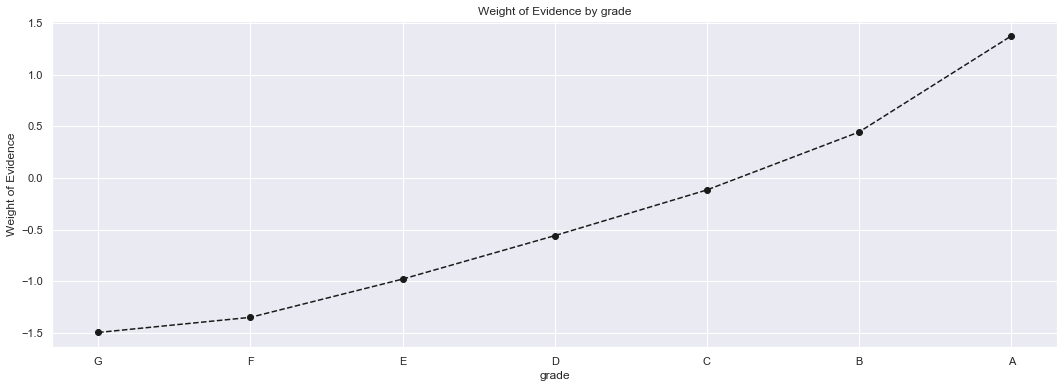

In [162]:
plot_by_woe(df_temp)

The greater the grade, the greater the weight of evidence. That means loans with greater external ratings are greater on avaerage

In [163]:
#home_ownership variable
#Executing our previous WOE function
df_temp1 = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp1

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER      40   0.725000    0.000088      29.0     11.0   
1           NONE      11   0.818182    0.000024       9.0      2.0   
2           RENT  179168   0.852490    0.396272  152739.0  26429.0   
3            OWN   50497   0.874230    0.111686   44146.0   6351.0   
4       MORTGAGE  222246   0.890833    0.491549  197984.0  24262.0   
5            ANY     172   0.941860    0.000380     162.0     10.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.000073    0.000193 -0.965469             NaN       NaN  0.026633  
1     0.000023    0.000035 -0.430792        0.093182  0.534677  0.026633  
2     0.386613    0.463139 -0.180601        0.034309  0.250191  0.026633  
3     0.111743    0.111294  0.004021        0.021740  0.184621  0.026633  
4     0.501138    0.425164  0.164405        0.016603  0.160385  0.026633  
5     0.000410    0.000175  0.850142        0.051028  0.685736  0.026633

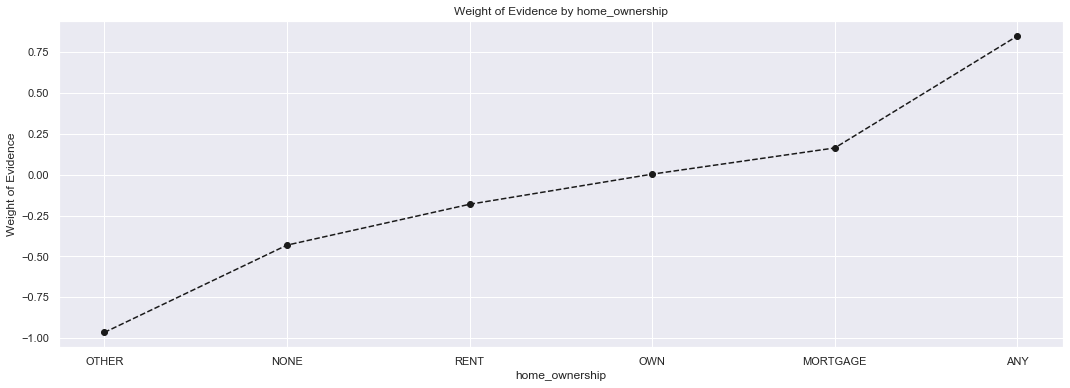

In [164]:
#Plotting the weight of evidence (woe) values by excuting the plot function we created previously.
plot_by_woe(df_temp1)


In [165]:
# There are many categories with home_ownership variable.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHER', 'ANY' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories for the 'home_onership': 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [166]:
#Unique caterogies in the addr_state variable
df_inputs_prepr['addr_state'].unique()

array(['TX', 'MD', 'NC', 'MO', 'NJ', 'GA', 'OH', 'IL', 'CA', 'FL', 'VA',
       'CO', 'AL', 'CT', 'KS', 'WI', 'PA', 'OR', 'MT', 'NM', 'TN', 'NY',
       'MS', 'SC', 'AR', 'OK', 'UT', 'RI', 'LA', 'MI', 'MA', 'MN', 'AZ',
       'HI', 'IN', 'NV', 'VT', 'WA', 'SD', 'ME', 'KY', 'DE', 'NH', 'NE',
       'WV', 'AK', 'ND', 'DC', 'WY', 'ID', 'IA'], dtype=object)

In [167]:
#addr_state variable
# We calculate weight of evidence.
df_temp2 = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp2

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          AL   5492   0.848871    0.012147   4662.0   830.0     0.011800   
1          LA   5242   0.849866    0.011594   4455.0   787.0     0.011277   
2          AR   3502   0.852085    0.007745   2984.0   518.0     0.007553   
3          OK   4176   0.853209    0.009236   3563.0   613.0     0.009019   
4          NV   6541   0.855374    0.014467   5595.0   946.0     0.014162   
5          MS   2574   0.855866    0.005693   2203.0   371.0     0.005576   
6          NY  37323   0.860622    0.082549  32121.0  5202.0     0.081305   
7          IN   7395   0.861934    0.016356   6374.0  1021.0     0.016134   
8          NM   2363   0.865425    0.005226   2045.0   318.0     0.005176   
9          FL  32263   0.866348    0.071357  27951.0  4312.0     0.070750   
10         SD    895   0.867039    0.001980    776.0   119.0     0.001964   
11         NJ  16793   0.867743    0.037142  14572.0  2221.0     0.036885   
12         TN   7114   0.868007    0.015734   6175.0   939.0     0.015630   
13         MO   7177   0.868469    0.015874   6233.0   944.0     0.015777   
14         NC  12471   0.869297    0.027583  10841.0  1630.0     0.027441   
15         PA  15384   0.869345    0.034025  13374.0  2010.0     0.033852   
16         CA  62979   0.869734    0.139293  54775.0  8204.0     0.138647   
17         OH  14915   0.871203    0.032988  12994.0  1921.0     0.032890   
18         HI   2110   0.871564    0.004667   1839.0   271.0     0.004655   
19         AK   1044   0.871648    0.002309    910.0   134.0     0.002303   
20         VA  12683   0.872033    0.028051  11060.0  1623.0     0.027995   
21         AZ  10829   0.872195    0.023951   9445.0  1384.0     0.023907   
22         TX  37081   0.872387    0.082013  32349.0  4732.0     0.081882   
23         MI  11712   0.872780    0.025904  10222.0  1490.0     0.025874   
24         KY   4446   0.872919    0.009833   3881.0   565.0     0.009824   
25         MD  10916   0.873030    0.024143   9530.0  1386.0     0.024122   
26         DE   1284   0.876168    0.002840   1125.0   159.0     0.002848   
27         MN   7958   0.876477    0.017601   6975.0   983.0     0.017655   
28         WI   5982   0.877466    0.013231   5249.0   733.0     0.013286   
29         UT   3084   0.878080    0.006821   2708.0   376.0     0.006854   
30         MA  10252   0.881291    0.022675   9035.0  1217.0     0.022869   
31         NE   1538   0.881664    0.003402   1356.0   182.0     0.003432   
32         GA  14861   0.881906    0.032869  13106.0  1755.0     0.033174   
33         MT   1243   0.891392    0.002749   1108.0   135.0     0.002805   
34         WA   9273   0.891729    0.020509   8269.0  1004.0     0.020931   
35         RI   1981   0.892479    0.004381   1768.0   213.0     0.004475   
36         IL  18263   0.895910    0.040393  16362.0  1901.0     0.041416   
37         CT   7198   0.900806    0.015920   6484.0   714.0     0.016412   
38         CO   9658   0.901015    0.021361   8702.0   956.0     0.022027   
39         SC   5571   0.901992    0.012322   5025.0   546.0     0.012719   
40         WV   1664   0.902644    0.003680   1502.0   162.0     0.003802   
41         OR   5324   0.904020    0.011775   4813.0   511.0     0.012183   
42         WY    964   0.904564    0.002132    872.0    92.0     0.002207   
43         NH   2187   0.905807    0.004837   1981.0   206.0     0.005014   
44         DC   1064   0.906015    0.002353    964.0   100.0     0.002440   
45         KS   3843   0.906583    0.008500   3484.0   359.0     0.008819   
46         VT   1003   0.908275    0.002218    911.0    92.0     0.002306   
47         ND    668   0.911677    0.001477    609.0    59.0     0.001542   
48         ID    822   0.928224    0.001818    763.0    59.0     0.001931   
49         ME   1027   0.941577    0.002271    967.0    60.0     0.002448   
50         IA      2   1.000000    0.000004      2.0     0.0     0.000005   

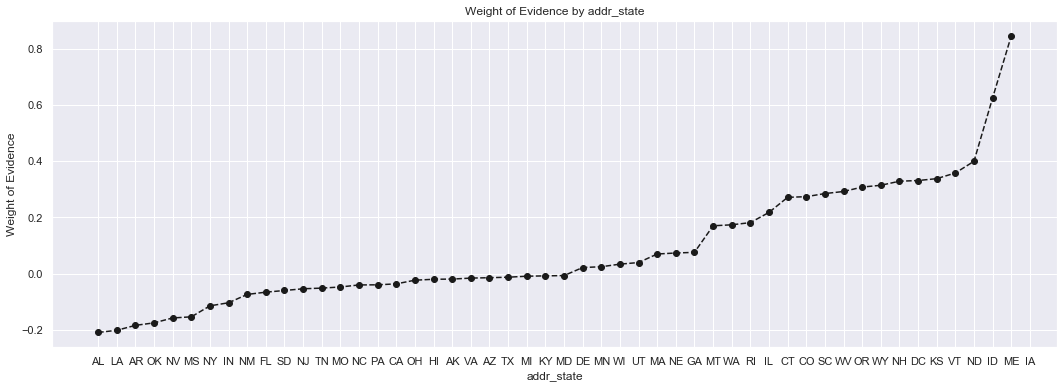

In [168]:
# We plot the weight of evidence values.
plot_by_woe(df_temp2)

In [169]:
#We want to get a normal curve
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

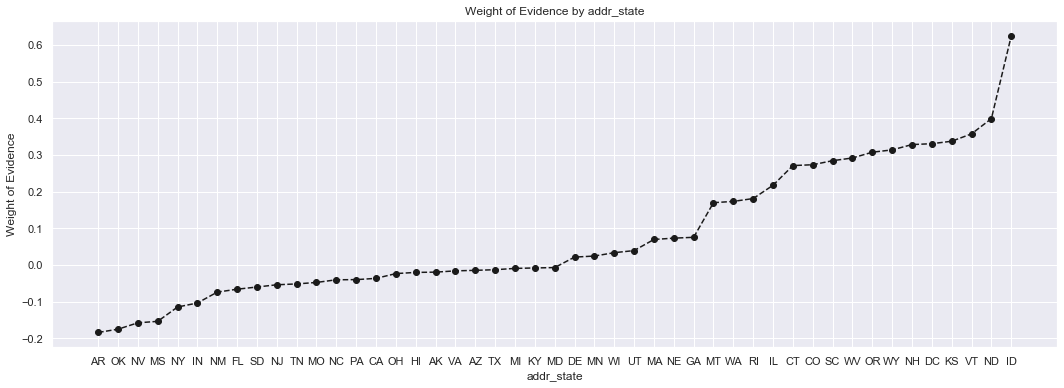

In [170]:
# We plot the weight of evidence values again for the 'addr_state' by removing the state IA and AL.
plot_by_woe(df_temp2.iloc[2: -2, : ])

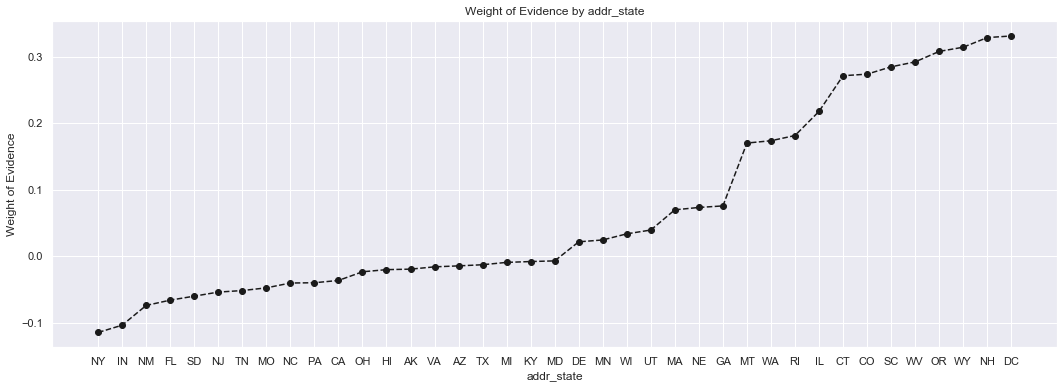

In [171]:
# We plot the weight of evidence values again by removing the upper states OR, NH, DC, ID, VT, ME.
plot_by_woe(df_temp2.iloc[6: -6, : ])

In [172]:
# Creating dummies for the 'addr_state' variable
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'ND_NE_IA_NV_FL_HI_AL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [173]:
# 'verification_status' variable'
# We calculate weight of evidence.

df_temp3 = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp3

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  126290   0.833930     0.27932  105317.0  20973.0   
1     Source Verified  177395   0.868908     0.39235  154140.0  23255.0   
2        Not Verified  148449   0.913526     0.32833  135612.0  12837.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.266579    0.367528 -0.321131             NaN       NaN  0.08317  
1     0.390160    0.407518 -0.043528        0.034979  0.277602  0.08317  
2     0.343262    0.224954  0.422597        0.044617  0.466125  0.08317

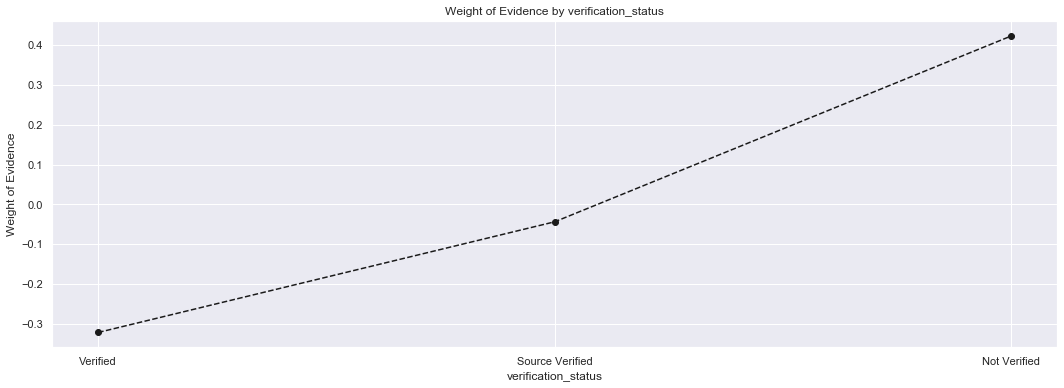

In [174]:
# We plot the weight of evidence values.
plot_by_woe(df_temp3)


In [175]:
# 'purpose' variable
# We calculate weight of evidence.

df_temp4 = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp4

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    4924   0.804224    0.010891    3960.0    964.0   
1          educational      80   0.812500    0.000177      65.0     15.0   
2     renewable_energy     300   0.813333    0.000664     244.0     56.0   
3               moving    2984   0.842493    0.006600    2514.0    470.0   
4   debt_consolidation  255519   0.863098    0.565140  220538.0  34981.0   
5              medical    5513   0.867586    0.012193    4783.0    730.0   
6                other   27989   0.872414    0.061904   24418.0   3571.0   
7                house    2870   0.876307    0.006348    2515.0    355.0   
8             vacation    3134   0.881621    0.006932    2763.0    371.0   
9       major_purchase    9975   0.882005    0.022062    8798.0   1177.0   
10             wedding     469   0.889126    0.001037     417.0     52.0   
11    home_improvement   30125   0.890357    0.066628   26822.0   3303.0   
12         credit_card  103450   0.898125    0.228804   92911.0  10539.0   
13                 car    4802   0.899833    0.010621    4321.0    481.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.010024    0.016893 -0.521961             NaN       NaN  0.024098  
1      0.000165    0.000263 -0.468532        0.008276  0.053429  0.024098  
2      0.000618    0.000981 -0.463053        0.000833  0.005479  0.024098  
3      0.006363    0.008236 -0.257972        0.029160  0.205081  0.024098  
4      0.558227    0.613003 -0.093605        0.020605  0.164367  0.024098  
5      0.012107    0.012792 -0.055091        0.004487  0.038514  0.024098  
6      0.061807    0.062578 -0.012395        0.004828  0.042696  0.024098  
7      0.006366    0.006221  0.023041        0.003892  0.035435  0.024098  
8      0.006994    0.006501  0.073001        0.005314  0.049960  0.024098  
9      0.022270    0.020626  0.076686        0.000384  0.003685  0.024098  
10     0.001056    0.000911  0.146973        0.007121  0.070287  0.024098  
11     0.067892    0.057881  0.159522        0.001231  0.012549  0.024098  
12     0.235177    0.184684  0.241690        0.007768  0.082168  0.024098  
13     0.010937    0.008429  0.260505        0.001709  0.018815  0.024098

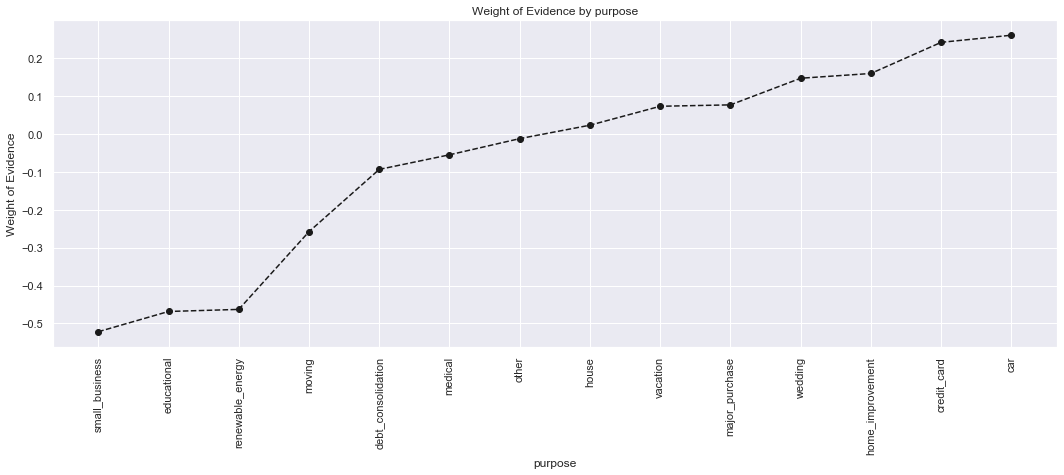

In [176]:
plot_by_woe(df_temp4, 90)
# We plot the weight of evidence values.

In [177]:
# We create dummy variables for the 'purpose' variable
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [178]:
# 'initial_list_status' variable
# We calculate weight of evidence.

df_temp5 = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp5

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  144739   0.842157    0.320124  121893.0  22846.0   
1                   w  307395   0.888681    0.679876  273176.0  34219.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.308536     0.40035 -0.260502             NaN       NaN  0.036998  
1     0.691464     0.59965  0.142466        0.046523  0.402968  0.036998

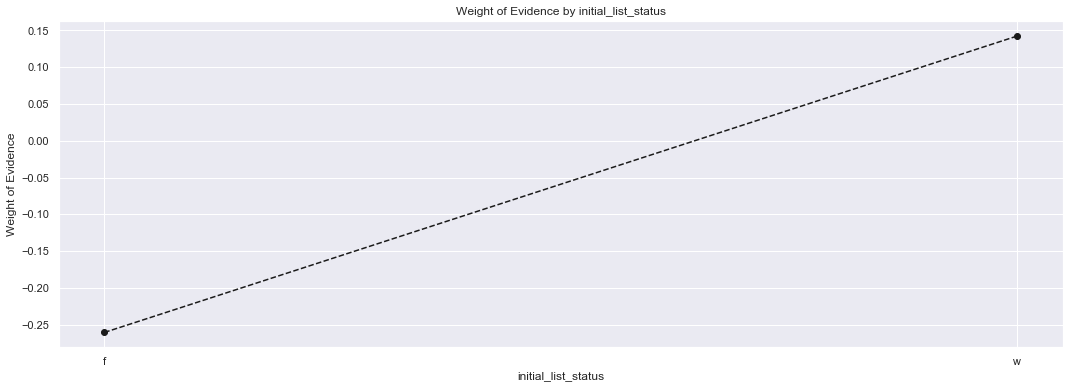

In [179]:
# We plot the weight of evidence values.
plot_by_woe(df_temp5)


In [180]:
# WoE function for ordered discrete and continuous variables
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [181]:
# term variable
# There are only two unique values, 36 and 60.
df_inputs_prepr['term_int'].unique()

array([36, 60], dtype=int64)

In [182]:
# We calculate weight of evidence.
df_temp6 = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp6

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  321675   0.891819    0.711459  286876.0  34799.0     0.726142   
1        60  130459   0.829326    0.288541  108193.0  22266.0     0.273858   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.609813  0.174592             NaN       NaN  0.061492  
1    0.390187 -0.354014        0.062494  0.528606  0.061492

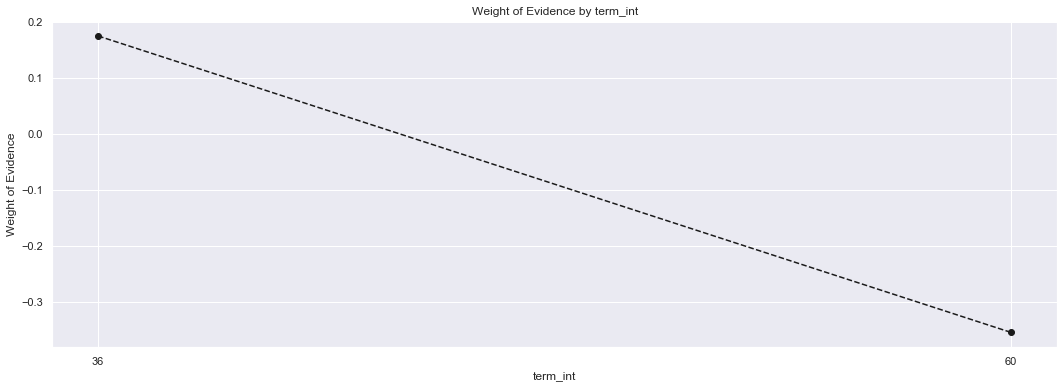

In [183]:
# We plot the weight of evidence values.
plot_by_woe(df_temp6)


It seems 60 months loans are much risky than 36 months loans

In [184]:
# We will keep both the 36 and 60 months category.
# However the '60' months will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [185]:
# emp_length_int variable
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.
df_inputs_prepr['emp_length_int'].unique()

array([ 0.,  2.,  5.,  3.,  1.,  9., 10.,  4.,  7.,  6.,  8.])

In [186]:
# We calculate weight of evidence.
df_temp7 = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp7

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   67183   0.860962    0.148591   57842.0   9341.0   
1              1.0   29755   0.871820    0.065810   25941.0   3814.0   
2              2.0   40636   0.872798    0.089876   35467.0   5169.0   
3              3.0   36148   0.873409    0.079950   31572.0   4576.0   
4              4.0   27396   0.873558    0.060593   23932.0   3464.0   
5              5.0   27908   0.877240    0.061725   24482.0   3426.0   
6              6.0   20566   0.875814    0.045487   18012.0   2554.0   
7              7.0   18674   0.868909    0.041302   16226.0   2448.0   
8              8.0   18472   0.862711    0.040855   15936.0   2536.0   
9              9.0   15822   0.866199    0.034994   13705.0   2117.0   
10            10.0  149574   0.882199    0.330818  131954.0  17620.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.146410    0.163691 -0.111568             NaN       NaN  0.004654  
1      0.065662    0.066836 -0.017723        0.010858  0.093844  0.004654  
2      0.089774    0.090581 -0.008946        0.000978  0.008777  0.004654  
3      0.079915    0.080189 -0.003424        0.000612  0.005522  0.004654  
4      0.060577    0.060703 -0.002077        0.000149  0.001347  0.004654  
5      0.061969    0.060037  0.031675        0.003681  0.033752  0.004654  
6      0.045592    0.044756  0.018508        0.001425  0.013167  0.004654  
7      0.041071    0.042898 -0.043526        0.006906  0.062034  0.004654  
8      0.040337    0.044441 -0.096877        0.006198  0.053351  0.004654  
9      0.034690    0.037098 -0.067109        0.003488  0.029768  0.004654  
10     0.334002    0.308771  0.078549        0.016000  0.145658  0.004654

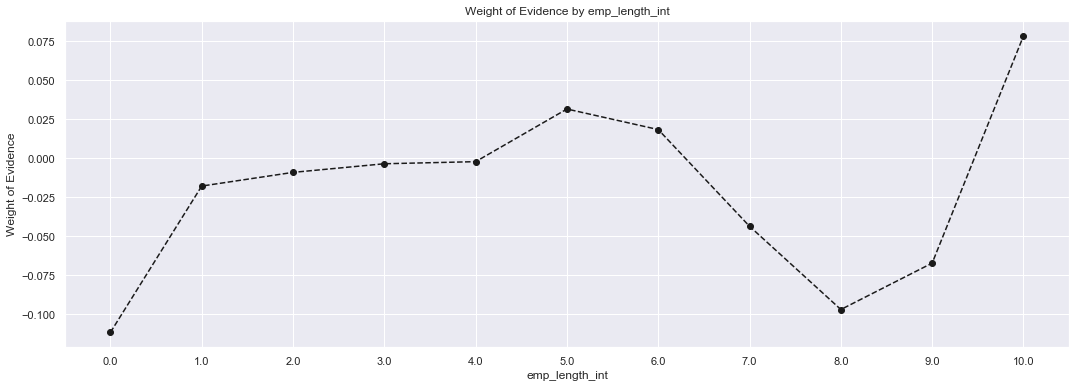

In [187]:
# We plot the weight of evidence values.
plot_by_woe(df_temp7)


In [188]:
# Employment length has several categories
# So we have to create the following new categories for emp_length_int: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [189]:
# Months since loan issue date (mths_since_issue_d) variable
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 54.,  20.,  14.,  51.,  16.,   0., -11.,   9.,  56.,  15.,  32.,
        28.,  17.,  11.,  31.,  25., -10.,  21.,  60.,   4.,  -4.,  -7.,
         3.,  37.,  13.,  -2.,  43.,  46.,  38.,   6.,  29.,  30.,  -1.,
         7.,  26.,  -9.,  40.,  -8.,  12.,  41.,  45.,  27.,   5.,  34.,
        24.,  22.,  63.,  -5., -12.,  -3.,  19.,  52.,  47.,  44.,  18.,
        -6.,  35.,  33.,   2.,  10.,  70.,   1.,  49.,  59.,  23.,  57.,
         8.,  50.,  81.,  69.,  48.,  39.,  65.,  36.,  72.,  53.,  66.,
        42.,  55.,  75.,  82.,  58.,  61.,  83., 108., 121.,  71.,  90.,
       103.,  64.,  95.,  73.,  74.,  89.,  62.,  78.,  80.,  77.,  99.,
        87.,  67.,  85., 116.,  68.,  76., 104.,  97.,  93.,  84., 102.,
        79.,  86., 117.,  91., 118., 107.,  88., 101.,  96., 122.,  92.,
        94., 106., 112., 100., 119., 105.,  98., 120., 124., 113., 109.,
       123., 110., 111., 114., 125., 126., 115.])

In [190]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [191]:
df_inputs_prepr['mths_since_issue_d_factor']

1758049    (51.48, 54.24]
686533     (18.36, 21.12]
900721      (12.84, 15.6]
1727912    (48.72, 51.48]
539691      (15.6, 18.36]
                ...      
1671005     (7.32, 10.08]
513964      (12.84, 15.6]
484351     (-3.72, -0.96]
2196489      (-0.96, 1.8]
1598108      (4.56, 7.32]
Name: mths_since_issue_d_factor, Length: 452134, dtype: category
Categories (50, interval[float64]): [(-12.138, -9.24] < (-9.24, -6.48] < (-6.48, -3.72] < (-3.72, -0.96] ... (114.96, 117.72] < (117.72, 120.48] < (120.48, 123.24] < (123.24, 126.0]]

In [192]:
# mths_since_issue_d
# We calculate weight of evidence.
df_temp8 = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp8

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0           (-12.138, -9.24]  25528   0.996279    0.056461  25433.0    95.0   
1             (-9.24, -6.48]  25589   0.983352    0.056596  25163.0   426.0   
2             (-6.48, -3.72]  26209   0.962265    0.057967  25220.0   989.0   
3             (-3.72, -0.96]  21496   0.946967    0.047543  20356.0  1140.0   
4               (-0.96, 1.8]  16173   0.926606    0.035770  14986.0  1187.0   
5                (1.8, 4.56]  24198   0.902099    0.053520  21829.0  2369.0   
6               (4.56, 7.32]  23126   0.893064    0.051149  20653.0  2473.0   
7              (7.32, 10.08]  19078   0.883216    0.042195  16850.0  2228.0   
8             (10.08, 12.84]  13657   0.863074    0.030206  11787.0  1870.0   
9              (12.84, 15.6]  19221   0.851829    0.042512  16373.0  2848.0   
10             (15.6, 18.36]  20732   0.830793    0.045854  17224.0  3508.0   
11            (18.36, 21.12]  25316   0.822484    0.055992  20822.0  4494.0   
12            (21.12, 23.88]  14356   0.822095    0.031752  11802.0  2554.0   
13            (23.88, 26.64]  26214   0.821660    0.057978  21539.0  4675.0   
14             (26.64, 29.4]  22013   0.821969    0.048687  18094.0  3919.0   
15             (29.4, 32.16]  19107   0.810593    0.042260  15488.0  3619.0   
16            (32.16, 34.92]   9932   0.814136    0.021967   8086.0  1846.0   
17            (34.92, 37.68]  14022   0.815362    0.031013  11433.0  2589.0   
18            (37.68, 40.44]  13620   0.817768    0.030124  11138.0  2482.0   
19             (40.44, 43.2]  12987   0.821899    0.028724  10674.0  2313.0   
20             (43.2, 45.96]   7161   0.822930    0.015838   5893.0  1268.0   
21            (45.96, 48.72]   9234   0.844596    0.020423   7799.0  1435.0   
22            (48.72, 51.48]   8382   0.843474    0.018539   7070.0  1312.0   
23            (51.48, 54.24]   7056   0.844388    0.015606   5958.0  1098.0   
24             (54.24, 57.0]   5609   0.841861    0.012406   4722.0   887.0   
25             (57.0, 59.76]   2952   0.847900    0.006529   2503.0   449.0   
26            (59.76, 62.52]   3785   0.845971    0.008371   3202.0   583.0   
27            (62.52, 65.28]   3241   0.838322    0.007168   2717.0   524.0   
28            (65.28, 68.04]   2016   0.831349    0.004459   1676.0   340.0   
29             (68.04, 70.8]   1059   0.845137    0.002342    895.0   164.0   
30             (70.8, 73.56]   1467   0.830948    0.003245   1219.0   248.0   
31            (73.56, 76.32]   1240   0.861290    0.002743   1068.0   172.0   
32            (76.32, 79.08]   1088   0.842831    0.002406    917.0   171.0   
33            (79.08, 81.84]    588   0.846939    0.001300    498.0    90.0   
34             (81.84, 84.6]    781   0.874520    0.001727    683.0    98.0   
35             (84.6, 87.36]    714   0.843137    0.001579    602.0   112.0   
36            (87.36, 90.12]    707   0.851485    0.001564    602.0   105.0   
37            (90.12, 92.88]    379   0.852243    0.000838    323.0    56.0   
38            (92.88, 95.64]    448   0.881696    0.000991    395.0    53.0   
39             (95.64, 98.4]    394   0.883249    0.000871    348.0    46.0   
40            (98.4, 101.16]    286   0.863636    0.000633    247.0    39.0   
41          (101.16, 103.92]    165   0.866667    0.000365    143.0    22.0   
42          (103.92, 106.68]    179   0.854749    0.000396    153.0    26.0   
43          (106.68, 109.44]    150   0.766667    0.000332    115.0    35.0   
44           (109.44, 112.2]     52   0.826923    0.000115     43.0     9.0   
45           (112.2, 114.96]     50   0.780000    0.000111     39.0    11.0   
46          (114.96, 117.72]    131   0.755725    0.000290     99.0    32.0   
47          (117.72, 120.48]    150   0.786667    0.000332    118.0    32.0   
48          (120.48, 123.24]     58   0.706897    0.000128     41.0    17.0   
49           (123.24, 126.0]     38   0.815789    0.0

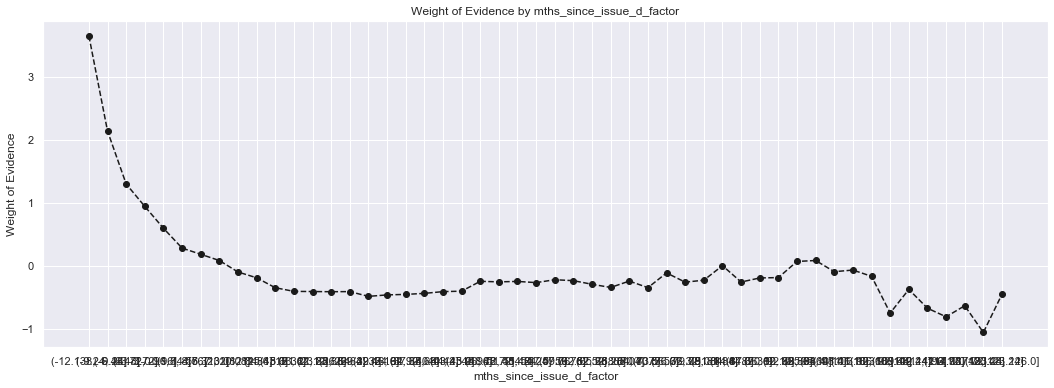

In [193]:
# We plot the weight of evidence values.
plot_by_woe(df_temp8)

We have to rotate the labels because we cannot read them otherwise.


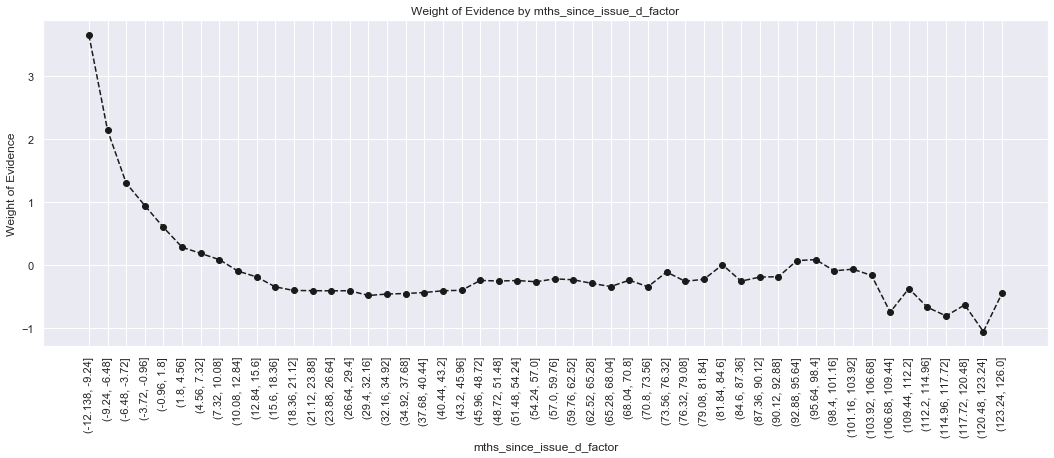

In [194]:
# We plot the weight of evidence values, rotating the labels 90 degrees.
plot_by_woe(df_temp8, 90)


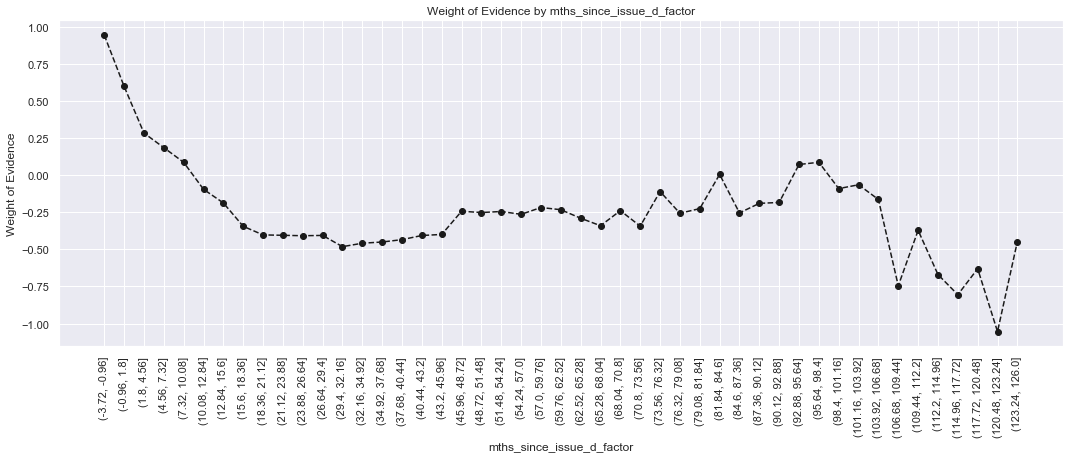

In [195]:
# We plot the weight of evidence values.
plot_by_woe(df_temp8.iloc[3: , : ], 90)

In [196]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [197]:
# int_rate variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [198]:
# We calculate weight of evidence.
df_temp9 = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp9

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.284, 5.824]  11360   0.980194    0.025125  11135.0   225.0   
1     (5.824, 6.337]   9727   0.982523    0.021514   9557.0   170.0   
2     (6.337, 6.851]  10360   0.973166    0.022914  10082.0   278.0   
3     (6.851, 7.364]  18788   0.967373    0.041554  18175.0   613.0   
4     (7.364, 7.878]  10985   0.959490    0.024296  10540.0   445.0   
5     (7.878, 8.392]  27795   0.935852    0.061475  26012.0  1783.0   
6     (8.392, 8.905]   7414   0.945913    0.016398   7013.0   401.0   
7     (8.905, 9.419]   9198   0.905740    0.020344   8331.0   867.0   
8     (9.419, 9.932]  20014   0.936694    0.044266  18747.0  1267.0   
9    (9.932, 10.446]  15804   0.933055    0.034954  14746.0  1058.0   
10   (10.446, 10.96]  17269   0.923736    0.038194  15952.0  1317.0   
11   (10.96, 11.473]  22268   0.899901    0.049251  20039.0  2229.0   
12  (11.473, 11.987]  17310   0.903986    0.038285  15648.0  1662.0   
13    (11.987, 12.5]  21442   0.871141    0.047424  18679.0  2763.0   
14    (12.5, 13.014]  26147   0.877806    0.057830  22952.0  3195.0   
15  (13.014, 13.528]  14247   0.844248    0.031511  12028.0  2219.0   
16  (13.528, 14.041]  25695   0.864371    0.056830  22210.0  3485.0   
17  (14.041, 14.555]  19725   0.871686    0.043626  17194.0  2531.0   
18  (14.555, 15.068]  17720   0.860440    0.039192  15247.0  2473.0   
19  (15.068, 15.582]   5651   0.823394    0.012499   4653.0   998.0   
20  (15.582, 16.096]  18525   0.821377    0.040972  15216.0  3309.0   
21  (16.096, 16.609]  10611   0.812365    0.023469   8620.0  1991.0   
22  (16.609, 17.123]  11178   0.822956    0.024723   9199.0  1979.0   
23  (17.123, 17.636]   7720   0.755181    0.017075   5830.0  1890.0   
24   (17.636, 18.15]   9868   0.815464    0.021825   8047.0  1821.0   
25   (18.15, 18.664]   7798   0.737882    0.017247   5754.0  2044.0   
26  (18.664, 19.177]   9610   0.801041    0.021255   7698.0  1912.0   
27  (19.177, 19.691]   4865   0.741418    0.010760   3607.0  1258.0   
28  (19.691, 20.204]   7998   0.782946    0.017689   6262.0  1736.0   
29  (20.204, 20.718]   2113   0.802650    0.004673   1696.0   417.0   
30  (20.718, 21.232]   4183   0.761893    0.009252   3187.0   996.0   
31  (21.232, 21.745]   3636   0.748350    0.008042   2721.0   915.0   
32  (21.745, 22.259]   2548   0.721350    0.005635   1838.0   710.0   
33  (22.259, 22.772]   3204   0.775281    0.007086   2484.0   720.0   
34  (22.772, 23.286]   1807   0.683453    0.003997   1235.0   572.0   
35    (23.286, 23.8]   1462   0.792066    0.003234   1158.0   304.0   
36    (23.8, 24.313]   2752   0.713299    0.006087   1963.0   789.0   
37  (24.313, 24.827]   1648   0.733617    0.003645   1209.0   439.0   
38   (24.827, 25.34]   2649   0.738014    0.005859   1955.0   694.0   
39   (25.34, 25.854]   2087   0.703881    0.004616   1469.0   618.0   
40  (25.854, 26.368]   1943   0.724653    0.004297   1408.0   535.0   
41  (26.368, 26.881]    659   0.711684    0.001458    469.0   190.0   
42  (26.881, 27.395]    764   0.827225    0.001690    632.0   132.0   
43  (27.395, 27.908]    215   0.548837    0.000476    118.0    97.0   
44  (27.908, 28.422]    133   0.593985    0.000294     79.0    54.0   
45  (28.422, 28.936]    865   0.709827    0.001913    614.0   251.0   
46  (28.936, 29.449]     49   0.469388    0.000108     23.0    26.0   
47  (29.449, 29.963]    431   0.707657    0.000953    305.0   126.0   
48  (29.963, 30.476]    371   0.730458    0.000821    271.0   100.0   
49   (30.476, 30.99]   1523   0.697308    0.003368   1062.0   461.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.028185    0.003943  1.966879             NaN       NaN  0.467865  
1      0.024191    0.002979  2.094361        0.002329  0.127483  0.467865  
2      0.025520    0.004872  1.656016        0.009357  0.438345  0.467865  
3      0.046005    0.010742  1.454568        0.005793  0.201448  0.467865  
4  

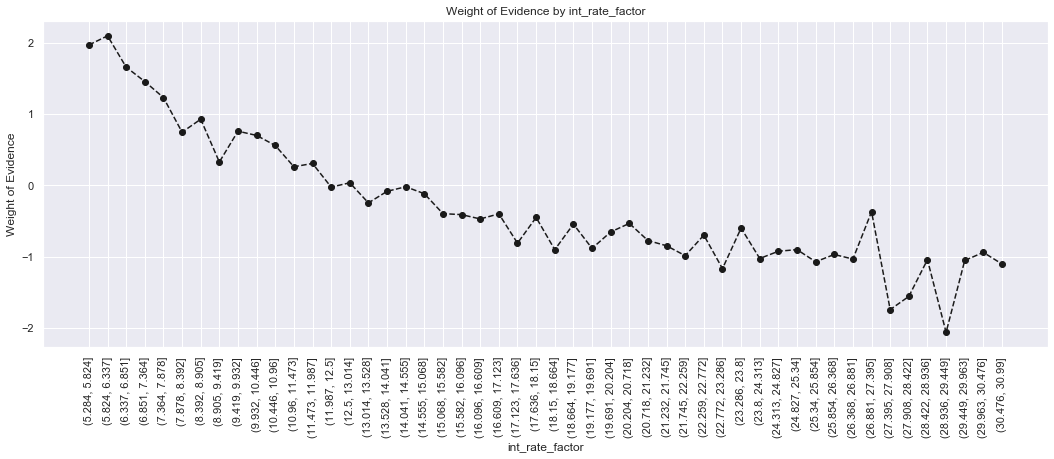

In [199]:
# We plot the weight of evidence values.
plot_by_woe(df_temp9, 90)


In [200]:
# We create the following categories:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [201]:
# funded_amnt variable
df_inputs_prepr['funded_amnt'].unique()

array([35000, 30000, 15000, ..., 37425, 36700, 36725], dtype=int64)

In [202]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)


In [203]:
# We calculate weight of evidence.
df_temp10 = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp10

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (460.5, 1290.0]   2828   0.914427    0.006255   2586.0   242.0   
1     (1290.0, 2080.0]   6472   0.905284    0.014314   5859.0   613.0   
2     (2080.0, 2870.0]   5629   0.902647    0.012450   5081.0   548.0   
3     (2870.0, 3660.0]  12485   0.896996    0.027613  11199.0  1286.0   
4     (3660.0, 4450.0]   9815   0.893734    0.021708   8772.0  1043.0   
5     (4450.0, 5240.0]  23491   0.895875    0.051956  21045.0  2446.0   
6     (5240.0, 6030.0]  21098   0.892881    0.046663  18838.0  2260.0   
7     (6030.0, 6820.0]   6836   0.870099    0.015119   5948.0   888.0   
8     (6820.0, 7610.0]  15698   0.884635    0.034720  13887.0  1811.0   
9     (7610.0, 8400.0]  19935   0.879960    0.044091  17542.0  2393.0   
10    (8400.0, 9190.0]   9704   0.879946    0.021463   8539.0  1165.0   
11    (9190.0, 9980.0]   7211   0.854250    0.015949   6160.0  1051.0   
12   (9980.0, 10770.0]  42595   0.886254    0.094209  37750.0  4845.0   
13  (10770.0, 11560.0]  10660   0.863790    0.023577   9208.0  1452.0   
14  (11560.0, 12350.0]  27151   0.872749    0.060051  23696.0  3455.0   
15  (12350.0, 13140.0]   8591   0.868700    0.019001   7463.0  1128.0   
16  (13140.0, 13930.0]   4094   0.819248    0.009055   3354.0   740.0   
17  (13930.0, 14720.0]  12225   0.858078    0.027038  10490.0  1735.0   
18  (14720.0, 15510.0]  27378   0.870480    0.060553  23832.0  3546.0   
19  (15510.0, 16300.0]  15860   0.857377    0.035078  13598.0  2262.0   
20  (16300.0, 17090.0]   6467   0.847534    0.014303   5481.0   986.0   
21  (17090.0, 17880.0]   3121   0.812880    0.006903   2537.0   584.0   
22  (17880.0, 18670.0]  12378   0.859509    0.027377  10639.0  1739.0   
23  (18670.0, 19460.0]   4774   0.835149    0.010559   3987.0   787.0   
24  (19460.0, 20250.0]  28504   0.873000    0.063043  24884.0  3620.0   
25  (20250.0, 21040.0]   7378   0.846435    0.016318   6245.0  1133.0   
26  (21040.0, 21830.0]   2300   0.802609    0.005087   1846.0   454.0   
27  (21830.0, 22620.0]   4628   0.861063    0.010236   3985.0   643.0   
28  (22620.0, 23410.0]   2758   0.837563    0.006100   2310.0   448.0   
29  (23410.0, 24200.0]  12775   0.857143    0.028255  10950.0  1825.0   
30  (24200.0, 24990.0]   1561   0.798847    0.003453   1247.0   314.0   
31  (24990.0, 25780.0]  14854   0.877003    0.032853  13027.0  1827.0   
32  (25780.0, 26570.0]   2363   0.850190    0.005226   2009.0   354.0   
33  (26570.0, 27360.0]   2013   0.851962    0.004452   1715.0   298.0   
34  (27360.0, 28150.0]   7295   0.867443    0.016135   6328.0   967.0   
35  (28150.0, 28940.0]   1117   0.826321    0.002471    923.0   194.0   
36  (28940.0, 29730.0]   1306   0.818530    0.002889   1069.0   237.0   
37  (29730.0, 30520.0]  12946   0.872934    0.028633  11301.0  1645.0   
38  (30520.0, 31310.0]   1061   0.832234    0.002347    883.0   178.0   
39  (31310.0, 32100.0]   3489   0.881628    0.007717   3076.0   413.0   
40  (32100.0, 32890.0]    746   0.833780    0.001650    622.0   124.0   
41  (32890.0, 33680.0]   1318   0.874052    0.002915   1152.0   166.0   
42  (33680.0, 34470.0]    703   0.844950    0.001555    594.0   109.0   
43  (34470.0, 35260.0]  17608   0.848024    0.038944  14932.0  2676.0   
44  (35260.0, 36050.0]   1308   0.954128    0.002893   1248.0    60.0   
45  (36050.0, 36840.0]    111   0.936937    0.000246    104.0     7.0   
46  (36840.0, 37630.0]    265   0.958491    0.000586    254.0    11.0   
47  (37630.0, 38420.0]    298   0.949664    0.000659    283.0    15.0   
48  (38420.0, 39210.0]    162   0.962963    0.000358    156.0     6.0   
49  (39210.0, 40000.0]   6771   0.950377    0.014976   6435.0   336.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.006546    0.004241  0.434060             NaN       NaN  0.042764  
1      0.014830    0.010742  0.322500        0.009143  0.111561  0.042764  
2      0.012861    0.009603  0.292119        0.00263

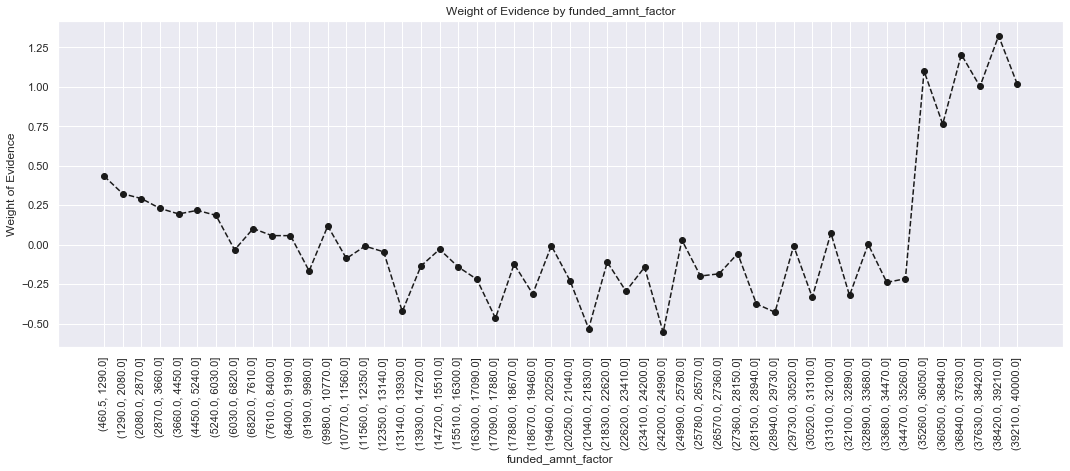

In [204]:
# We plot the weight of evidence values.
plot_by_woe(df_temp10, 90)

In [205]:
# mths_since_earliest_cr_line variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

In [206]:
# We calculate weight of evidence.
df_temp11 = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp11

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (-1.006, 20.12]      8   0.875000    0.000018      7.0   
1                      (20.12, 40.24]   2081   0.961557    0.004603   2001.0   
2                      (40.24, 60.36]   6682   0.921131    0.014779   6155.0   
3                      (60.36, 80.48]  11386   0.885649    0.025183  10084.0   
4                      (80.48, 100.6]  13447   0.877594    0.029741  11801.0   
5                     (100.6, 120.72]  17350   0.883228    0.038374  15324.0   
6                    (120.72, 140.84]  37327   0.879551    0.082557  32831.0   
7                    (140.84, 160.96]  47089   0.868589    0.104148  40901.0   
8                    (160.96, 181.08]  48366   0.864347    0.106973  41805.0   
9                     (181.08, 201.2]  46068   0.864266    0.101890  39815.0   
10                    (201.2, 221.32]  43055   0.868122    0.095226  37377.0   
11                   (221.32, 241.44]  33253   0.867862    0.073547  28859.0   
12                   (241.44, 261.56]  28100   0.868292    0.062150  24399.0   
13                   (261.56, 281.68]  25856   0.870204    0.057187  22500.0   
14                    (281.68, 301.8]  19114   0.877838    0.042275  16779.0   
15                    (301.8, 321.92]  12956   0.880905    0.028655  11413.0   
16                   (321.92, 342.04]  13746   0.886585    0.030402  12187.0   
17                   (342.04, 362.16]  10676   0.882166    0.023612   9418.0   
18                   (362.16, 382.28]   8531   0.881960    0.018868   7524.0   
19                    (382.28, 402.4]   6856   0.888273    0.015164   6090.0   
20                    (402.4, 422.52]   5351   0.883760    0.011835   4729.0   
21                   (422.52, 442.64]   3496   0.894737    0.007732   3128.0   
22                   (442.64, 462.76]   2496   0.885417    0.005520   2210.0   
23                   (462.76, 482.88]   2473   0.881116    0.005470   2179.0   
24                    (482.88, 503.0]   1905   0.889239    0.004213   1694.0   
25                    (503.0, 523.12]   1195   0.872803    0.002643   1043.0   
26                   (523.12, 543.24]    986   0.870183    0.002181    858.0   
27                   (543.24, 563.36]    678   0.879056    0.001500    596.0   
28                   (563.36, 583.48]    542   0.861624    0.001199    467.0   
29                    (583.48, 603.6]    407   0.852580    0.000900    347.0   
30                    (603.6, 623.72]    265   0.860377    0.000586    228.0   
31                   (623.72, 643.84]    172   0.773256    0.000380    133.0   
32                   (643.84, 663.96]     92   0.836957    0.000203     77.0   
33                   (663.96, 684.08]     59   0.864407    0.000130     51.0   
34                    (684.08, 704.2]     25   0.840000    0.000055     21.0   
35                    (704.2, 724.32]     10   0.700000    0.000022      7.0   
36                   (724.32, 744.44]      9   0.888889    0.000020      8.0   
37                   (744.44, 764.56]      6   0.833333    0.000013      5.0   
38                   (764.56, 784.68]      6   0.833333    0.000013      5.0   
39                    (784.68, 804.8]      6   0.833333    0.000013      5.0   
40                    (804.8, 824.92]      6   1.000000    0.000013      6.0   
41                   (824.92, 845.04]      0        NaN    0.000000      NaN   
42                   (845.04, 865.16]      1   1.000000    0.000002      1.0   
43                   (865.16, 885.28]      0        NaN    0.000000      NaN   
44                    (885.28, 905.4]      0        NaN    0.000000      NaN   
45                    (905.4, 925.52]      0        NaN    0.000000      NaN   
46                   (925.52, 945.64]      0        NaN    0.000000      NaN   
47                   (945.64, 965.76]      0        NaN    0.000000      NaN   
48                   (965.76, 985.88]      0        NaN    0.000000      NaN   
49 

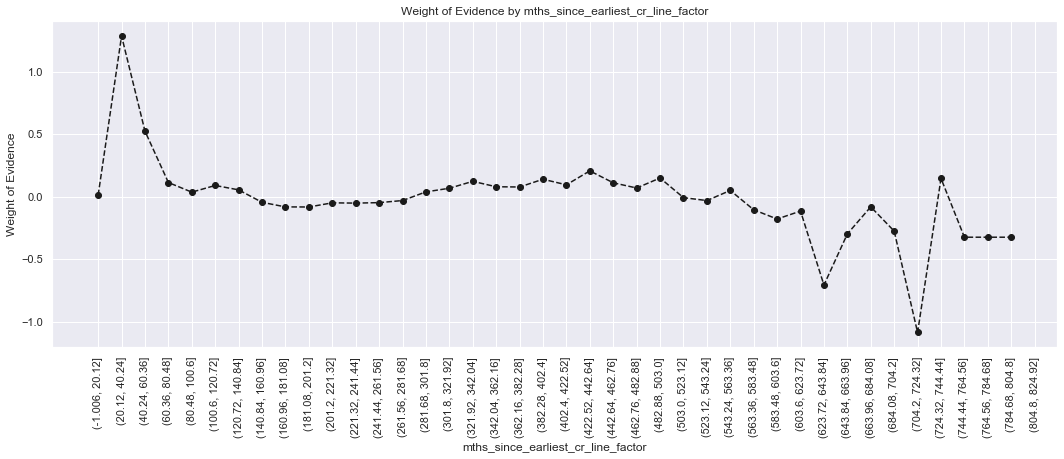

In [207]:
# We plot the weight of evidence values.
plot_by_woe(df_temp11, 90)

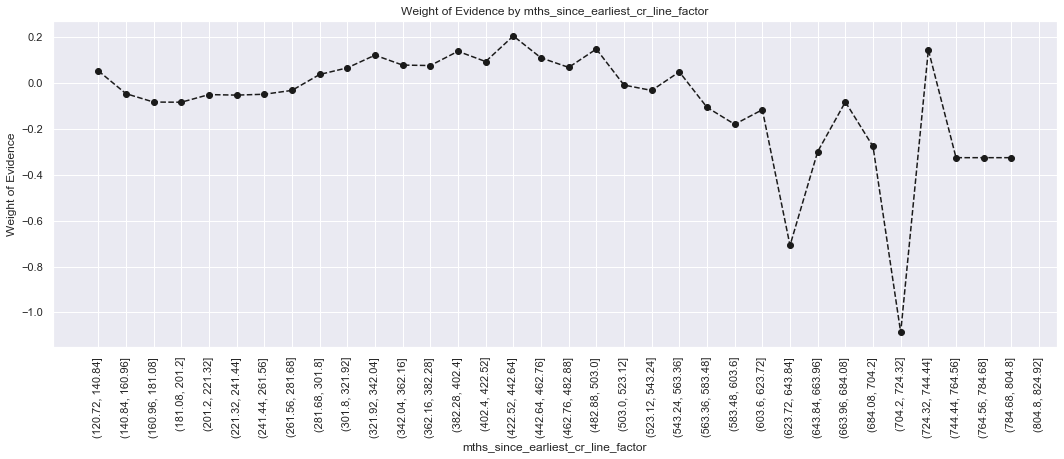

In [208]:
# We plot the weight of evidence values
plot_by_woe(df_temp11.iloc[6: , : ], 90)

In [209]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [210]:
# delinq_2yrs variable
# We calculate weight of evidence
df_temp12 = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp12

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  367694   0.877213    0.813241  322546.0  45148.0   
1           1.0   56385   0.864042    0.124709   48719.0   7666.0   
2           2.0   16271   0.853174    0.035987   13882.0   2389.0   
3           3.0    5822   0.839918    0.012877    4890.0    932.0   
4           4.0    2703   0.846097    0.005978    2287.0    416.0   
5           5.0    1338   0.846039    0.002959    1132.0    206.0   
6           6.0     779   0.839538    0.001723     654.0    125.0   
7           7.0     405   0.817284    0.000896     331.0     74.0   
8           8.0     238   0.852941    0.000526     203.0     35.0   
9           9.0     171   0.877193    0.000378     150.0     21.0   
10         10.0      98   0.816327    0.000217      80.0     18.0   
11         11.0      72   0.916667    0.000159      66.0      6.0   
12         12.0      44   0.772727    0.000097      34.0     10.0   
13         13.0      33   0.878788    0.000073      29.0      4.0   
14         14.0      22   0.772727    0.000049      17.0      5.0   
15         15.0      21   0.904762    0.000046      19.0      2.0   
16         16.0      12   0.583333    0.000027       7.0      5.0   
17         17.0       9   0.888889    0.000020       8.0      1.0   
18         18.0       4   1.000000    0.000009       4.0      0.0   
19         19.0       3   0.333333    0.000007       1.0      2.0   
20         20.0       2   1.000000    0.000004       2.0      0.0   
21         21.0       4   1.000000    0.000009       4.0      0.0   
22         24.0       1   1.000000    0.000002       1.0      0.0   
23         30.0       1   1.000000    0.000002       1.0      0.0   
24         35.0       1   1.000000    0.000002       1.0      0.0   
25         58.0       1   1.000000    0.000002       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.816430    0.791168  0.031430             NaN       NaN  inf  
1      0.123318    0.134338 -0.085595        0.013171  0.117026  inf  
2      0.035138    0.041865 -0.175151        0.010867  0.089556  inf  
3      0.012378    0.016332 -0.277255        0.013257  0.102103  inf  
4      0.005789    0.007290 -0.230559        0.006179  0.046696  inf  
5      0.002865    0.003610 -0.231004        0.000058  0.000446  inf  
6      0.001655    0.002190 -0.280076        0.006501  0.049071  inf  
7      0.000838    0.001297 -0.436816        0.022254  0.156740  inf  
8      0.000514    0.000613 -0.177012        0.035657  0.259805  inf  
9      0.000380    0.000368  0.031243        0.024252  0.208255  inf  
10     0.000202    0.000315 -0.443215        0.060866  0.474458  inf  
11     0.000167    0.000105  0.463026        0.100340  0.906240  inf  
12     0.000086    0.000175 -0.711094        0.143939  1.174120  inf  
13     0.000073    0.000070  0.046132        0.106061  0.757226  inf  
14     0.000043    0.000088 -0.711094        0.106061  0.757226  inf  
15     0.000048    0.000035  0.316422        0.132035  1.027516  inf  
16     0.000018    0.000088 -1.598397        0.321429  1.914820  inf  
17     0.000020    0.000018  0.144572        0.305556  1.742969  inf  
18     0.000010    0.000000       inf        0.111111       inf  inf  
19     0.000003    0.000035 -2.628017        0.666667       inf  inf  
20     0.000005    0.000000       inf        0.666667       inf  inf  
21     0.000010    0.000000       inf        0.000000       NaN  inf  
22     0.000003    0.000000       inf        0.000000       NaN  inf  
23     0.000003    0.000000       inf        0.000000       NaN  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf

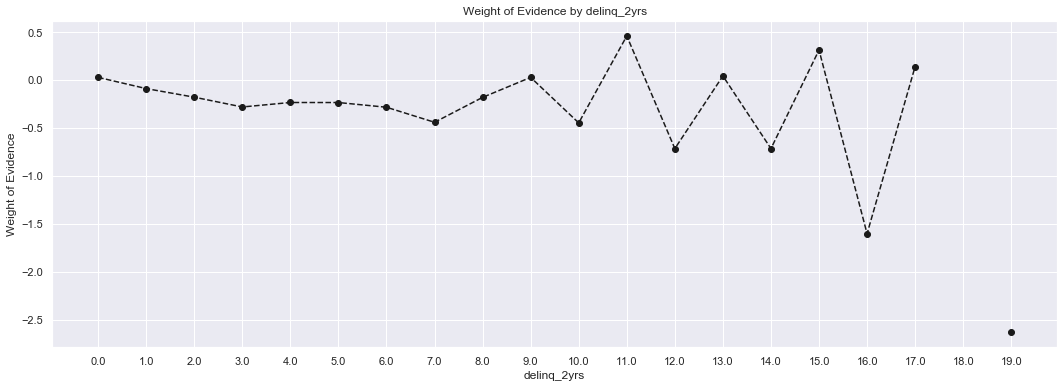

In [211]:
# We plot the weight of evidence values
plot_by_woe(df_temp12)


In [212]:
# We create the following Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [213]:
# inq_last_6mths variable
# We calculate weight of evidence.
df_temp13 = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp13

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  276261   0.893326    0.611016  246791.0  29470.0   
1              1.0  116948   0.858570    0.258658  100408.0  16540.0   
2              2.0   39994   0.827099    0.088456   33079.0   6915.0   
3              3.0   13839   0.793338    0.030608   10979.0   2860.0   
4              4.0    3501   0.748072    0.007743    2619.0    882.0   
5              5.0    1254   0.765550    0.002774     960.0    294.0   
6              6.0     238   0.722689    0.000526     172.0     66.0   
7              7.0      46   0.586957    0.000102      27.0     19.0   
8              8.0      24   0.583333    0.000053      14.0     10.0   
9              9.0       8   0.625000    0.000018       5.0      3.0   
10            10.0       9   0.777778    0.000020       7.0      2.0   
11            11.0       1   1.000000    0.000002       1.0      0.0   
12            12.0       4   0.750000    0.000009       3.0      1.0   
13            13.0       1   1.000000    0.000002       1.0      0.0   
14            14.0       2   0.000000    0.000004       0.0      2.0   
15            15.0       2   0.500000    0.000004       1.0      1.0   
16            19.0       1   1.000000    0.000002       1.0      0.0   
17            24.0       1   1.000000    0.000002       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.624678    0.516429  0.190300             NaN       NaN  inf  
1      0.254153    0.289845 -0.131409        0.034756  0.321709  inf  
2      0.083730    0.121178 -0.369664        0.031471  0.238255  inf  
3      0.027790    0.050118 -0.589707        0.033761  0.220043  inf  
4      0.006629    0.015456 -0.846514        0.045266  0.256807  inf  
5      0.002430    0.005152 -0.751516        0.017478  0.094998  inf  
6      0.000435    0.001157 -0.977030        0.042861  0.225514  inf  
7      0.000068    0.000333 -1.583472        0.135733  0.606442  inf  
8      0.000035    0.000175 -1.598397        0.003623  0.014926  inf  
9      0.000013    0.000053 -1.424044        0.041667  0.174353  inf  
10     0.000018    0.000035 -0.682106        0.152778  0.741937  inf  
11     0.000003    0.000000       inf        0.222222       inf  inf  
12     0.000008    0.000018 -0.836257        0.250000       inf  inf  
13     0.000003    0.000000       inf        0.250000       inf  inf  
14     0.000000    0.000035      -inf        1.000000       inf  inf  
15     0.000003    0.000018 -1.934869        0.500000       inf  inf  
16     0.000003    0.000000       inf        0.500000       inf  inf  
17     0.000003    0.000000       inf        0.000000       NaN  inf

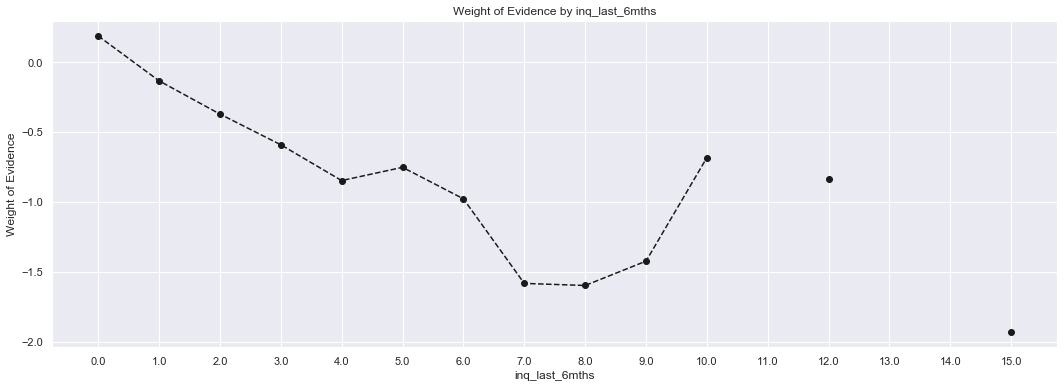

In [214]:
# We plot the weight of evidence values
plot_by_woe(df_temp13)

In [215]:
# We create the following Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [216]:
# open_acc variable
# We calculate weight of evidence.
df_temp14 = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp14

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0     18   0.833333    0.000040     15.0     3.0     0.000038   
1        1.0    341   0.882698    0.000754    301.0    40.0     0.000762   
2        2.0   2102   0.901047    0.004649   1894.0   208.0     0.004794   
3        3.0   6329   0.894138    0.013998   5659.0   670.0     0.014324   
4        4.0  13534   0.892641    0.029934  12081.0  1453.0     0.030579   
..       ...    ...        ...         ...      ...     ...          ...   
65      69.0      1   1.000000    0.000002      1.0     0.0     0.000003   
66      77.0      1   1.000000    0.000002      1.0     0.0     0.000003   
67      78.0      1   1.000000    0.000002      1.0     0.0     0.000003   
68      90.0      1   1.000000    0.000002      1.0     0.0     0.000003   
69      94.0      1   1.000000    0.000002      1.0     0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000053 -0.325432             NaN       NaN  inf  
1     0.000701  0.083361        0.049365  0.408793  inf  
2     0.003645  0.274039        0.018349  0.190677  inf  
3     0.011741  0.198855        0.006909  0.075183  inf  
4     0.025462  0.183134        0.001497  0.015721  inf  
..         ...       ...             ...       ...  ...  
65    0.000000       inf        0.000000       NaN  inf  
66    0.000000       inf        0.000000       NaN  inf  
67    0.000000       inf        0.000000       NaN  inf  
68    0.000000       inf        0.000000       NaN  inf  
69    0.000000       inf        0.000000       NaN  inf  

[70 rows x 12 columns]

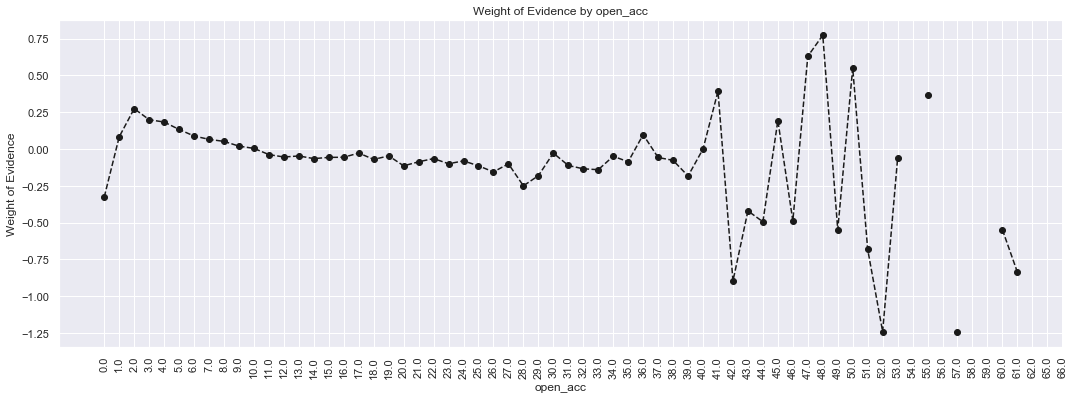

In [217]:
# We plot the weight of evidence values
plot_by_woe(df_temp14, 90)

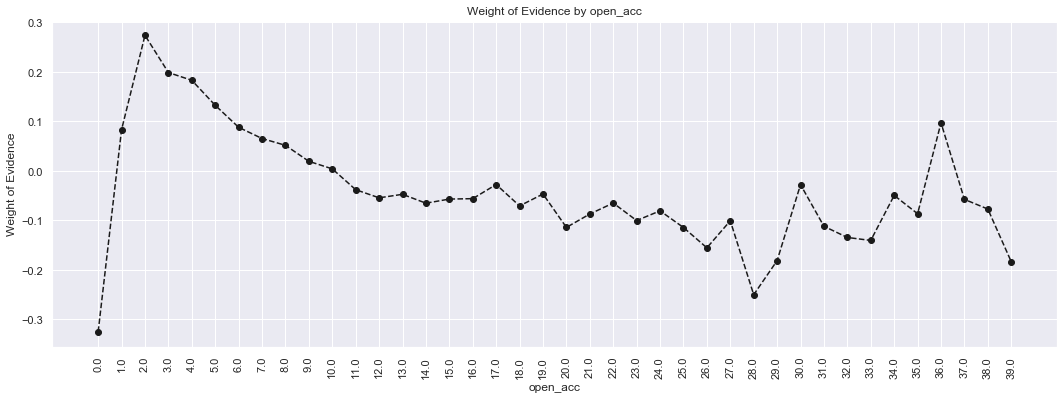

In [218]:
# We plot the weight of evidence values
plot_by_woe(df_temp14.iloc[ : 40, :], 90)


In [219]:
# We create the following Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [220]:
# pub_rec variable
# We calculate weight of evidence
df_temp15 = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp15

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  380050   0.878887    0.840569  334021.0  46029.0     0.845475   
1       1.0   61463   0.850382    0.135940   52267.0   9196.0     0.132298   
2       2.0    6896   0.818735    0.015252    5646.0   1250.0     0.014291   
3       3.0    2163   0.850670    0.004784    1840.0    323.0     0.004657   
4       4.0     749   0.813084    0.001657     609.0    140.0     0.001542   
5       5.0     378   0.838624    0.000836     317.0     61.0     0.000802   
6       6.0     180   0.833333    0.000398     150.0     30.0     0.000380   
7       7.0      81   0.802469    0.000179      65.0     16.0     0.000165   
8       8.0      64   0.921875    0.000142      59.0      5.0     0.000149   
9       9.0      32   0.843750    0.000071      27.0      5.0     0.000068   
10     10.0      27   0.925926    0.000060      25.0      2.0     0.000063   
11     11.0      10   0.700000    0.000022       7.0      3.0     0.000018   
12     12.0       3   1.000000    0.000007       3.0      0.0     0.000008   
13     13.0       9   1.000000    0.000020       9.0      0.0     0.000023   
14     14.0       4   0.750000    0.000009       3.0      1.0     0.000008   
15     15.0       6   0.833333    0.000013       5.0      1.0     0.000013   
16     16.0       3   0.666667    0.000007       2.0      1.0     0.000005   
17     17.0       3   1.000000    0.000007       3.0      0.0     0.000008   
18     18.0       3   1.000000    0.000007       3.0      0.0     0.000008   
19     19.0       3   0.666667    0.000007       2.0      1.0     0.000005   
20     21.0       2   0.500000    0.000004       1.0      1.0     0.000003   
21     23.0       2   1.000000    0.000004       2.0      0.0     0.000005   
22     24.0       1   1.000000    0.000002       1.0      0.0     0.000003   
23     32.0       1   1.000000    0.000002       1.0      0.0     0.000003   
24     37.0       1   1.000000    0.000002       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.806607  0.047063             NaN       NaN  inf  
1     0.161150 -0.197273        0.028505  0.244336  inf  
2     0.021905 -0.427066        0.031646  0.229793  inf  
3     0.005660 -0.195001        0.031935  0.232065  inf  
4     0.002453 -0.464694        0.037586  0.269693  inf  
5     0.001069 -0.286842        0.025540  0.177852  inf  
6     0.000526 -0.325432        0.005291  0.038590  inf  
7     0.000280 -0.533071        0.030864  0.207639  inf  
8     0.000088  0.533230        0.119406  1.066301  inf  
9     0.000088 -0.248471        0.078125  0.781701  inf  
10    0.000035  0.590859        0.082176  0.839330  inf  
11    0.000053 -1.087572        0.225926  1.678431  inf  
12    0.000000       inf        0.300000       inf  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000018 -0.836257        0.250000       inf  inf  
15    0.000018 -0.325432        0.083333  0.510826  inf  
16    0.000018 -1.241722        0.166667  0.916291  inf  
17    0.000000       inf        0.333333       inf  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000018 -1.241722        0.333333       inf  inf  
20    0.000018 -1.934869        0.166667  0.693147  inf  
21    0.000000       inf        0.500000       inf  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf  
24    0.000000       inf        0.000000       NaN  inf

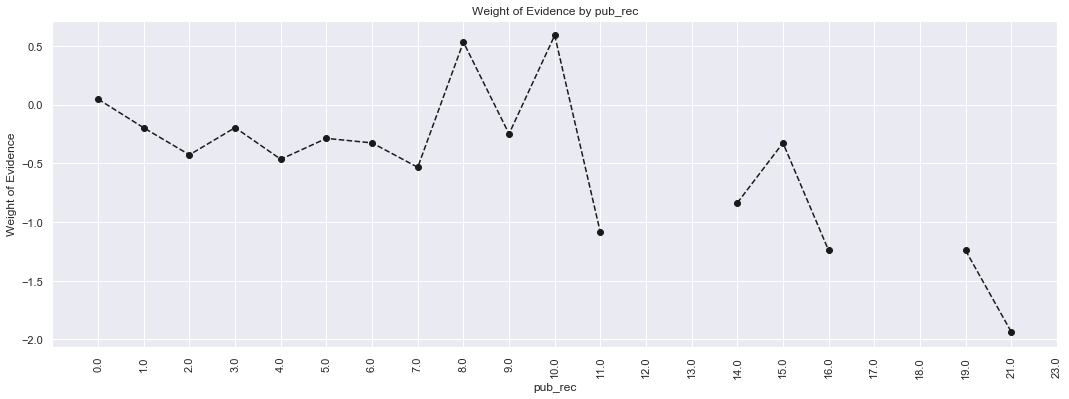

In [221]:
# We plot the weight of evidence values.
plot_by_woe(df_temp15, 90)

In [222]:
# We create the following Categories: '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [223]:
# total_acc variable
df_inputs_prepr['total_acc'].unique()

array([ 22.,  25.,  15.,  48.,  11.,   9.,   8.,  12.,  19.,  27.,  53.,
        34.,  32.,  21.,  28.,  33.,  40.,  23.,  46.,  16.,  26.,  10.,
        24.,  18.,  13.,  37.,  44.,  20.,  29.,   4.,  35.,  31.,  30.,
        36.,   6.,  49.,  17.,  14.,  38.,  55.,  52.,   7.,  56.,  45.,
         5.,  51.,  41.,  47.,  42.,  65.,  50.,  43.,  64.,  58.,   2.,
        54.,  61.,  39.,  59.,   3.,  75.,  62.,  67.,  63.,  66.,  71.,
        60.,  57.,  91.,  74.,  81., 101.,  68.,  73.,  77.,  87.,  83.,
        86.,  69.,  70.,  76.,  89.,  80.,  96.,  82.,  72.,  85.,  79.,
        88., 118., 100.,  98., 133., 120.,  84.,  78.,  99.,  95.,  90.,
       115.,   0., 105., 122., 116., 124., 107., 111.,  92.,  97., 102.,
       123.,  93., 127.,  94., 109., 106.,   1., 112., 103., 130., 160.,
       125., 108., 121., 169., 119., 110., 157., 145.])

In [224]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [225]:
# We calculate weight of evidence
df_temp16 = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp16

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.169, 3.38]   1120   0.899107    0.002477   1007.0   113.0   
1       (3.38, 6.76]  10007   0.892875    0.022133   8935.0  1072.0   
2      (6.76, 10.14]  33552   0.880246    0.074208  29534.0  4018.0   
3     (10.14, 13.52]  39005   0.879656    0.086269  34311.0  4694.0   
4      (13.52, 16.9]  46270   0.876616    0.102337  40561.0  5709.0   
5      (16.9, 20.28]  65815   0.876867    0.145565  57711.0  8104.0   
6     (20.28, 23.66]  47788   0.875555    0.105694  41841.0  5947.0   
7     (23.66, 27.04]  56982   0.871995    0.126029  49688.0  7294.0   
8     (27.04, 30.42]  34982   0.871820    0.077371  30498.0  4484.0   
9      (30.42, 33.8]  28924   0.867204    0.063972  25083.0  3841.0   
10     (33.8, 37.18]  28964   0.870356    0.064061  25209.0  3755.0   
11    (37.18, 40.56]  15828   0.863849    0.035007  13673.0  2155.0   
12    (40.56, 43.94]  11875   0.866611    0.026264  10291.0  1584.0   
13    (43.94, 47.32]  11155   0.861407    0.024672   9609.0  1546.0   
14     (47.32, 50.7]   5769   0.863581    0.012759   4982.0   787.0   
15     (50.7, 54.08]   5235   0.868386    0.011578   4546.0   689.0   
16    (54.08, 57.46]   2548   0.862245    0.005635   2197.0   351.0   
17    (57.46, 60.84]   1841   0.853884    0.004072   1572.0   269.0   
18    (60.84, 64.22]   1942   0.857364    0.004295   1665.0   277.0   
19     (64.22, 67.6]    753   0.852590    0.001665    642.0   111.0   
20     (67.6, 70.98]    508   0.872047    0.001124    443.0    65.0   
21    (70.98, 74.36]    461   0.852495    0.001020    393.0    68.0   
22    (74.36, 77.74]    227   0.823789    0.000502    187.0    40.0   
23    (77.74, 81.12]    207   0.845411    0.000458    175.0    32.0   
24     (81.12, 84.5]     87   0.850575    0.000192     74.0    13.0   
25     (84.5, 87.88]     84   0.821429    0.000186     69.0    15.0   
26    (87.88, 91.26]     86   0.883721    0.000190     76.0    10.0   
27    (91.26, 94.64]     25   0.880000    0.000055     22.0     3.0   
28    (94.64, 98.02]     29   0.586207    0.000064     17.0    12.0   
29    (98.02, 101.4]     16   0.937500    0.000035     15.0     1.0   
30   (101.4, 104.78]      8   0.875000    0.000018      7.0     1.0   
31  (104.78, 108.16]     17   0.941176    0.000038     16.0     1.0   
32  (108.16, 111.54]      4   1.000000    0.000009      4.0     0.0   
33  (111.54, 114.92]      1   1.000000    0.000002      1.0     0.0   
34   (114.92, 118.3]      3   1.000000    0.000007      3.0     0.0   
35   (118.3, 121.68]      3   0.333333    0.000007      1.0     2.0   
36  (121.68, 125.06]      4   0.750000    0.000009      3.0     1.0   
37  (125.06, 128.44]      1   1.000000    0.000002      1.0     0.0   
38  (128.44, 131.82]      1   1.000000    0.000002      1.0     0.0   
39   (131.82, 135.2]      3   1.000000    0.000007      3.0     0.0   
40   (135.2, 138.58]      0        NaN    0.000000      NaN     NaN   
41  (138.58, 141.96]      0        NaN    0.000000      NaN     NaN   
42  (141.96, 145.34]      1   1.000000    0.000002      1.0     0.0   
43  (145.34, 148.72]      0        NaN    0.000000      NaN     NaN   
44   (148.72, 152.1]      0        NaN    0.000000      NaN     NaN   
45   (152.1, 155.48]      0        NaN    0.000000      NaN     NaN   
46  (155.48, 158.86]      1   1.000000    0.000002      1.0     0.0   
47  (158.86, 162.24]      1   1.000000    0.000002      1.0     0.0   
48  (162.24, 165.62]      0        NaN    0.000000      NaN     NaN   
49   (165.62, 169.0]      1   0.000000    0.000002      0.0     1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.002549    0.001980  0.252474             NaN       NaN  inf  
1      0.022616    0.018786  0.185581        0.006232  0.066893  inf  
2      0.074757    0.070411  0.059888        0.012629  0.125692  inf  
3      0.086848    0.082257  0.054311        0.000589  0.005577  inf  
4      0.102668    0.100044

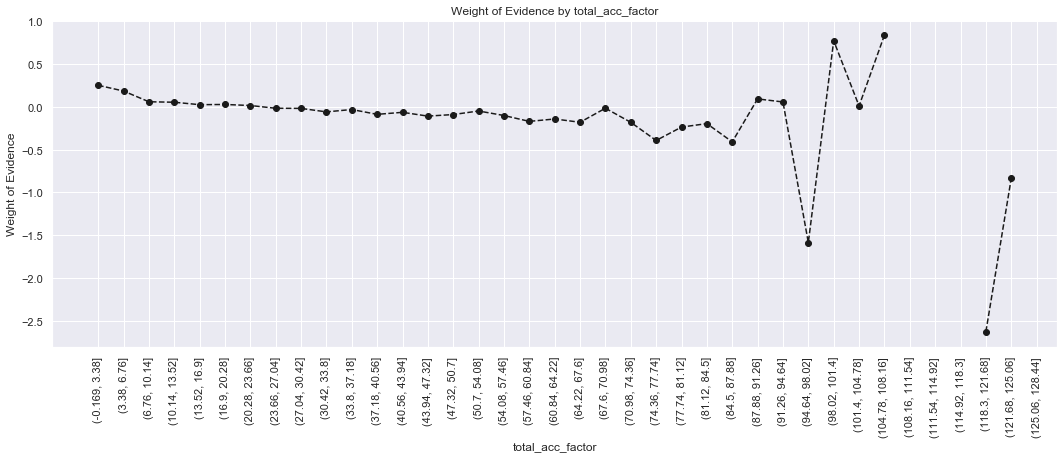

In [226]:
# We plot the weight of evidence values
plot_by_woe(df_temp16, 90)

In [227]:
# We create the following Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [228]:
# acc_now_delinq variable
# We calculate weight of evidence.
df_temp17 = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp17

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  450455   0.873892    0.996286  393649.0  56806.0   
1             1.0    1581   0.848197    0.003497    1341.0    240.0   
2             2.0      85   0.788235    0.000188      67.0     18.0   
3             3.0      10   0.900000    0.000022       9.0      1.0   
4             4.0       1   1.000000    0.000002       1.0      0.0   
5             6.0       1   1.000000    0.000002       1.0      0.0   
6             7.0       1   1.000000    0.000002       1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996406    0.995461  0.000948             NaN       NaN  inf  
1     0.003394    0.004206 -0.214338        0.025695  0.215286  inf  
2     0.000170    0.000315 -0.620549        0.059962  0.406211  inf  
3     0.000023    0.000018  0.262355        0.111765  0.882904  inf  
4     0.000003    0.000000       inf        0.100000       inf  inf  
5     0.000003    0.000000       inf        0.000000       NaN  inf  
6     0.000003    0.000000       inf        0.000000       NaN  inf

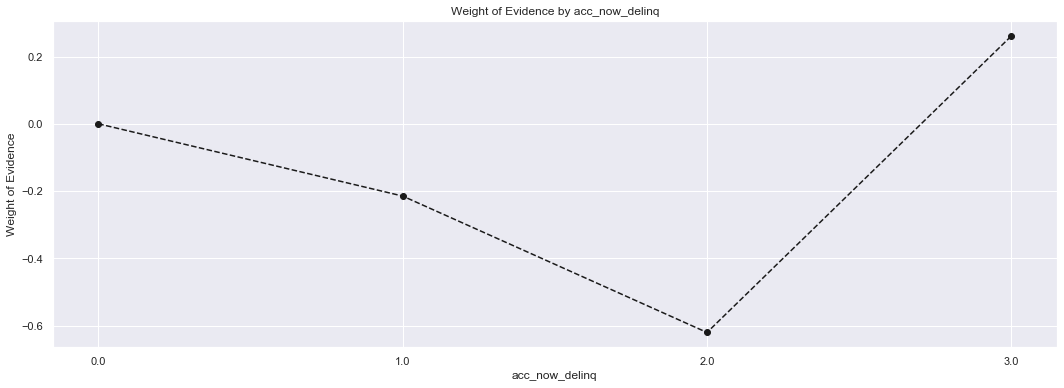

In [229]:
# We plot the weight of evidence values
plot_by_woe(df_temp17)

In [230]:
# We create the following Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [231]:
# total_rev_hi_lim variable
df_inputs_prepr['total_rev_hi_lim'].unique()

array([16700., 56500., 72300., ..., 25190., 32150., 23835.])

In [232]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

In [233]:
# We calculate weight of evidence.
df_temp18 = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp18

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  17158   0.852430    0.037949  14626.0   
1             (5000.0, 9999.999]  46898   0.849972    0.103726  39862.0   
2          (9999.999, 14999.998]  58172   0.852231    0.128661  49576.0   
3         (14999.998, 19999.998]  56311   0.855233    0.124545  48159.0   
4         (19999.998, 24999.997]  48776   0.863437    0.107880  42115.0   
...                          ...    ...        ...         ...      ...   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000      NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000      NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000      NaN   
1998    (9989999.001, 9994999.0]      0        NaN    0.000000      NaN   
1999      (9994999.0, 9999999.0]      1   1.000000    0.000002      1.0   

       n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     2532.0     0.037021    0.044370 -0.181078             NaN       NaN  inf  
1     7036.0     0.100899    0.123298 -0.200486        0.002458  0.019408  inf  
2     8596.0     0.125487    0.150635 -0.182660        0.002259  0.017826  inf  
3     8152.0     0.121900    0.142855 -0.158625        0.003001  0.024035  inf  
4     6661.0     0.106602    0.116727 -0.090735        0.008204  0.067890  inf  
...      ...          ...         ...       ...             ...       ...  ...  
1995     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1996     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1997     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1998     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.0     0.000003    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

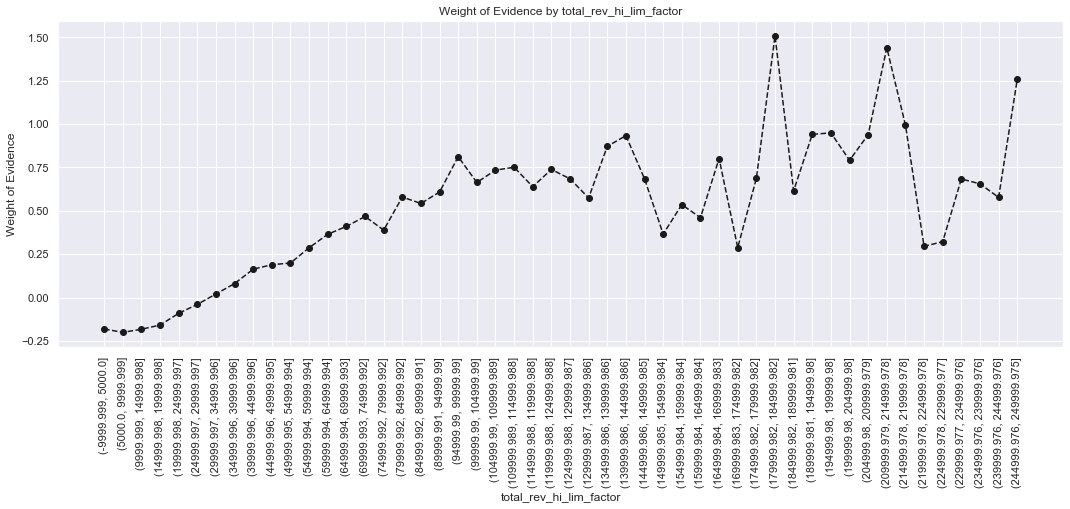

In [234]:
# We plot the weight of evidence values.
plot_by_woe(df_temp18.iloc[: 50, : ], 90)

In [235]:
# We create the following Categories:'<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [236]:
# installment variable
df_inputs_prepr['installment'].unique()

array([1164.51,  648.54,  466.53, ...,  960.57,  329.41,  396.88])

In [237]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

In [238]:
# We calculate weight of evidence.
df_temp19 = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp19

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0        (13.99, 49.685]   3715   0.917900    0.008217   3410.0   305.0   
1       (49.685, 83.679]   8530   0.906917    0.018866   7736.0   794.0   
2      (83.679, 117.674]  12644   0.902721    0.027965  11414.0  1230.0   
3     (117.674, 151.668]  14071   0.898870    0.031121  12648.0  1423.0   
4     (151.668, 185.663]  25709   0.898985    0.056861  23112.0  2597.0   
5     (185.663, 219.658]  24433   0.895224    0.054039  21873.0  2560.0   
6     (219.658, 253.652]  25226   0.888012    0.055793  22401.0  2825.0   
7     (253.652, 287.647]  29000   0.864759    0.064140  25078.0  3922.0   
8     (287.647, 321.641]  30522   0.885656    0.067507  27032.0  3490.0   
9     (321.641, 355.636]  33278   0.865016    0.073602  28786.0  4492.0   
10    (355.636, 389.631]  26780   0.865459    0.059230  23177.0  3603.0   
11    (389.631, 423.625]  19947   0.859127    0.044117  17137.0  2810.0   
12     (423.625, 457.62]  15986   0.865195    0.035357  13831.0  2155.0   
13     (457.62, 491.614]  22446   0.872628    0.049645  19587.0  2859.0   
14    (491.614, 525.609]  18709   0.853065    0.041379  15960.0  2749.0   
15    (525.609, 559.604]  15255   0.848443    0.033740  12943.0  2312.0   
16    (559.604, 593.598]  12730   0.845169    0.028155  10759.0  1971.0   
17    (593.598, 627.593]  13096   0.877291    0.028965  11489.0  1607.0   
18    (627.593, 661.587]  13199   0.871581    0.029193  11504.0  1695.0   
19    (661.587, 695.582]  11401   0.852820    0.025216   9723.0  1678.0   
20    (695.582, 729.577]   7298   0.848452    0.016141   6192.0  1106.0   
21    (729.577, 763.571]   8404   0.885888    0.018587   7445.0   959.0   
22    (763.571, 797.566]   8905   0.881752    0.019695   7852.0  1053.0   
23     (797.566, 831.56]   6129   0.869962    0.013556   5332.0   797.0   
24     (831.56, 865.555]   6277   0.871117    0.013883   5468.0   809.0   
25     (865.555, 899.55]   5742   0.846047    0.012700   4858.0   884.0   
26     (899.55, 933.544]   4457   0.867624    0.009858   3867.0   590.0   
27    (933.544, 967.539]   3798   0.856767    0.008400   3254.0   544.0   
28   (967.539, 1001.533]   3471   0.853933    0.007677   2964.0   507.0   
29  (1001.533, 1035.528]   2373   0.830594    0.005248   1971.0   402.0   
30  (1035.528, 1069.523]   2262   0.852785    0.005003   1929.0   333.0   
31  (1069.523, 1103.517]   2948   0.896540    0.006520   2643.0   305.0   
32  (1103.517, 1137.512]   2148   0.895251    0.004751   1923.0   225.0   
33  (1137.512, 1171.506]   2047   0.870542    0.004527   1782.0   265.0   
34  (1171.506, 1205.501]   2692   0.876672    0.005954   2360.0   332.0   
35  (1205.501, 1239.496]   2212   0.902803    0.004892   1997.0   215.0   
36   (1239.496, 1273.49]   1759   0.852757    0.003890   1500.0   259.0   
37   (1273.49, 1307.485]   1108   0.849278    0.002451    941.0   167.0   
38  (1307.485, 1341.479]    622   0.872990    0.001376    543.0    79.0   
39  (1341.479, 1375.474]    374   0.831551    0.000827    311.0    63.0   
40  (1375.474, 1409.469]    203   0.812808    0.000449    165.0    38.0   
41  (1409.469, 1443.463]     79   0.797468    0.000175     63.0    16.0   
42  (1443.463, 1477.458]     53   0.811321    0.000117     43.0    10.0   
43  (1477.458, 1511.452]     61   0.655738    0.000135     40.0    21.0   
44  (1511.452, 1545.447]     13   0.692308    0.000029      9.0     4.0   
45  (1545.447, 1579.442]     12   0.666667    0.000027      8.0     4.0   
46  (1579.442, 1613.436]      5   1.000000    0.000011      5.0     0.0   
47  (1613.436, 1647.431]      4   1.000000    0.000009      4.0     0.0   
48  (1647.431, 1681.425]      0        NaN    0.000000      NaN     NaN   
49   (1681.425, 1715.42]      1   0.000000    0.000002      0.0     1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.008631    0.005345  0.479286             NaN       NaN  inf  
1      0.019581    0.013914  0.341687 

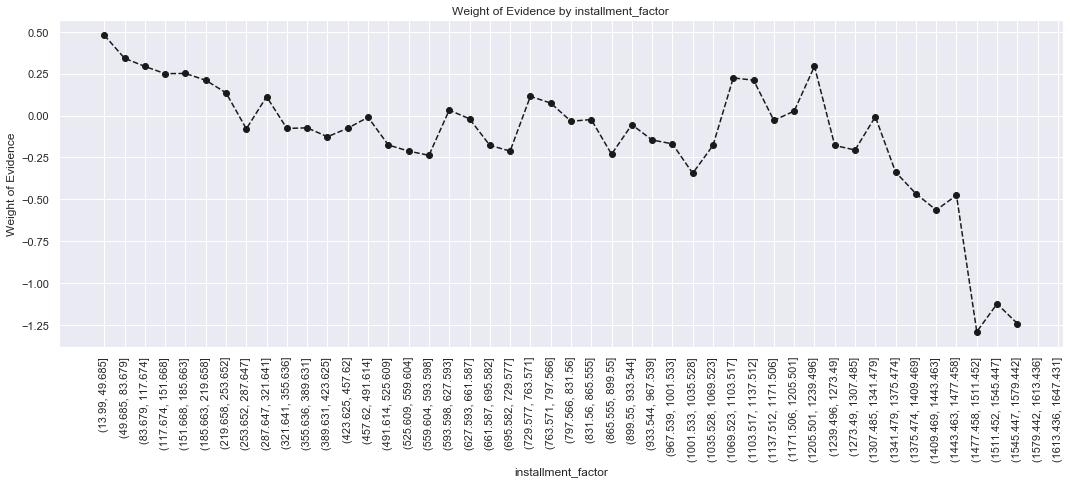

In [239]:
# We plot the weight of evidence values.
plot_by_woe(df_temp19, 90)

In [240]:
# annual_inc variable
df_inputs_prepr['annual_inc'].unique()

array([ 90000., 100000.,  58000., ...,  72469., 163776.,  94509.])

In [241]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp20

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0      (-9550.0, 191000.0]  438537   0.872278    0.969927  382526.0  56011.0   
1     (191000.0, 382000.0]   11861   0.921592    0.026233   10931.0    930.0   
2     (382000.0, 573000.0]    1174   0.925894    0.002597    1087.0     87.0   
3     (573000.0, 764000.0]     299   0.953177    0.000661     285.0     14.0   
4     (764000.0, 955000.0]     104   0.913462    0.000230      95.0      9.0   
5    (955000.0, 1146000.0]      60   0.950000    0.000133      57.0      3.0   
6   (1146000.0, 1337000.0]      26   0.961538    0.000058      25.0      1.0   
7   (1337000.0, 1528000.0]      23   0.913043    0.000051      21.0      2.0   
8   (1528000.0, 1719000.0]       3   0.666667    0.000007       2.0      1.0   
9   (1719000.0, 1910000.0]       6   1.000000    0.000013       6.0      0.0   
10  (1910000.0, 2101000.0]       4   1.000000    0.000009       4.0      0.0   
11  (2101000.0, 2292000.0]       0        NaN    0.000000       NaN      NaN   
12  (2292000.0, 2483000.0]       3   1.000000    0.000007       3.0      0.0   
13  (2483000.0, 2674000.0]       3   1.000000    0.000007       3.0      0.0   
14  (2674000.0, 2865000.0]       0        NaN    0.000000       NaN      NaN   
15  (2865000.0, 3056000.0]       2   0.500000    0.000004       1.0      1.0   
16  (3056000.0, 3247000.0]       3   0.333333    0.000007       1.0      2.0   
17  (3247000.0, 3438000.0]       0        NaN    0.000000       NaN      NaN   
18  (3438000.0, 3629000.0]       0        NaN    0.000000       NaN      NaN   
19  (3629000.0, 3820000.0]       2   1.000000    0.000004       2.0      0.0   
20  (3820000.0, 4011000.0]       2   0.500000    0.000004       1.0      1.0   
21  (4011000.0, 4202000.0]       1   1.000000    0.000002       1.0      0.0   
22  (4202000.0, 4393000.0]       3   0.666667    0.000007       2.0      1.0   
23  (4393000.0, 4584000.0]       1   1.000000    0.000002       1.0      0.0   
24  (4584000.0, 4775000.0]       1   1.000000    0.000002       1.0      0.0   
25  (4775000.0, 4966000.0]       2   0.500000    0.000004       1.0      1.0   
26  (4966000.0, 5157000.0]       2   1.000000    0.000004       2.0      0.0   
27  (5157000.0, 5348000.0]       0        NaN    0.000000       NaN      NaN   
28  (5348000.0, 5539000.0]       0        NaN    0.000000       NaN      NaN   
29  (5539000.0, 5730000.0]       1   1.000000    0.000002       1.0      0.0   
30  (5730000.0, 5921000.0]       0        NaN    0.000000       NaN      NaN   
31  (5921000.0, 6112000.0]       0        NaN    0.000000       NaN      NaN   
32  (6112000.0, 6303000.0]       0        NaN    0.000000       NaN      NaN   
33  (6303000.0, 6494000.0]       0        NaN    0.000000       NaN      NaN   
34  (6494000.0, 6685000.0]       1   1.000000    0.000002       1.0      0.0   
35  (6685000.0, 6876000.0]       2   1.000000    0.000004       2.0      0.0   
36  (6876000.0, 7067000.0]       1   1.000000    0.000002       1.0      0.0   
37  (7067000.0, 7258000.0]       0        NaN    0.000000       NaN      NaN   
38  (7258000.0, 7449000.0]       0        NaN    0.000000       NaN      NaN   
39  (7449000.0, 7640000.0]       2   0.500000    0.000004       1.0      1.0   
40  (7640000.0, 7831000.0]       1   1.000000    0.000002       1.0      0.0   
41  (7831000.0, 8022000.0]       0        NaN    0.000000       NaN      NaN   
42  (8022000.0, 8213000.0]       0        NaN    0.000000       NaN      NaN   
43  (8213000.0, 8404000.0]       0        NaN    0.000000       NaN      NaN   
44  (8404000.0, 8595000.0]       0        NaN    0.000000       NaN      NaN   
45  (8595000.0, 8786000.0]       1   1.000000    0.000002       1.0      0.0   
46  (8786000.0, 8977000.0]       0        NaN    0.000000       NaN      NaN   
47  (8977000.0, 9168000.0]       0        NaN    0.000000       NaN      NaN   
48  (9168000.0, 9359000.0]       1   1.000000    0.000002       1.0      0.0   
49  (9359

In [242]:
# Splitting the initial ‘annual income’ variable into 50 categories doesn't work well for fine classing because there are a lot of people with low income and very few people with high income.
# Thus, we do fine-classing using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp20

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       (-9550.0, 95500.0]  346173   0.864527    0.765642  299276.0  46897.0   
1      (95500.0, 191000.0]   92364   0.901325    0.204285   83250.0   9114.0   
2     (191000.0, 286500.0]    9683   0.920996    0.021416    8918.0    765.0   
3     (286500.0, 382000.0]    2178   0.924242    0.004817    2013.0    165.0   
4     (382000.0, 477500.0]     816   0.924020    0.001805     754.0     62.0   
..                     ...     ...        ...         ...       ...      ...   
95  (9072500.0, 9168000.0]       0        NaN    0.000000       NaN      NaN   
96  (9168000.0, 9263500.0]       0        NaN    0.000000       NaN      NaN   
97  (9263500.0, 9359000.0]       1   1.000000    0.000002       1.0      0.0   
98  (9359000.0, 9454500.0]       0        NaN    0.000000       NaN      NaN   
99  (9454500.0, 9550000.0]       2   1.000000    0.000004       2.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.757528    0.821817 -0.081457             NaN       NaN  inf  
1      0.210723    0.159713  0.277167        0.036798  0.358624  inf  
2      0.022573    0.013406  0.521082        0.019670  0.243915  inf  
3      0.005095    0.002891  0.566566        0.003247  0.045485  inf  
4      0.001909    0.001086  0.563389        0.000223  0.003178  inf  
..          ...         ...       ...             ...       ...  ...  
95          NaN         NaN       NaN             NaN       NaN  inf  
96          NaN         NaN       NaN             NaN       NaN  inf  
97     0.000003    0.000000       inf             NaN       NaN  inf  
98          NaN         NaN       NaN             NaN       NaN  inf  
99     0.000005    0.000000       inf             NaN       NaN  inf  

[100 rows x 12 columns]

In [243]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [244]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp20

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-140.0, 2800.0]    443   0.930023    0.001063    412.0    31.0   
1       (2800.0, 5600.0]    100   0.930000    0.000240     93.0     7.0   
2       (5600.0, 8400.0]    180   0.905556    0.000432    163.0    17.0   
3      (8400.0, 11200.0]    759   0.844532    0.001821    641.0   118.0   
4     (11200.0, 14000.0]   1235   0.855870    0.002963   1057.0   178.0   
5     (14000.0, 16800.0]   1867   0.840386    0.004480   1569.0   298.0   
6     (16800.0, 19600.0]   2167   0.849562    0.005200   1841.0   326.0   
7     (19600.0, 22400.0]   4405   0.847900    0.010570   3735.0   670.0   
8     (22400.0, 25200.0]   7408   0.850297    0.017776   6299.0  1109.0   
9     (25200.0, 28000.0]   6242   0.839635    0.014978   5241.0  1001.0   
10    (28000.0, 30800.0]   9860   0.853854    0.023659   8419.0  1441.0   
11    (30800.0, 33600.0]   9279   0.852355    0.022265   7909.0  1370.0   
12    (33600.0, 36400.0]  15238   0.852802    0.036564  12995.0  2243.0   
13    (36400.0, 39200.0]  10131   0.851051    0.024310   8622.0  1509.0   
14    (39200.0, 42000.0]  22158   0.856756    0.053169  18984.0  3174.0   
15    (42000.0, 44800.0]   7739   0.849076    0.018570   6571.0  1168.0   
16    (44800.0, 47600.0]  18294   0.856893    0.043897  15676.0  2618.0   
17    (47600.0, 50400.0]  25528   0.861720    0.061255  21998.0  3530.0   
18    (50400.0, 53200.0]  12963   0.859755    0.031105  11145.0  1818.0   
19    (53200.0, 56000.0]  19135   0.860883    0.045915  16473.0  2662.0   
20    (56000.0, 58800.0]   8197   0.862999    0.019669   7074.0  1123.0   
21    (58800.0, 61600.0]  22498   0.860921    0.053985  19369.0  3129.0   
22    (61600.0, 64400.0]  10458   0.866514    0.025094   9062.0  1396.0   
23    (64400.0, 67200.0]  18875   0.867444    0.045291  16373.0  2502.0   
24    (67200.0, 70000.0]  19015   0.873311    0.045627  16606.0  2409.0   
25    (70000.0, 72800.0]   8070   0.879182    0.019364   7095.0   975.0   
26    (72800.0, 75600.0]  16672   0.874940    0.040005  14587.0  2085.0   
27    (75600.0, 78400.0]   7182   0.884294    0.017233   6351.0   831.0   
28    (78400.0, 81200.0]  15448   0.875777    0.037068  13529.0  1919.0   
29    (81200.0, 84000.0]   7056   0.878260    0.016931   6197.0   859.0   
30    (84000.0, 86800.0]  11012   0.878133    0.026424   9670.0  1342.0   
31    (86800.0, 89600.0]   5385   0.880409    0.012921   4741.0   644.0   
32    (89600.0, 92400.0]  12900   0.885659    0.030954  11425.0  1475.0   
33    (92400.0, 95200.0]   8137   0.888903    0.019525   7233.0   904.0   
34    (95200.0, 98000.0]   5635   0.885892    0.013521   4992.0   643.0   
35   (98000.0, 100800.0]  11185   0.893876    0.026839   9998.0  1187.0   
36  (100800.0, 103600.0]   3814   0.893288    0.009152   3407.0   407.0   
37  (103600.0, 106400.0]   5778   0.903600    0.013864   5221.0   557.0   
38  (106400.0, 109200.0]   3019   0.899304    0.007244   2715.0   304.0   
39  (109200.0, 112000.0]   7596   0.900211    0.018227   6838.0   758.0   
40  (112000.0, 114800.0]   1475   0.911186    0.003539   1344.0   131.0   
41  (114800.0, 117600.0]   4169   0.908851    0.010004   3789.0   380.0   
42  (117600.0, 120400.0]   8635   0.889288    0.020720   7679.0   956.0   
43  (120400.0, 123200.0]   1369   0.909423    0.003285   1245.0   124.0   
44  (123200.0, 126000.0]   4939   0.895525    0.011851   4423.0   516.0   
45  (126000.0, 128800.0]   1061   0.896324    0.002546    951.0   110.0   
46  (128800.0, 131600.0]   4324   0.911656    0.010376   3942.0   382.0   
47  (131600.0, 134400.0]   1099   0.921747    0.002637   1013.0    86.0   
48  (134400.0, 137200.0]   2770   0.910830    0.006647   2523.0   247.0   
49  (137200.0, 140000.0]   3845   0.905852    0.009226   3483.0   362.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.001136    0.000574  0.682968             NaN       NaN  0.024418  
1      0.000256    0.000130  

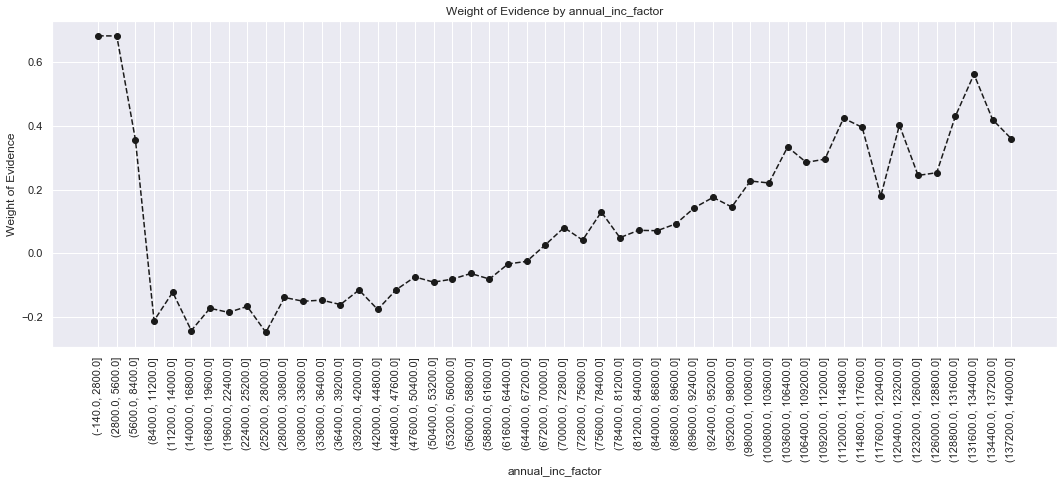

In [245]:
# We plot the weight of evidence values.
plot_by_woe(df_temp20, 90)

In [246]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [247]:
# mths_since_last_delinq variable
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


# We calculate weight of evidence.
df_temp21 = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp21

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.226, 4.52]   9659   0.852676    0.043730   8236.0   
1                   (4.52, 9.04]  19448   0.856695    0.088049  16661.0   
2                  (9.04, 13.56]  16136   0.860498    0.073054  13885.0   
3                 (13.56, 18.08]  19179   0.863288    0.086831  16557.0   
4                  (18.08, 22.6]  14904   0.862923    0.067476  12861.0   
5                  (22.6, 27.12]  17889   0.865895    0.080990  15490.0   
6                 (27.12, 31.64]  13579   0.868032    0.061477  11787.0   
7                 (31.64, 36.16]  15965   0.870655    0.072280  13900.0   
8                 (36.16, 40.68]  12200   0.869262    0.055234  10605.0   
9                  (40.68, 45.2]  14452   0.876349    0.065430  12665.0   
10                 (45.2, 49.72]  10571   0.876549    0.047859   9266.0   
11                (49.72, 54.24]   9585   0.873865    0.043395   8376.0   
12                (54.24, 58.76]   7643   0.866937    0.034603   6626.0   
13                (58.76, 63.28]   9271   0.869270    0.041973   8059.0   
14                 (63.28, 67.8]   7406   0.874426    0.033530   6476.0   
15                 (67.8, 72.32]   8716   0.864961    0.039461   7539.0   
16                (72.32, 76.84]   6433   0.875797    0.029125   5634.0   
17                (76.84, 81.36]   6685   0.876290    0.030266   5858.0   
18                (81.36, 85.88]    627   0.861244    0.002839    540.0   
19                 (85.88, 90.4]    135   0.881481    0.000611    119.0   
20                 (90.4, 94.92]     86   0.918605    0.000389     79.0   
21                (94.92, 99.44]     76   0.921053    0.000344     70.0   
22               (99.44, 103.96]     47   0.872340    0.000213     41.0   
23              (103.96, 108.48]     56   0.892857    0.000254     50.0   
24               (108.48, 113.0]     39   0.948718    0.000177     37.0   
25               (113.0, 117.52]     35   0.885714    0.000158     31.0   
26              (117.52, 122.04]     16   0.875000    0.000072     14.0   
27              (122.04, 126.56]      5   0.800000    0.000023      4.0   
28              (126.56, 131.08]      6   0.833333    0.000027      5.0   
29               (131.08, 135.6]      6   1.000000    0.000027      6.0   
30               (135.6, 140.12]      4   1.000000    0.000018      4.0   
31              (140.12, 144.64]      2   1.000000    0.000009      2.0   
32              (144.64, 149.16]      4   0.750000    0.000018      3.0   
33              (149.16, 153.68]      4   1.000000    0.000018      4.0   
34               (153.68, 158.2]      4   1.000000    0.000018      4.0   
35               (158.2, 162.72]      1   1.000000    0.000005      1.0   
36              (162.72, 167.24]      0        NaN    0.000000      NaN   
37              (167.24, 171.76]      1   1.000000    0.000005      1.0   
38              (171.76, 176.28]      0        NaN    0.000000      NaN   
39               (176.28, 180.8]      0        NaN    0.000000      NaN   
40               (180.8, 185.32]      0        NaN    0.000000      NaN   
41              (185.32, 189.84]      1   1.000000    0.000005      1.0   
42              (189.84, 194.36]      0        NaN    0.000000      NaN   
43              (194.36, 198.88]      0        NaN    0.000000      NaN   
44               (198.88, 203.4]      1   0.000000    0.000005      0.0   
45               (203.4, 207.92]      0        NaN    0.000000      NaN   
46              (207.92, 212.44]      0        NaN    0.000000      NaN   
47              (212.44, 216.96]      0        NaN    0.000000      NaN   
48              (216.96, 221.48]      0        NaN    0.000000      NaN   
49               (221.48, 226.0]      1   0.000000    0.000005      0.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   1423.0     0.043009    0.048433 -0.118776             NaN       NaN  inf  
1   2787.0     0.08

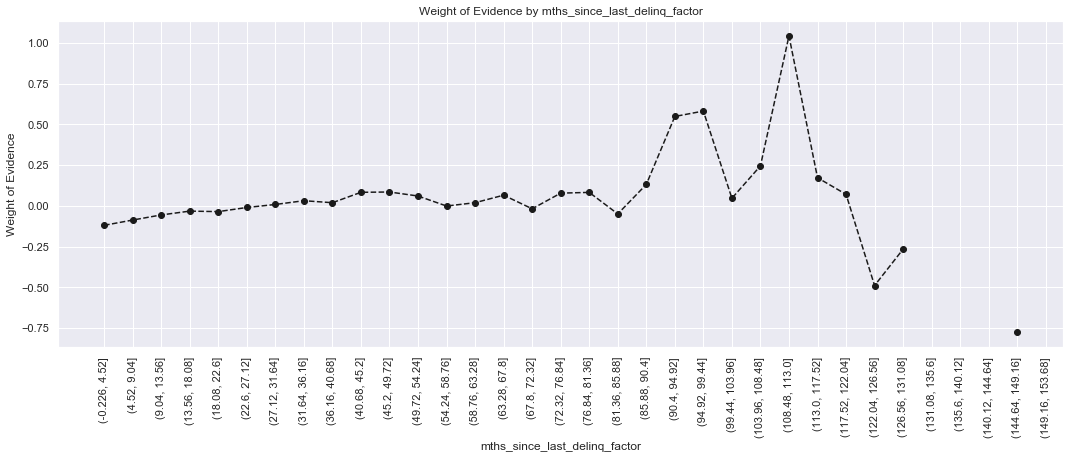

In [248]:
# We plot the weight of evidence values.
plot_by_woe(df_temp21, 90)

In [249]:
# We create the following Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [250]:
# dti variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

# We calculate weight of evidence.
df_temp22 = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp22

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


dti_factor   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0      (-2.0, 9.0]   66827   0.903796    0.147918   60398.0   6429.0   
1      (9.0, 19.0]  180477   0.886806    0.399476  160048.0  20429.0   
2     (19.0, 29.0]  145332   0.858400    0.321685  124753.0  20579.0   
3     (29.0, 39.0]   51962   0.831165    0.115015   43189.0   8773.0   
4     (39.0, 49.0]    4198   0.860172    0.009292    3611.0    587.0   
..             ...     ...        ...         ...       ...      ...   
95  (949.0, 959.0]       0        NaN    0.000000       NaN      NaN   
96  (959.0, 969.0]       0        NaN    0.000000       NaN      NaN   
97  (969.0, 979.0]       0        NaN    0.000000       NaN      NaN   
98  (979.0, 989.0]       0        NaN    0.000000       NaN      NaN   
99  (989.0, 999.0]      32   0.875000    0.000071      28.0      4.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.153006    0.112708  0.305672             NaN       NaN  inf  
1      0.405449    0.358146  0.124054        0.016991  0.181619  inf  
2      0.316036    0.360776 -0.132400        0.028405  0.256454  inf  
3      0.109410    0.153802 -0.340558        0.027235  0.208158  inf  
4      0.009148    0.010291 -0.117749        0.029006  0.222808  inf  
..          ...         ...       ...             ...       ...  ...  
95          NaN         NaN       NaN             NaN       NaN  inf  
96          NaN         NaN       NaN             NaN       NaN  inf  
97          NaN         NaN       NaN             NaN       NaN  inf  
98          NaN         NaN       NaN             NaN       NaN  inf  
99     0.000071    0.000070  0.011446             NaN       NaN  inf  

[100 rows x 12 columns]

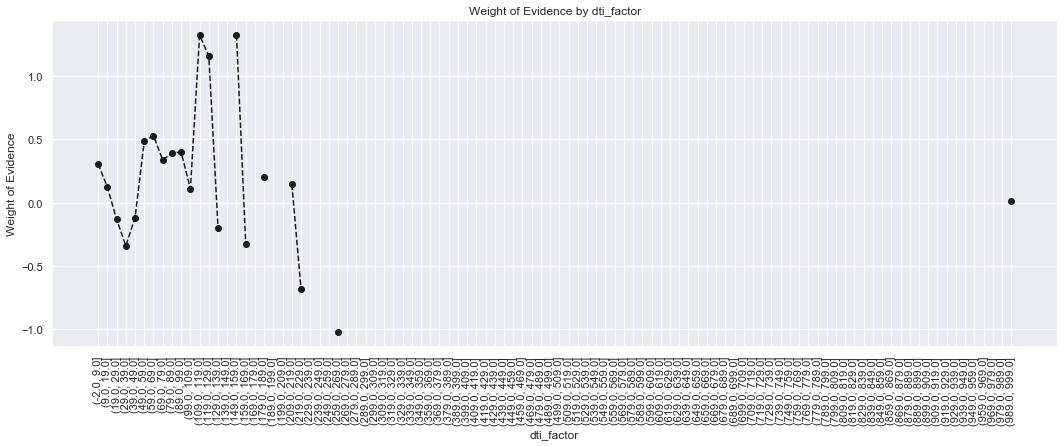

In [251]:
# We plot the weight of evidence values.
plot_by_woe(df_temp22, 90)

In [252]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [253]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


# We calculate weight of evidence.
df_temp22 = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp22

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dti_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0   (-1.036, -0.28]      1   1.000000    0.000002      1.0     0.0   
1     (-0.28, 0.44]    859   0.877765    0.001975    754.0   105.0   
2      (0.44, 1.16]   1916   0.911795    0.004404   1747.0   169.0   
3      (1.16, 1.88]   2367   0.904943    0.005441   2142.0   225.0   
4       (1.88, 2.6]   2948   0.897897    0.006777   2647.0   301.0   
5       (2.6, 3.32]   3599   0.904696    0.008273   3256.0   343.0   
6      (3.32, 4.04]   4327   0.908251    0.009947   3930.0   397.0   
7      (4.04, 4.76]   5034   0.908423    0.011572   4573.0   461.0   
8      (4.76, 5.48]   5914   0.908691    0.013595   5374.0   540.0   
9       (5.48, 6.2]   6697   0.900403    0.015394   6030.0   667.0   
10      (6.2, 6.92]   7453   0.901650    0.017132   6720.0   733.0   
11     (6.92, 7.64]   8166   0.903502    0.018771   7378.0   788.0   
12     (7.64, 8.36]   8904   0.898248    0.020468   7998.0   906.0   
13     (8.36, 9.08]   9780   0.905521    0.022481   8856.0   924.0   
14      (9.08, 9.8]  10313   0.897120    0.023707   9252.0  1061.0   
15     (9.8, 10.52]  11291   0.898592    0.025955  10146.0  1145.0   
16   (10.52, 11.24]  11812   0.900017    0.027152  10631.0  1181.0   
17   (11.24, 11.96]  12046   0.895318    0.027690  10785.0  1261.0   
18   (11.96, 12.68]  13190   0.895679    0.030320  11814.0  1376.0   
19    (12.68, 13.4]  13108   0.892051    0.030132  11693.0  1415.0   
20    (13.4, 14.12]  13965   0.889295    0.032102  12419.0  1546.0   
21   (14.12, 14.84]  14169   0.888348    0.032570  12587.0  1582.0   
22   (14.84, 15.56]  13426   0.886191    0.030863  11898.0  1528.0   
23   (15.56, 16.28]  14056   0.880976    0.032311  12383.0  1673.0   
24    (16.28, 17.0]  13882   0.879196    0.031911  12205.0  1677.0   
25    (17.0, 17.72]  13943   0.876784    0.032051  12225.0  1718.0   
26   (17.72, 18.44]  13638   0.869776    0.031350  11862.0  1776.0   
27   (18.44, 19.16]  13446   0.873271    0.030908  11742.0  1704.0   
28   (19.16, 19.88]  13086   0.871848    0.030081  11409.0  1677.0   
29    (19.88, 20.6]  12793   0.865004    0.029407  11066.0  1727.0   
30    (20.6, 21.32]  12702   0.865848    0.029198  10998.0  1704.0   
31   (21.32, 22.04]  11958   0.867787    0.027488  10377.0  1581.0   
32   (22.04, 22.76]  11538   0.863581    0.026523   9964.0  1574.0   
33   (22.76, 23.48]  11362   0.861292    0.026118   9786.0  1576.0   
34    (23.48, 24.2]  10733   0.858567    0.024672   9215.0  1518.0   
35    (24.2, 24.92]  10033   0.852188    0.023063   8550.0  1483.0   
36   (24.92, 25.64]   9630   0.846729    0.022137   8154.0  1476.0   
37   (25.64, 26.36]   9230   0.847021    0.021217   7818.0  1412.0   
38   (26.36, 27.08]   8559   0.850567    0.019675   7280.0  1279.0   
39    (27.08, 27.8]   7919   0.848087    0.018204   6716.0  1203.0   
40    (27.8, 28.52]   7875   0.841270    0.018102   6625.0  1250.0   
41   (28.52, 29.24]   7371   0.841406    0.016944   6202.0  1169.0   
42   (29.24, 29.96]   6699   0.845052    0.015399   5661.0  1038.0   
43   (29.96, 30.68]   5858   0.834244    0.013466   4887.0   971.0   
44    (30.68, 31.4]   5482   0.835097    0.012602   4578.0   904.0   
45    (31.4, 32.12]   4996   0.829664    0.011484   4145.0   851.0   
46   (32.12, 32.84]   4699   0.822303    0.010802   3864.0   835.0   
47   (32.84, 33.56]   4355   0.822273    0.010011   3581.0   774.0   
48   (33.56, 34.28]   4134   0.826802    0.009503   3418.0   716.0   
49    (34.28, 35.0]   3764   0.814825    0.008652   3067.0   697.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000003    0.000000       inf             NaN       NaN  inf  
1      0.001982    0.001922  0.030530        0.122235       inf  inf  
2      0.004592    0.003094  0.394855        0.034031  0.364325  inf  
3      0.005631    0.004120  0.312493        0.006852  0.082362  inf  
4      0.006958    0.005511  0.233170        0.007046  0.079323  inf  
5      0.008

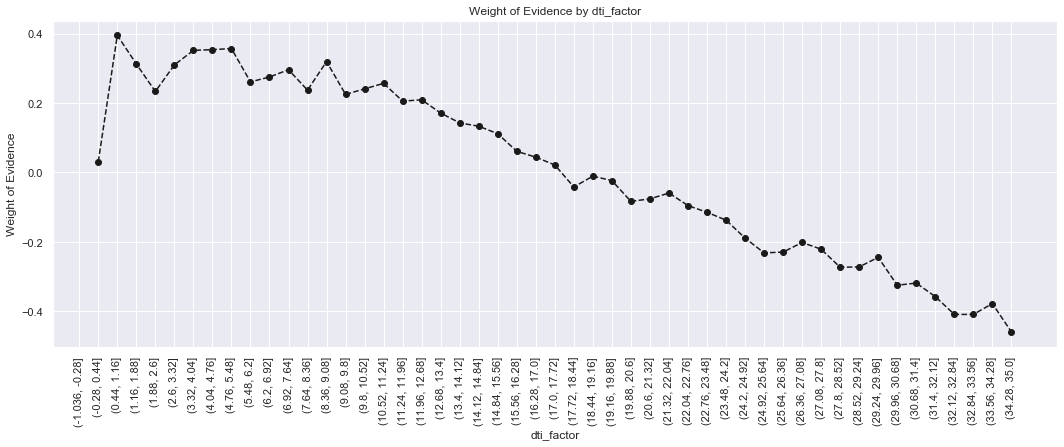

In [254]:
# We plot the weight of evidence values.
plot_by_woe(df_temp22, 90)


In [255]:
# We create the following Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [256]:
# mths_since_last_record variable
# We have to create one category for missing values and do fine and coarse classing for the rest.
#sum(loan_data_temp['mths_since_last_record'].isnull())

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# We calculate weight of evidence.
df_temp23 = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp23

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                  (-0.125, 2.5]    323   0.801858    0.004465   259.0   64.0   
1                     (2.5, 5.0]    229   0.803493    0.003166   184.0   45.0   
2                     (5.0, 7.5]    215   0.823256    0.002972   177.0   38.0   
3                    (7.5, 10.0]    385   0.823377    0.005322   317.0   68.0   
4                   (10.0, 12.5]    280   0.789286    0.003871   221.0   59.0   
5                   (12.5, 15.0]    445   0.858427    0.006152   382.0   63.0   
6                   (15.0, 17.5]    336   0.815476    0.004645   274.0   62.0   
7                   (17.5, 20.0]    577   0.821490    0.007977   474.0  103.0   
8                   (20.0, 22.5]    394   0.875635    0.005447   345.0   49.0   
9                   (22.5, 25.0]    656   0.842988    0.009069   553.0  103.0   
10                  (25.0, 27.5]    557   0.842011    0.007700   469.0   88.0   
11                  (27.5, 30.0]    867   0.852364    0.011986   739.0  128.0   
12                  (30.0, 32.5]    666   0.825826    0.009207   550.0  116.0   
13                  (32.5, 35.0]   1081   0.825162    0.014944   892.0  189.0   
14                  (35.0, 37.5]    790   0.831646    0.010921   657.0  133.0   
15                  (37.5, 40.0]   1375   0.837091    0.019009  1151.0  224.0   
16                  (40.0, 42.5]    965   0.833161    0.013341   804.0  161.0   
17                  (42.5, 45.0]   1653   0.855414    0.022852  1414.0  239.0   
18                  (45.0, 47.5]   1171   0.836038    0.016189   979.0  192.0   
19                  (47.5, 50.0]   1904   0.842437    0.026322  1604.0  300.0   
20                  (50.0, 52.5]   1352   0.838757    0.018691  1134.0  218.0   
21                  (52.5, 55.0]   2381   0.834103    0.032916  1986.0  395.0   
22                  (55.0, 57.5]   1684   0.837886    0.023281  1411.0  273.0   
23                  (57.5, 60.0]   2638   0.846475    0.036469  2233.0  405.0   
24                  (60.0, 62.5]   1846   0.849404    0.025520  1568.0  278.0   
25                  (62.5, 65.0]   2835   0.833157    0.039193  2362.0  473.0   
26                  (65.0, 67.5]   1890   0.859788    0.026128  1625.0  265.0   
27                  (67.5, 70.0]   2867   0.852110    0.039635  2443.0  424.0   
28                  (70.0, 72.5]   2103   0.835473    0.029073  1757.0  346.0   
29                  (72.5, 75.0]   3159   0.834441    0.043672  2636.0  523.0   
30                  (75.0, 77.5]   2117   0.842702    0.029267  1784.0  333.0   
31                  (77.5, 80.0]   3228   0.850372    0.044626  2745.0  483.0   
32                  (80.0, 82.5]   2184   0.840201    0.030193  1835.0  349.0   
33                  (82.5, 85.0]   2979   0.853306    0.041183  2542.0  437.0   
34                  (85.0, 87.5]   1883   0.840149    0.026032  1582.0  301.0   
35                  (87.5, 90.0]   2563   0.856418    0.035432  2195.0  368.0   
36                  (90.0, 92.5]   1684   0.837292    0.023281  1410.0  274.0   
37                  (92.5, 95.0]   2408   0.850914    0.033290  2049.0  359.0   
38                  (95.0, 97.5]   1562   0.861076    0.021594  1345.0  217.0   
39                 (97.5, 100.0]   2276   0.867750    0.031465  1975.0  301.0   
40                (100.0, 102.5]   1469   0.859769    0.020308  1263.0  206.0   
41                (102.5, 105.0]   2117   0.865848    0.029267  1833.0  284.0   
42                (105.0, 107.5]   1287   0.863248    0.017792  1111.0  176.0   
43                (107.5, 110.0]   1929   0.875583    0.026668  1689.0  240.0   
44                (110.0, 112.5]   1255   0.849402    0.017350  1066.0  189.0   
45                (112.5, 115.0]   1852   0.865011    0.025603  1602.0  250.0   
46                (115.0, 117.5]   1164   0.851375    0.016092   991.0  173.0   
47                (117.5, 120.0]    747   0.828648    0.010327   619.0  128.0   
48                (120.0, 122.5]  

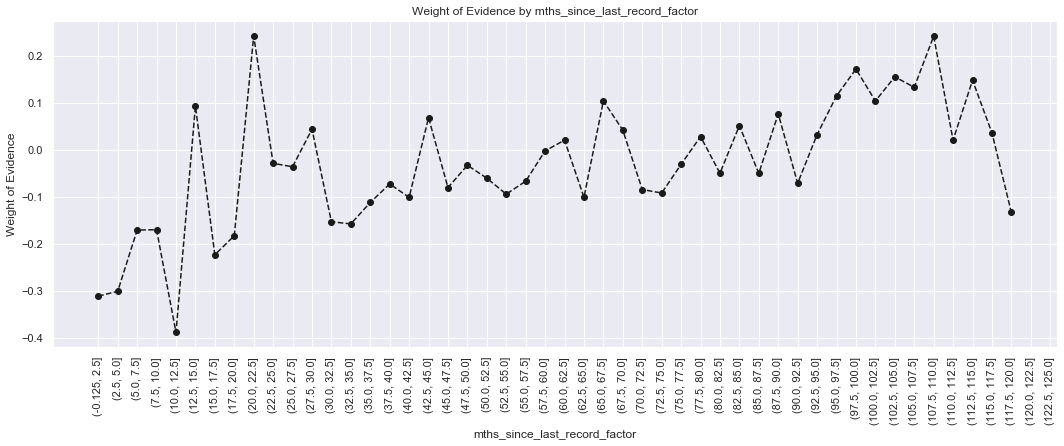

In [257]:
# We plot the weight of evidence values.
plot_by_woe(df_temp23, 90)


In [258]:
# We create the following Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# EXPORT THE PREPROCESS TRAIN AND TEST DATASETS

In [259]:

path = os.getcwd()
path

'C:\\Users\\13134\\Documents\\GitHub\\Capstone-2\\Data Pre-Processing'

In [260]:

ls

 Volume in drive C is Windows
 Volume Serial Number is 52EB-87F5

 Directory of C:\Users\13134\Documents\GitHub\Capstone-2\Data Pre-Processing

09/04/2020  09:25 AM    <DIR>          .
09/04/2020  09:25 AM    <DIR>          ..
09/03/2020  07:04 PM    <DIR>          .ipynb_checkpoints
09/04/2020  09:25 AM           161,169 Capstone 2 Project Credit Risk Modeling.ipynb
               1 File(s)        161,169 bytes
               3 Dir(s)  848,981,659,648 bytes free


In [261]:
#Making a data folder
os.mkdir('data')

In [262]:
loan_data_inputs_test = df_inputs_prepr

In [263]:
#Exporting the preprocesse train and Test dataset as csv files
loan_data_inputs_train.to_csv(os.getcwd() + r'\data\loan_data_inputs_train.csv')
loan_data_targets_train.to_csv(os.getcwd() + r'\data\loan_data_targets_train.csv')
loan_data_inputs_test.to_csv(os.getcwd() + r'\data\loan_data_inputs_test.csv')
loan_data_targets_test.to_csv(os.getcwd() + r'\data\loan_data_targets_test.csv')